In [20]:
from warnings import filterwarnings
filterwarnings('ignore')

In [21]:
import pandas as pd
df = pd.read_csv('training_set.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [23]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [24]:
m = df.isna().sum()
m

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [25]:
m[m>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [26]:
df = df.drop(columns=['Id'])

In [27]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [28]:
cat = list(df.columns[df.dtypes=='object'])
con = list(df.columns[df.dtypes!='object'])

In [29]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [30]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [33]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean'))])
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='constant',
                                                    fill_value='Not_Avail'))])
pre =  ColumnTransformer([('num', num_pipe, con),
                          ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [34]:
df_clean = pre.fit_transform(df)
df_clean

num__MSSubClass  num__LotFrontage  num__LotArea  num__OverallQual  \
0                60.0              65.0        8450.0               7.0   
1                20.0              80.0        9600.0               6.0   
2                60.0              68.0       11250.0               7.0   
3                70.0              60.0        9550.0               7.0   
4                60.0              84.0       14260.0               8.0   
...               ...               ...           ...               ...   
1455             60.0              62.0        7917.0               6.0   
1456             20.0              85.0       13175.0               6.0   
1457             70.0              66.0        9042.0               7.0   
1458             20.0              68.0        9717.0               5.0   
1459             20.0              75.0        9937.0               5.0   

      num__OverallCond  num__YearBuilt  num__YearRemodAdd  num__MasVnrArea  \
0                  5.0          2003.0             2003.0            196.0   
1                  8.0          1976.0             1976.0              0.0   
2                  5.0          2001.0             2002.0            162.0   
3                  5.0          1915.0             1970.0              0.0   
4                  5.0          2000.0             2000.0            350.0   
...                ...             ...                ...              ...   
1455               5.0          1999.0             2000.0              0.0   
1456               6.0          1978.0             1988.0            119.0   
1457               9.0          1941.0             2006.0              0.0   
1458               6.0          1950.0             1996.0              0.0   
1459               6.0          1965.0             1965.0              0.0   

      num__BsmtFinSF1  num__BsmtFinSF2  ...  cat__GarageType  \
0               706.0              0.0  ...           Attchd   
1               978.0              0.0  ...           Attchd   
2               486.0              0.0  ...           Attchd   
3               216.0              0.0  ...           Detchd   
4               655.0              0.0  ...           Attchd   
...               ...              ...  ...              ...   
1455              0.0              0.0  ...           Attchd   
1456            790.0            163.0  ...           Attchd   
1457            275.0              0.0  ...           Attchd   
1458             49.0           1029.0  ...           Attchd   
1459            830.0            290.0  ...           Attchd   

      cat__GarageFinish  cat__GarageQual  cat__GarageCond  cat__PavedDrive  \
0                   RFn               TA               TA                Y   
1                   RFn               TA               TA                Y   
2                   RFn               TA               TA                Y   
3                   Unf               TA               TA                Y   
4                   RFn               TA               TA                Y   
...                 ...              ...              ...              ...   
1455                RFn               TA               TA                Y   
1456                Unf               TA               TA                Y   
1457                RFn               TA               TA                Y   
1458                Unf               TA               TA                Y   
1459                Fin               TA               TA                Y   

      cat__PoolQC  cat__Fence  cat__MiscFeature  cat__SaleType  \
0       Not_Avail   Not_Avail         Not_Avail             WD   
1       Not_Avail   Not_Avail         Not_Avail             WD   
2       Not_Avail   Not_Avail         Not_Avail             WD   
3       Not_Avail   Not_Avail         Not_Avail             WD   
4       Not_Avail   Not_Avail         Not_Avail             WD   
...           ...         ...               ...            ...   


In [36]:
m =  df_clean.isna().sum()
m[m>0]

Series([], dtype: int64)

In [37]:
cat_clean = list(df_clean.columns[df_clean.dtypes=='object'])
con_clean = list(df_clean.columns[df_clean.dtypes!='object'])

In [38]:
df_clean[cat_clean].describe().T

count unique        top  freq
cat__MSZoning       1460      5         RL  1151
cat__Street         1460      2       Pave  1454
cat__Alley          1460      3  Not_Avail  1369
cat__LotShape       1460      4        Reg   925
cat__LandContour    1460      4        Lvl  1311
cat__Utilities      1460      2     AllPub  1459
cat__LotConfig      1460      5     Inside  1052
cat__LandSlope      1460      3        Gtl  1382
cat__Neighborhood   1460     25      NAmes   225
cat__Condition1     1460      9       Norm  1260
cat__Condition2     1460      8       Norm  1445
cat__BldgType       1460      5       1Fam  1220
cat__HouseStyle     1460      8     1Story   726
cat__RoofStyle      1460      6      Gable  1141
cat__RoofMatl       1460      8    CompShg  1434
cat__Exterior1st    1460     15    VinylSd   515
cat__Exterior2nd    1460     16    VinylSd   504
cat__MasVnrType     1460      4  Not_Avail   872
cat__ExterQual      1460      4         TA   906
cat__ExterCond      1460      5         TA  1282
cat__Foundation     1460      6      PConc   647
cat__BsmtQual       1460      5         TA   649
cat__BsmtCond       1460      5         TA  1311
cat__BsmtExposure   1460      5         No   953
cat__BsmtFinType1   1460      7        Unf   430
cat__BsmtFinType2   1460      7        Unf  1256
cat__Heating        1460      6       GasA  1428
cat__HeatingQC      1460      5         Ex   741
cat__CentralAir     1460      2          Y  1365
cat__Electrical     1460      6      SBrkr  1334
cat__KitchenQual    1460      4         TA   735
cat__Functional     1460      7        Typ  1360
cat__FireplaceQu    1460      6  Not_Avail   690
cat__GarageType     1460      7     Attchd   870
cat__GarageFinish   1460      4        Unf   605
cat__GarageQual     1460      6         TA  1311
cat__GarageCond     1460      6         TA  1326
cat__PavedDrive     1460      3          Y  1340
cat__PoolQC         1460      4  Not_Avail  1453
cat__Fence          1460      5  Not_Avail  1179
cat__MiscFeature    1460      5  Not_Avail  1406
cat__SaleType       1460      9         WD  1267
cat__SaleCondition  1460      6     Normal  1198

In [ ]:
df[cat].describe().T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType      588      3  BrkFace   445
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

In [40]:
df_clean['cat__MSZoning'].value_counts()

cat__MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [41]:
df_clean[con_clean].describe().T

count           mean           std      min        25%  \
num__MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
num__LotFrontage    1460.0      70.049958     22.024023     21.0      60.00   
num__LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
num__OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
num__OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
num__YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
num__YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
num__MasVnrArea     1460.0     103.685262    180.569112      0.0       0.00   
num__BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
num__BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
num__BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
num__TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
num__1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
num__2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
num__LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
num__GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
num__BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
num__BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
num__FullBath       1460.0       1.565068      0.550916      0.0       1.00   
num__HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
num__BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
num__KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
num__TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
num__Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
num__GarageYrBlt    1460.0    1978.506164     23.994583   1900.0    1962.00   
num__GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
num__GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
num__WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
num__OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
num__EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
num__3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
num__ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
num__PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
num__MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
num__MoSold         1460.0       6.321918      2.703626      1.0       5.00   
num__YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
num__SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                              50%        75%       max  
num__MSSubClass         50.000000      70.00     190.0  
num__LotFrontage        70.049958      79.00     313.0  
num__LotArea          9478.500000   11601.50  215245.0  
num__OverallQual         6.000000       7.00      10.0  
num__OverallCond         5.000000       6.00       9.0  
num__YearBuilt        1973.000000    2000.00    2010.0  
num__YearRemodAdd     1994.000000    2004.00    2010.0  
num__MasVnrArea          0.000000     164.25    1600.0  
num__BsmtFinSF1        383.500000     712.25    5644.0  
num__BsmtFinSF2          0.000000       0.00    1474.0  
num__BsmtUnfSF         477.500000     808.00    2336.0  
num__TotalBsmtSF       991.500000    1298.25    6110.0  
num__1stFlrSF         1087.000000    1391.25    4692.0  
num__2ndFlrSF            0.000000     728.00    2065.0  
num__LowQualFinSF        0.000000       0.00     572.0  
num__GrLivArea        1464.000000    1776.75    5642.0  
num__BsmtFullBath        0.000000       1.00     

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

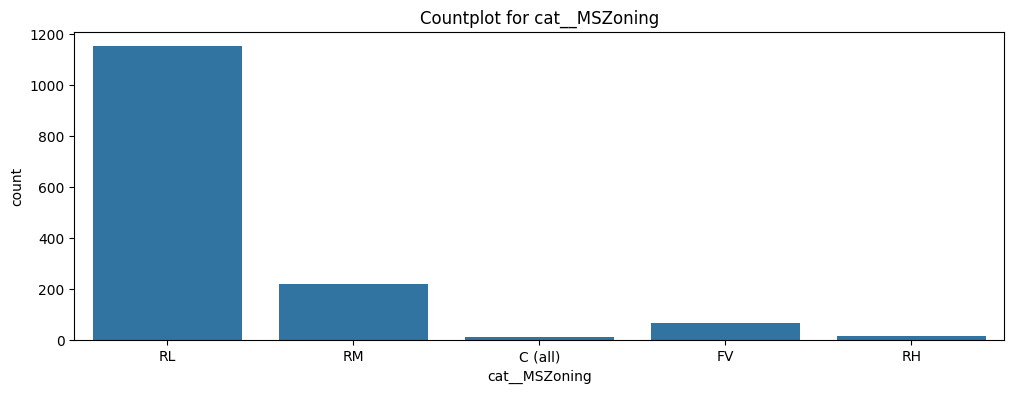

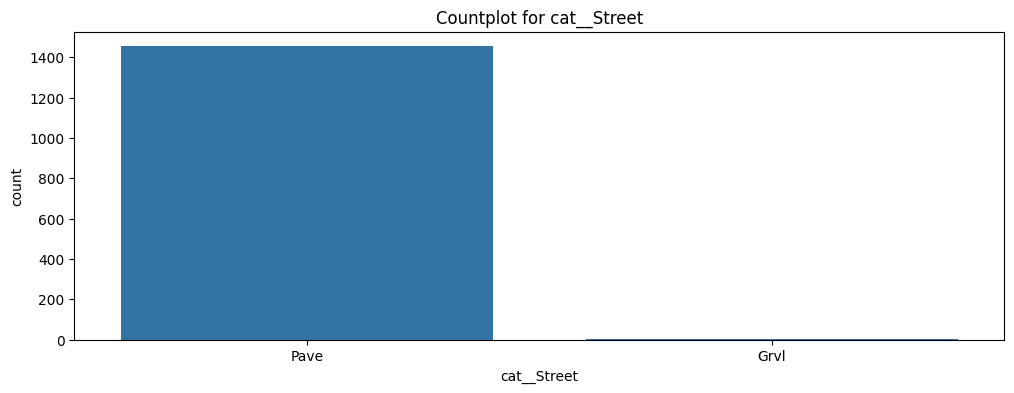

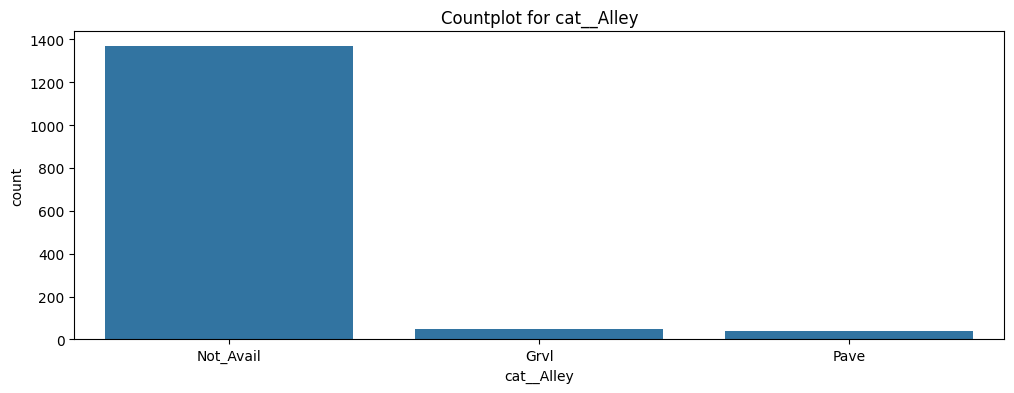

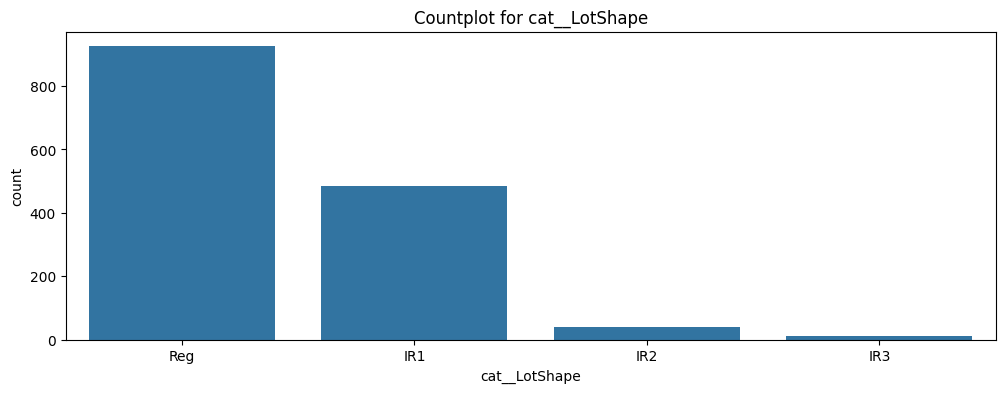

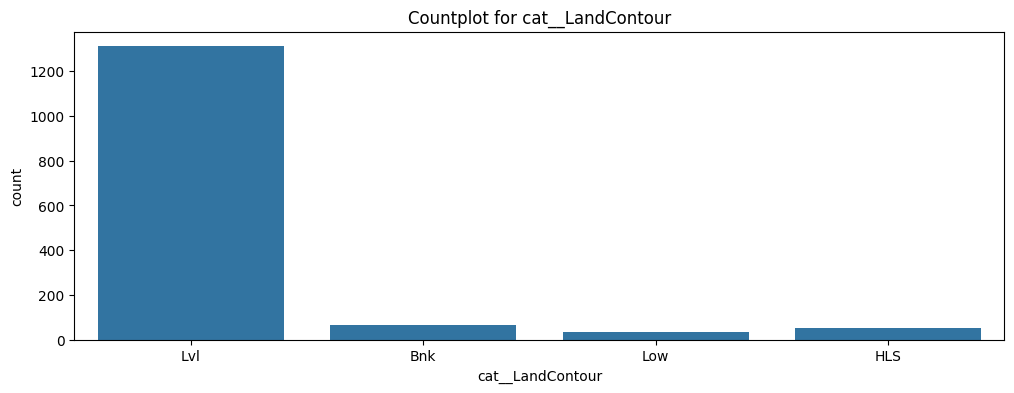

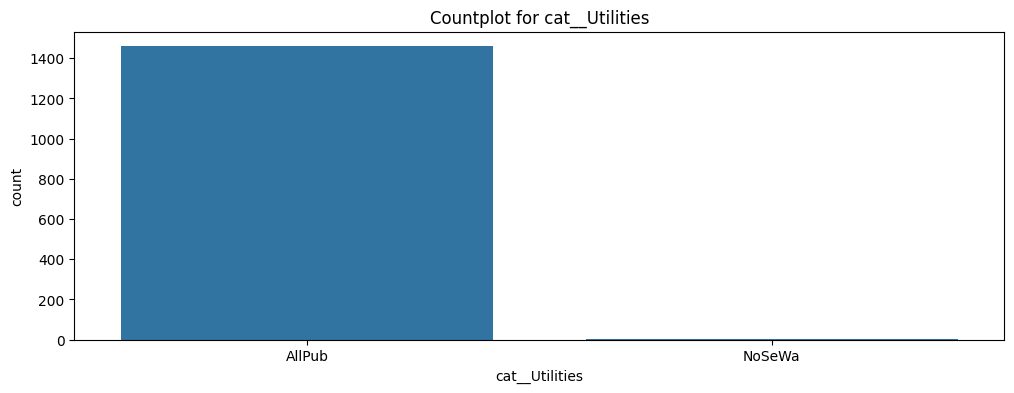

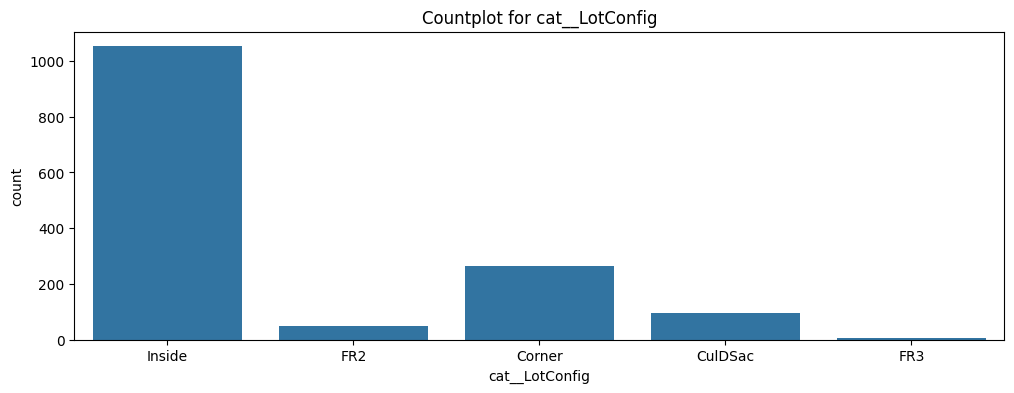

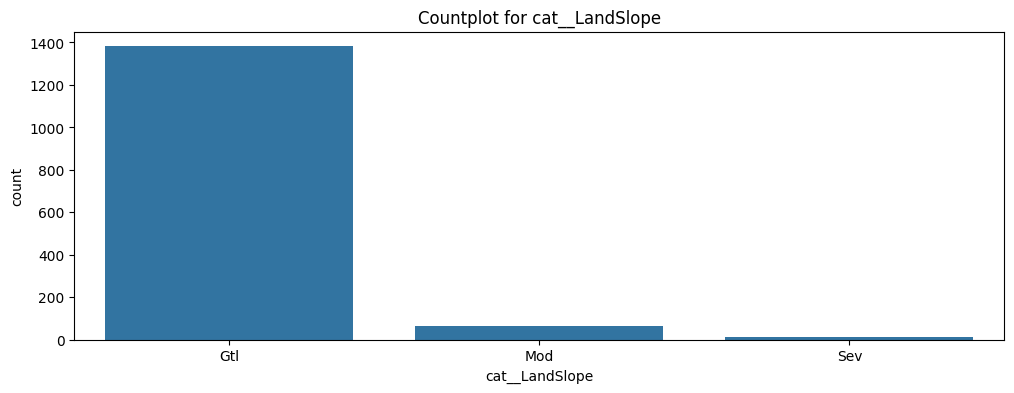

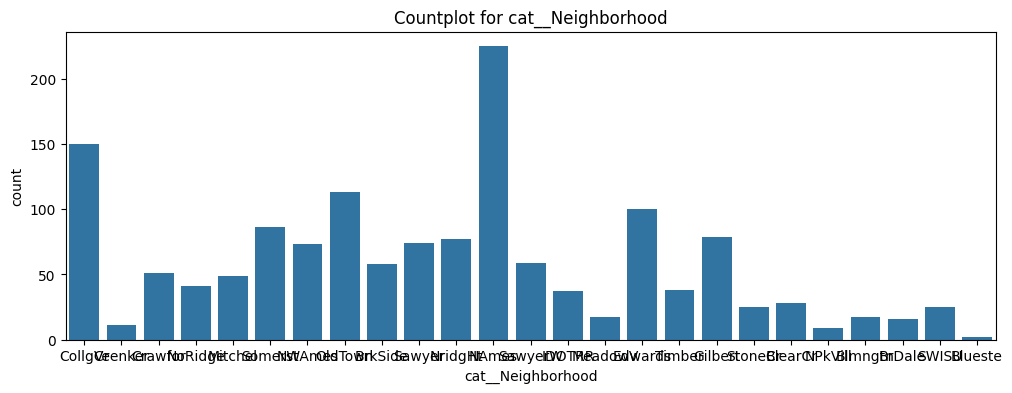

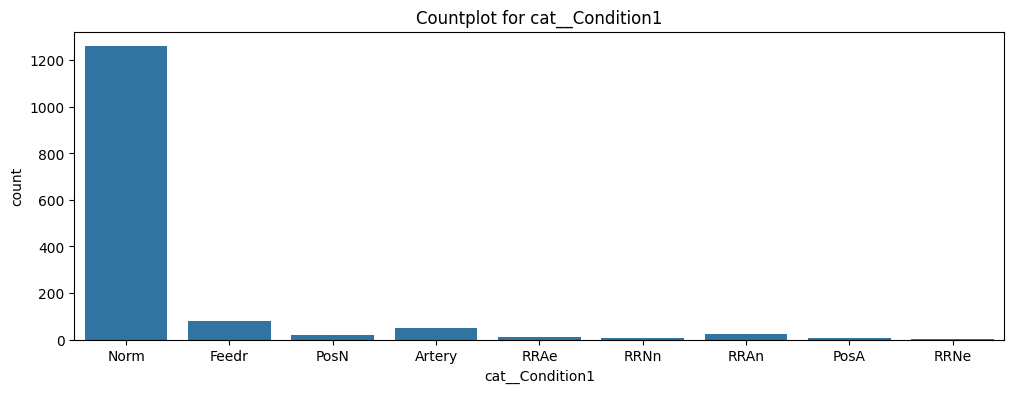

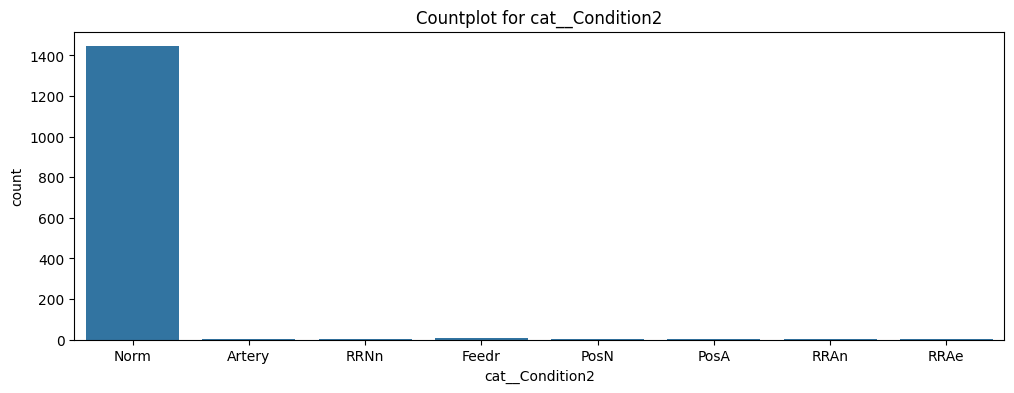

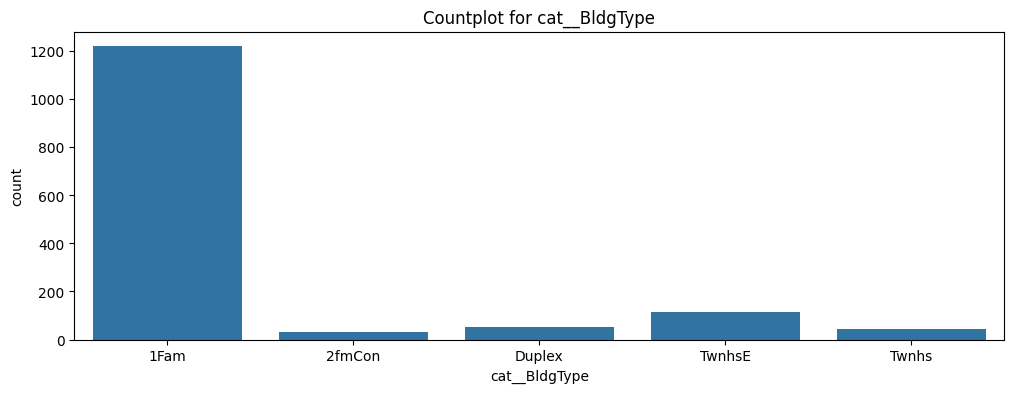

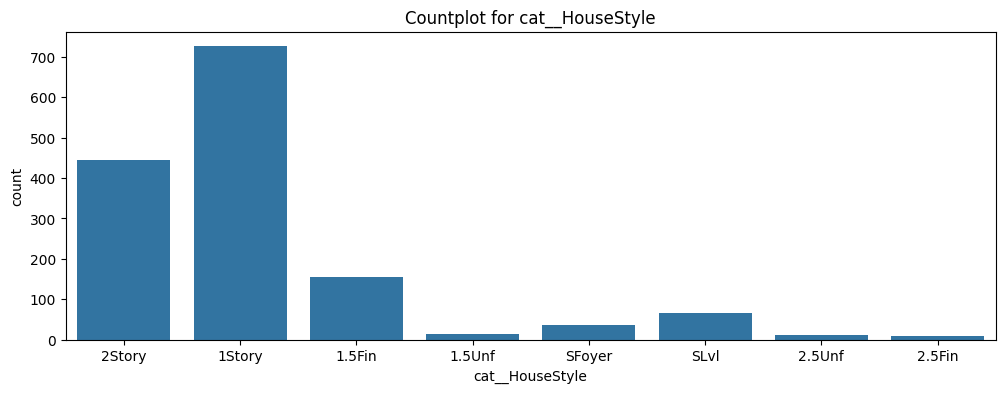

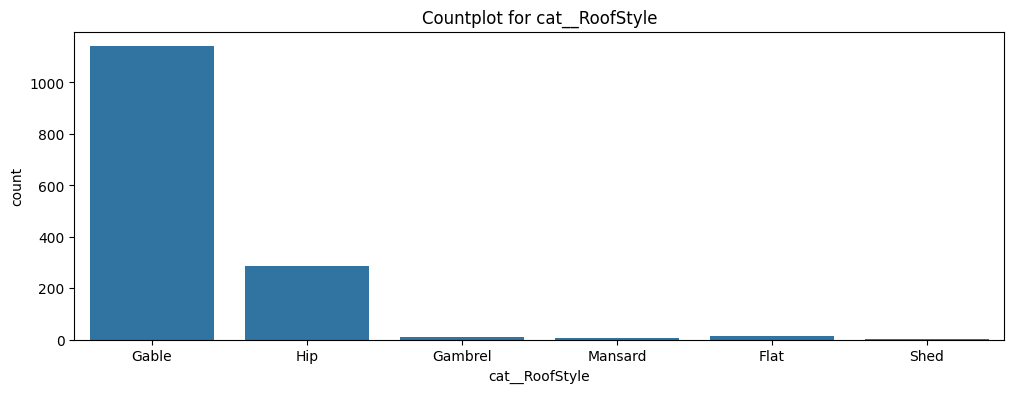

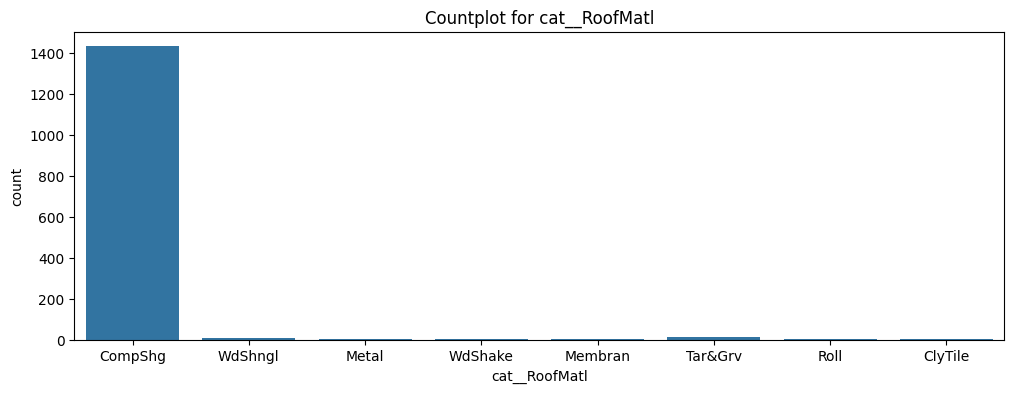

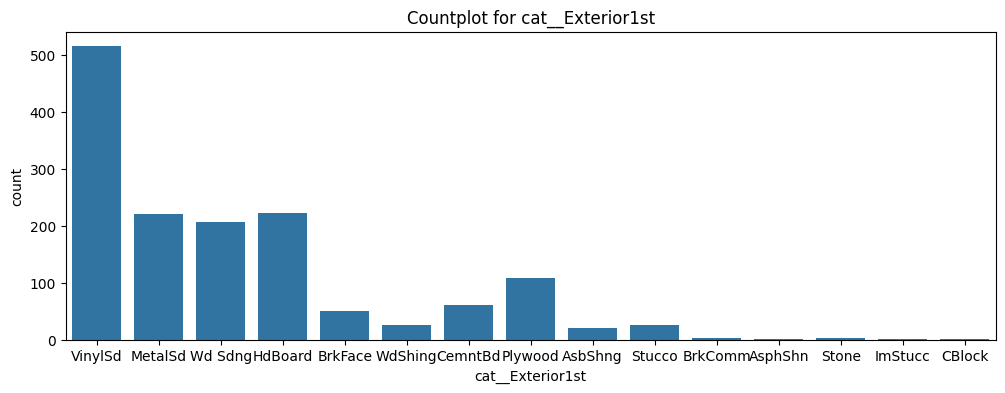

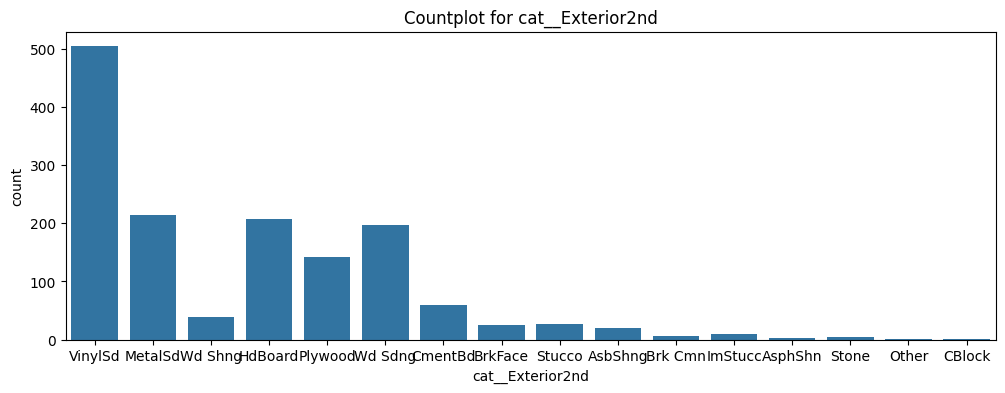

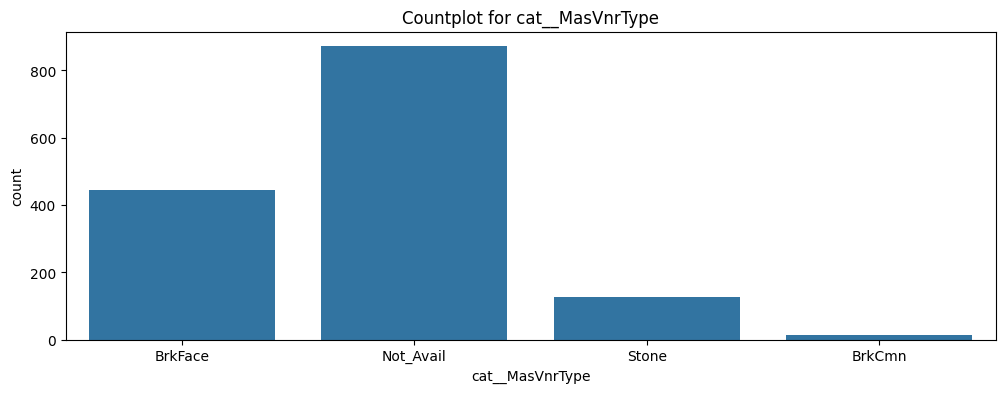

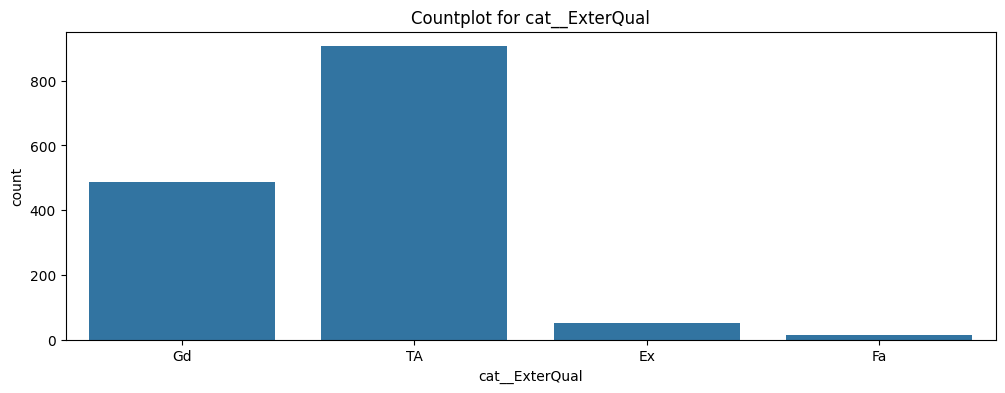

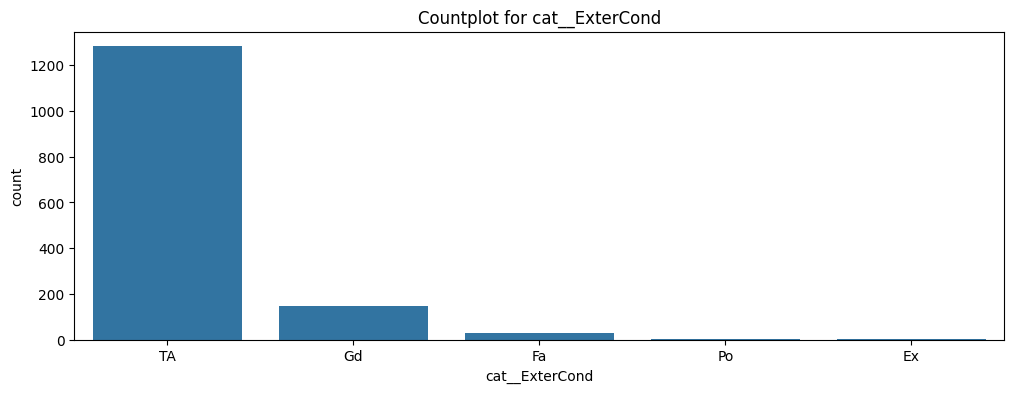

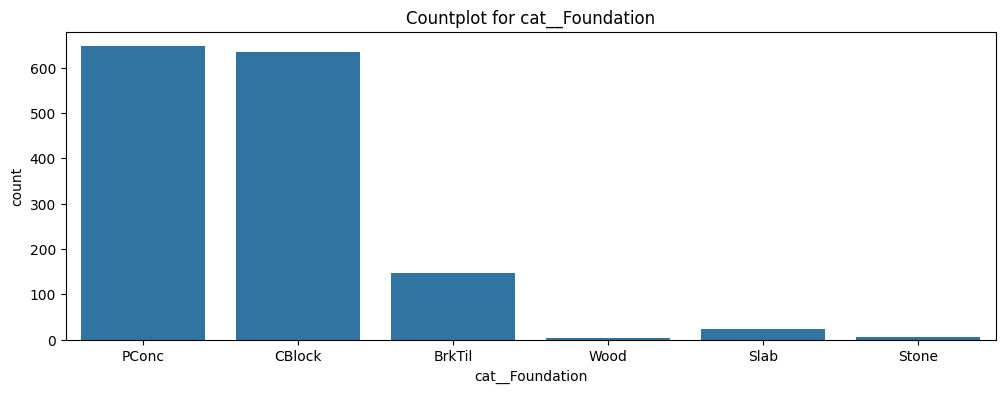

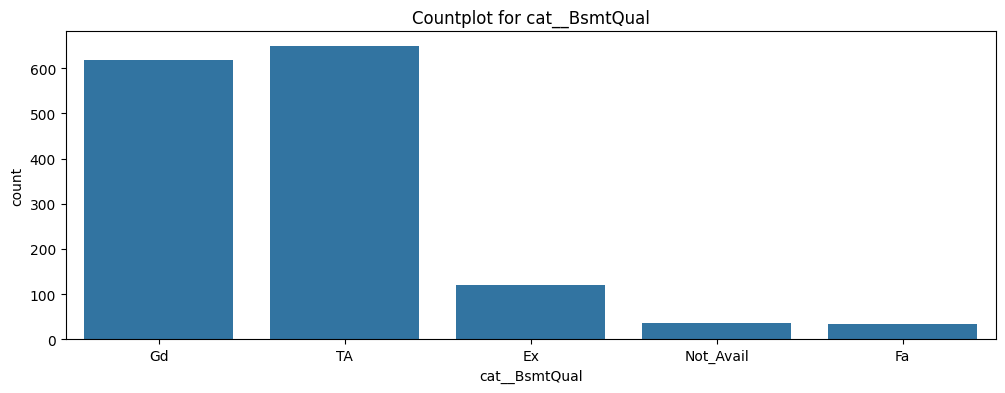

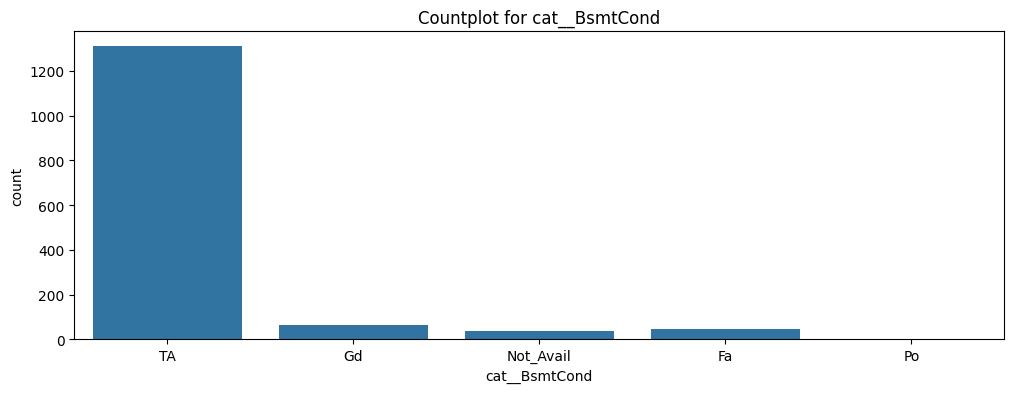

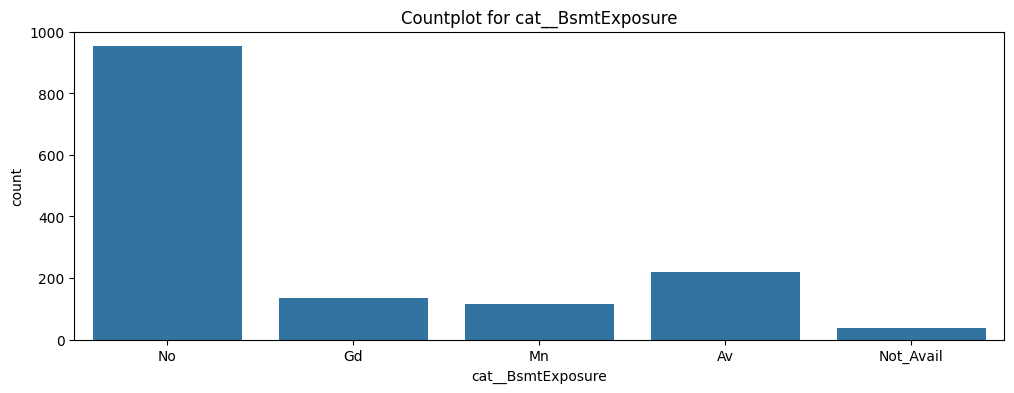

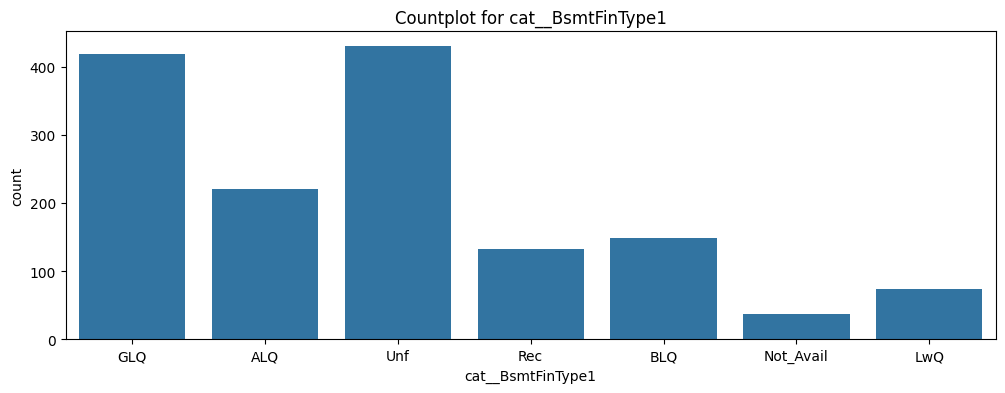

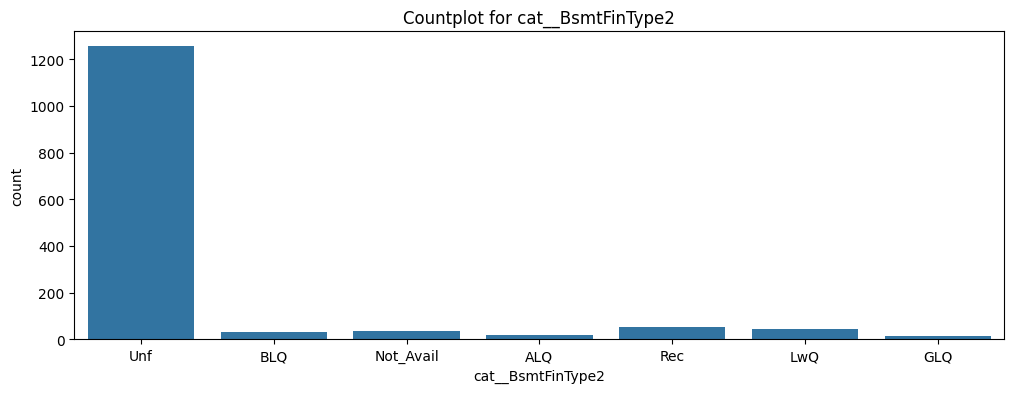

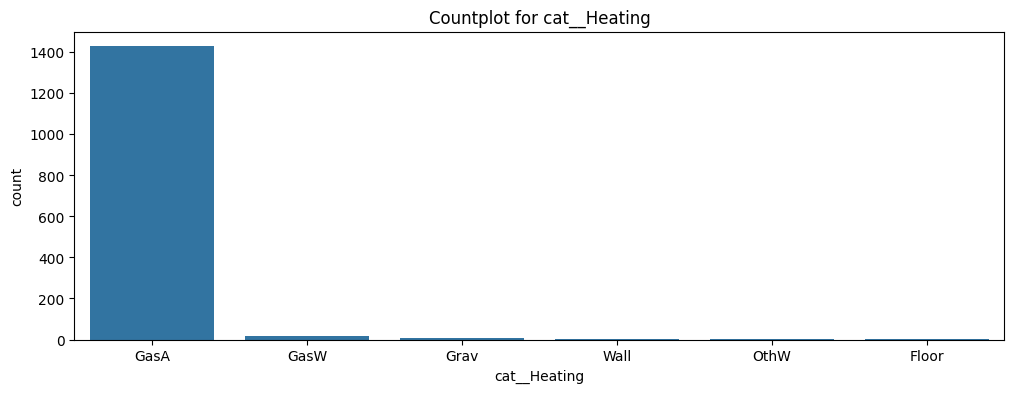

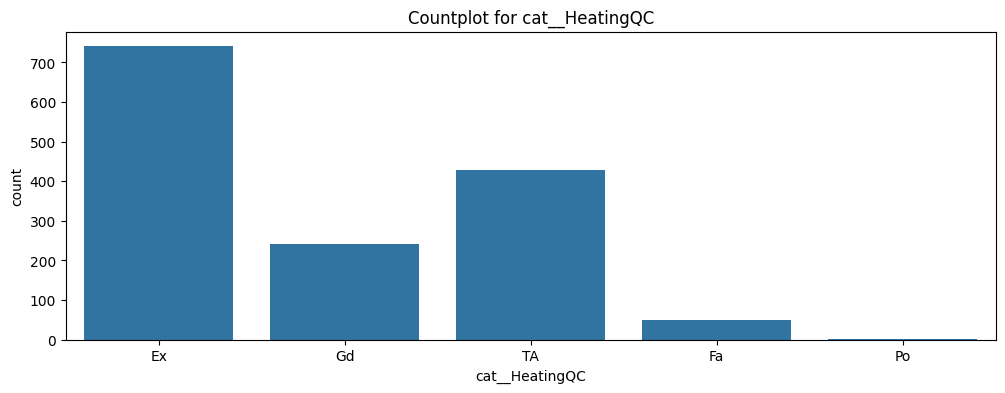

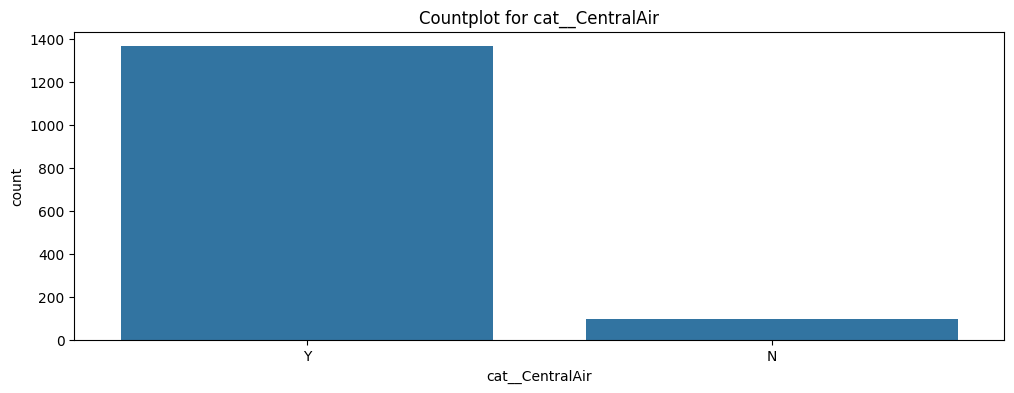

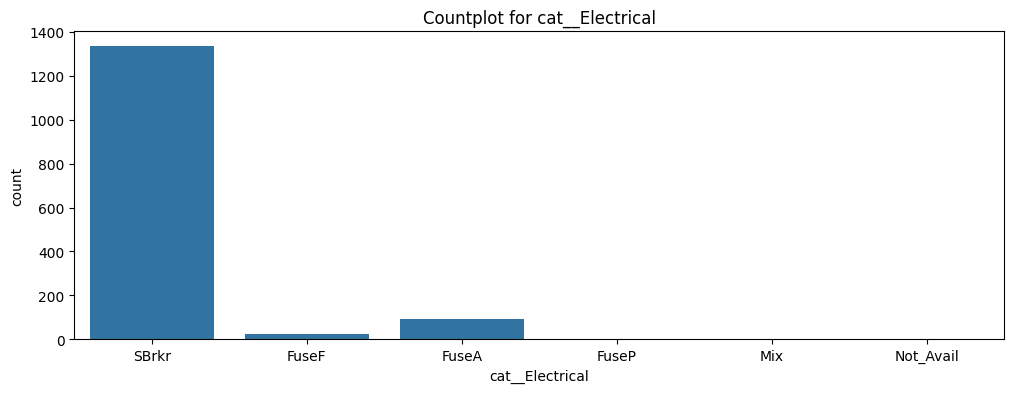

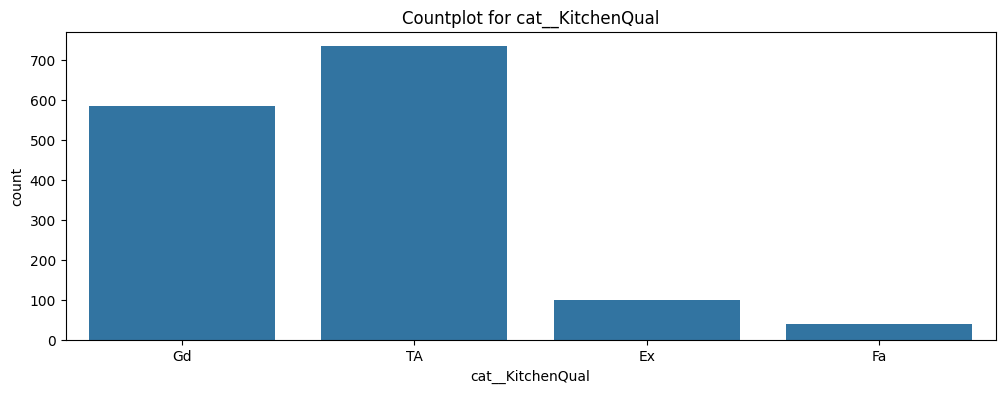

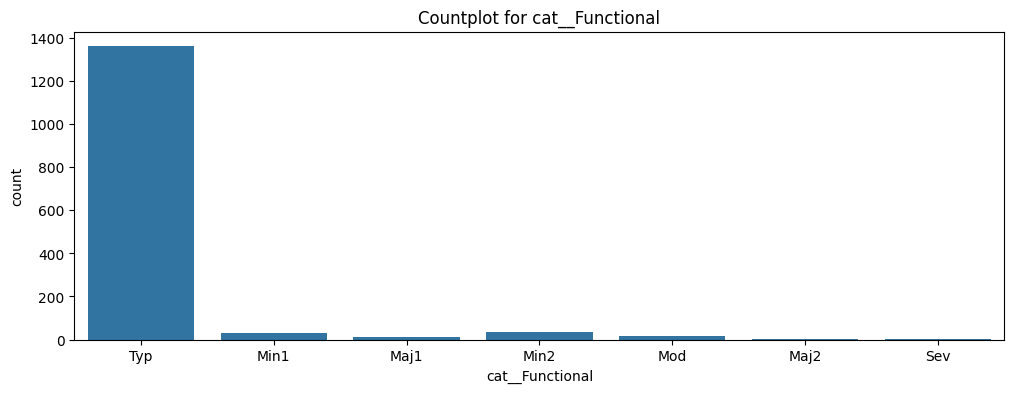

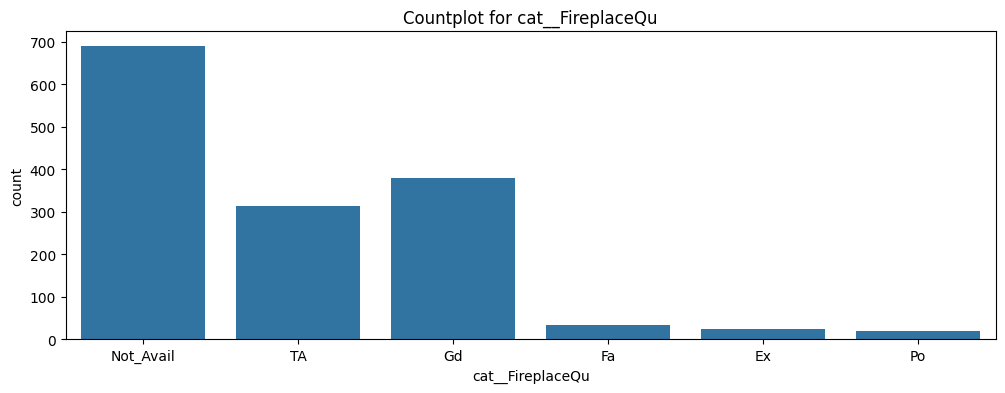

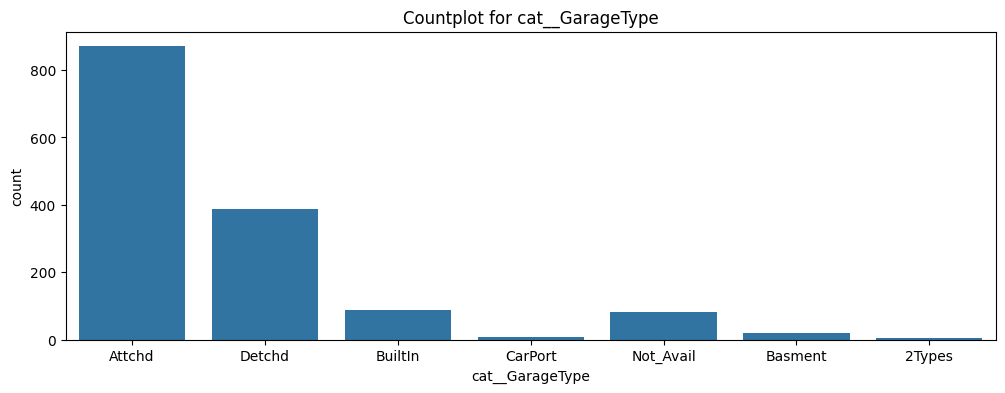

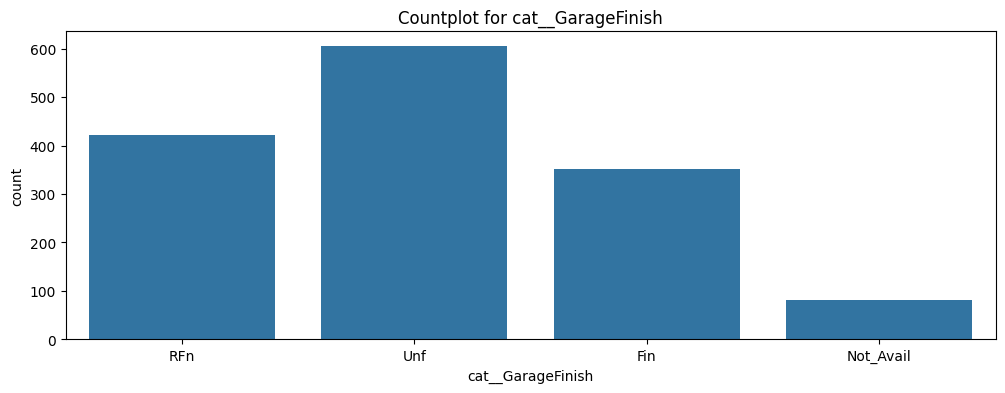

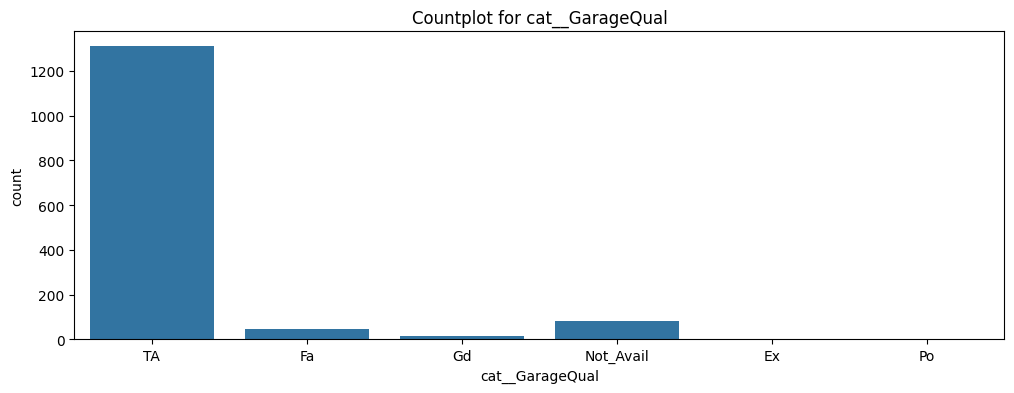

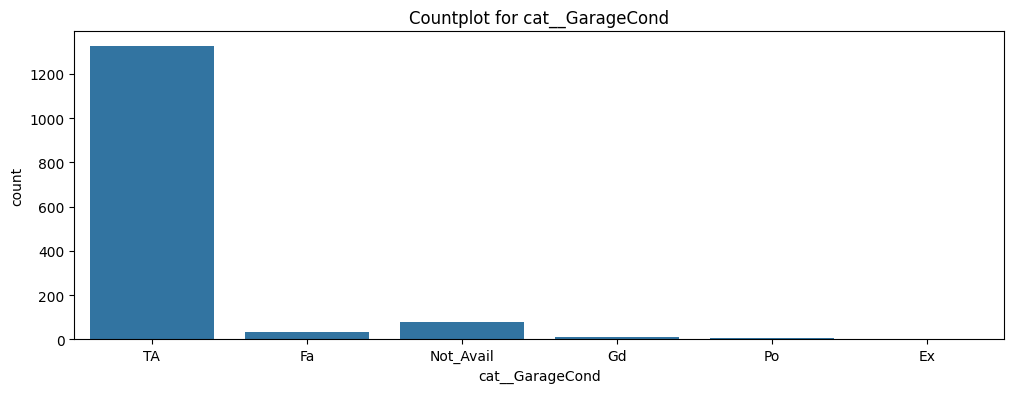

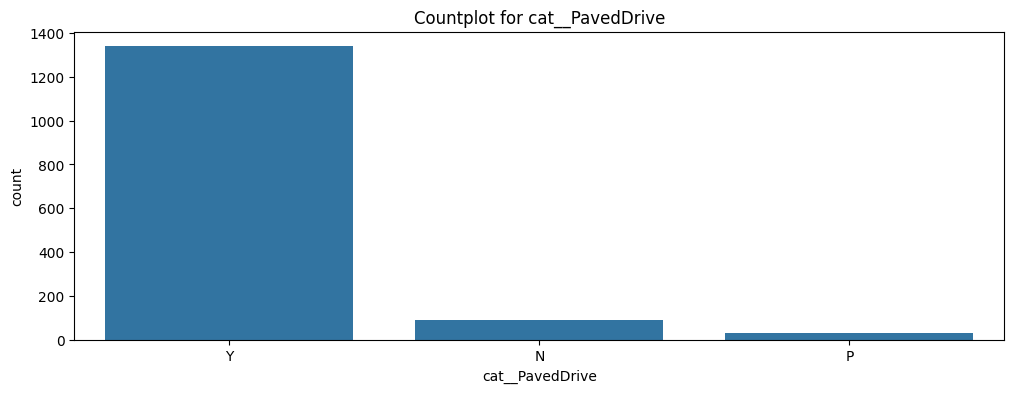

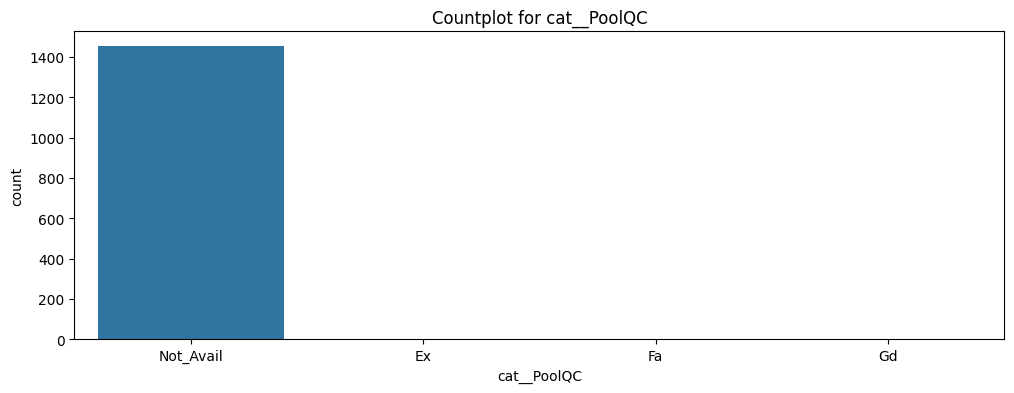

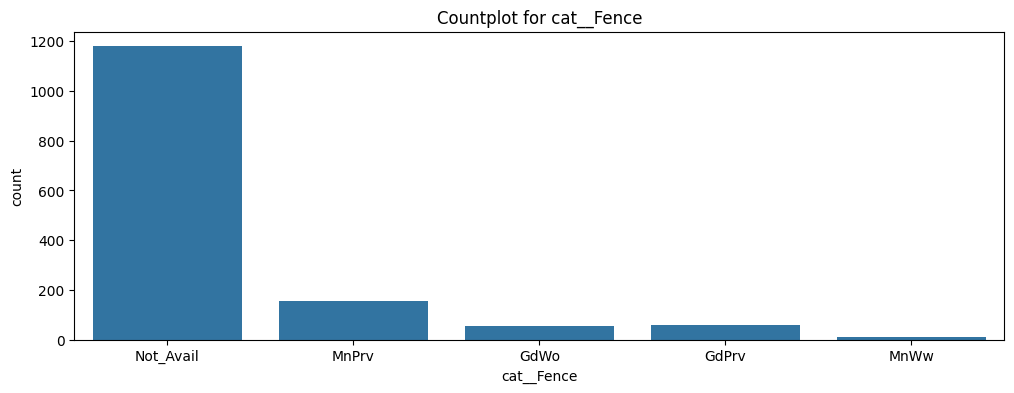

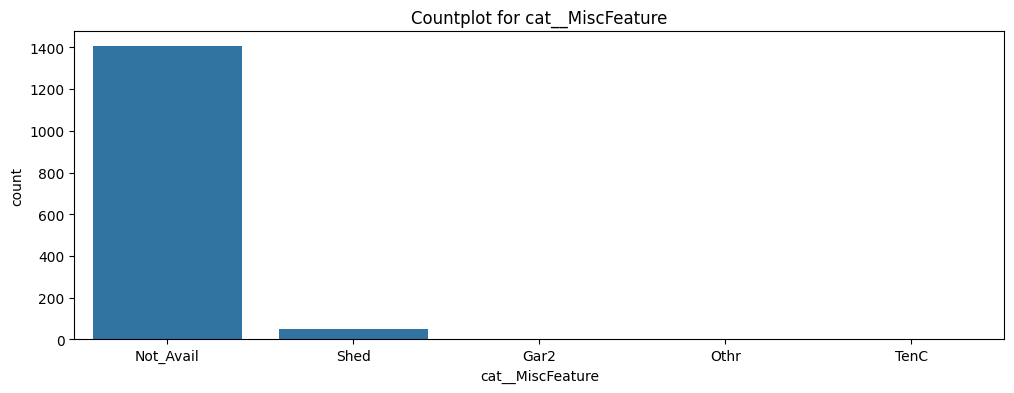

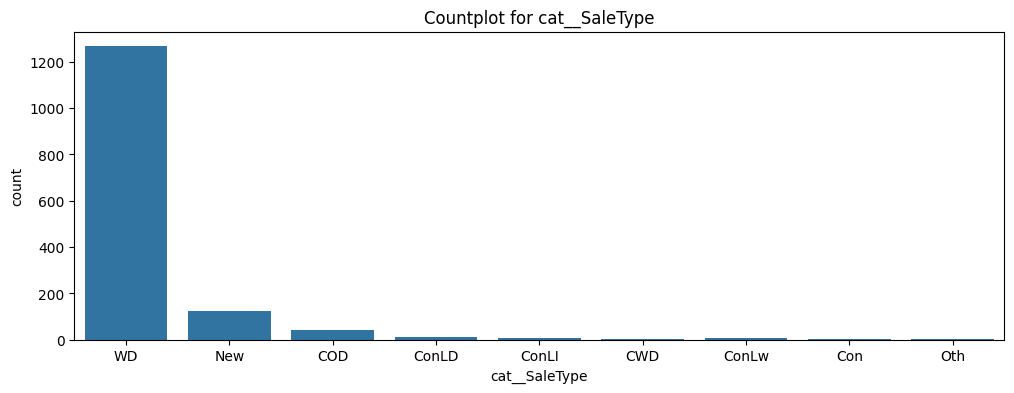

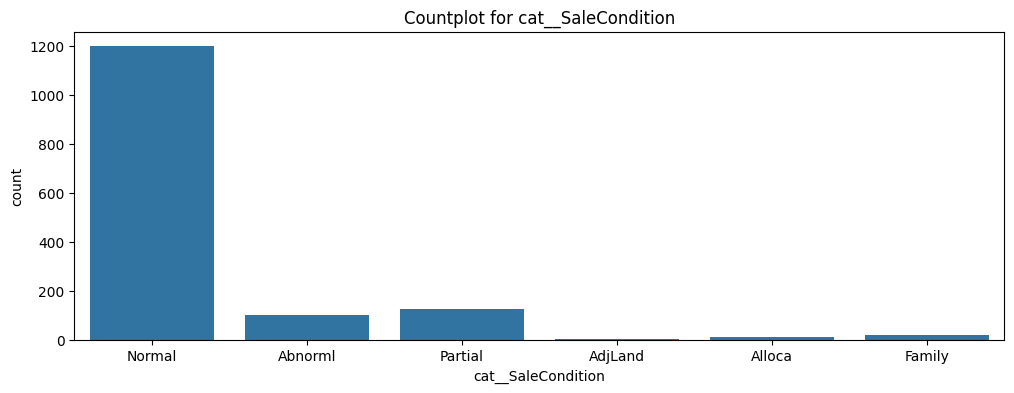

In [42]:
for i in cat_clean:
    plt.figure(figsize=(12, 4))
    sns.countplot(data=df_clean, x=i)
    plt.title(f'Countplot for {i}')
    plt.show()

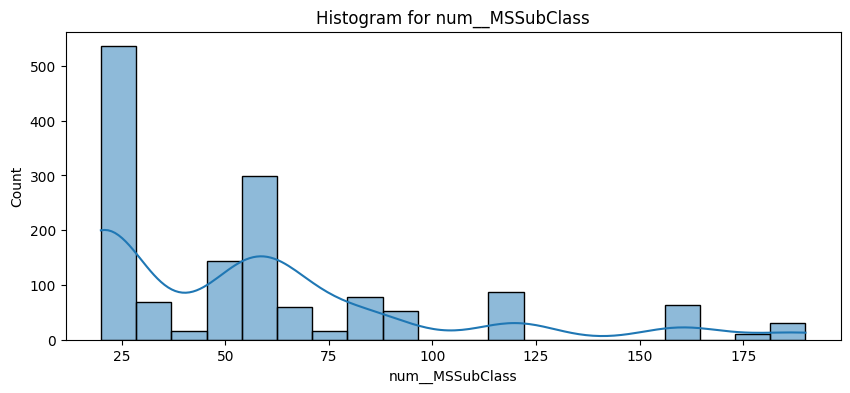

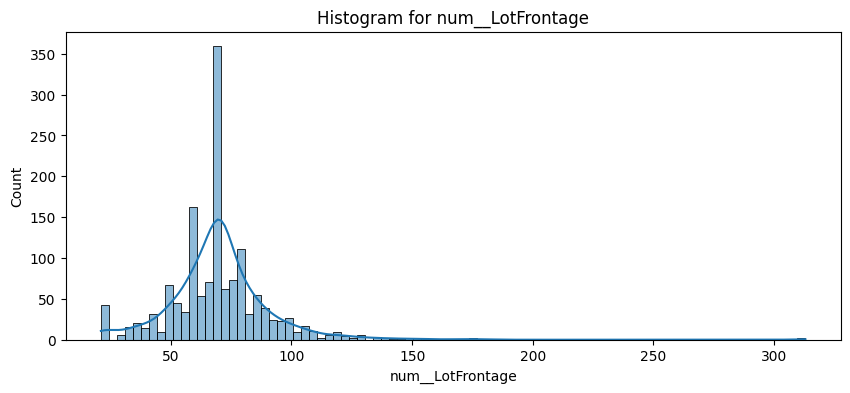

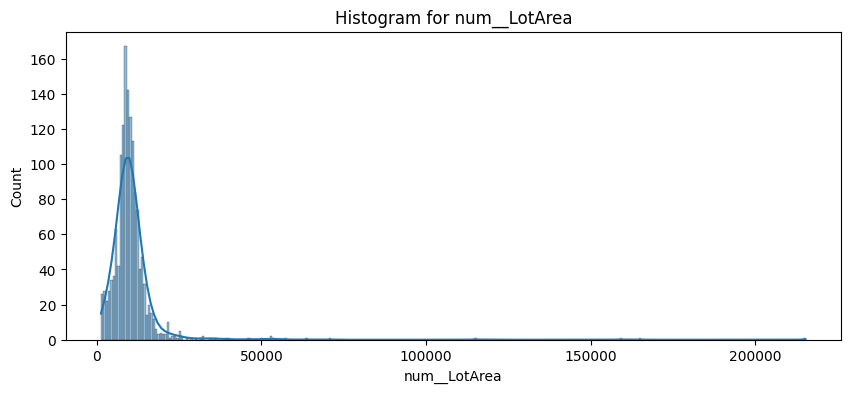

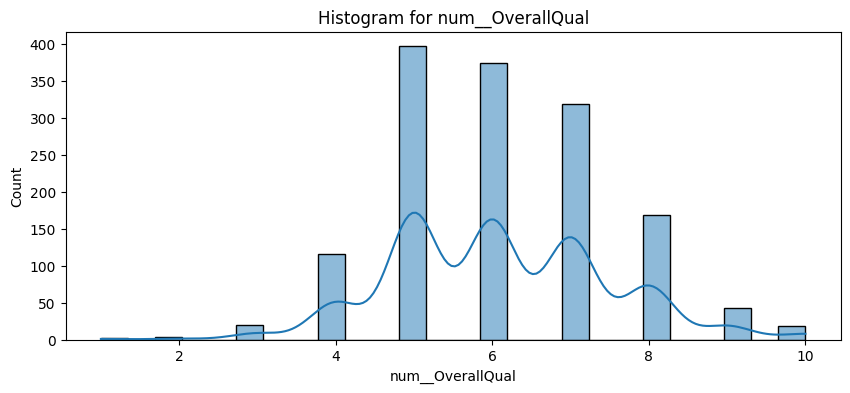

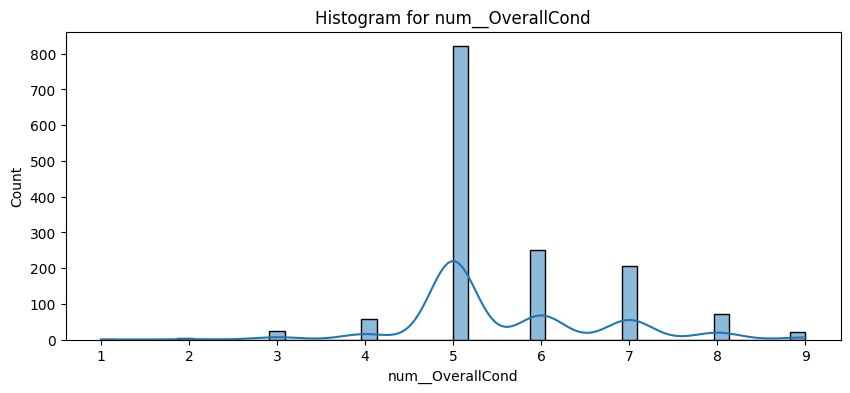

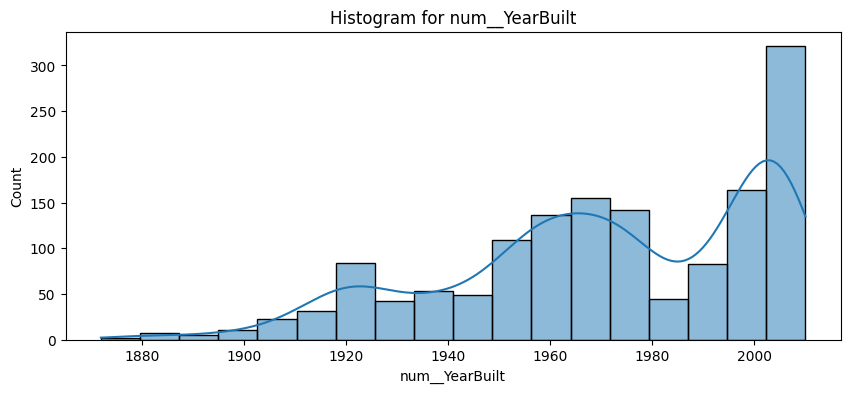

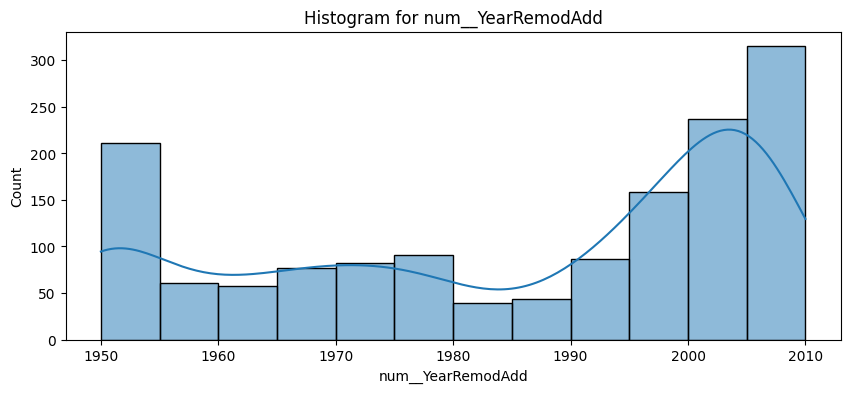

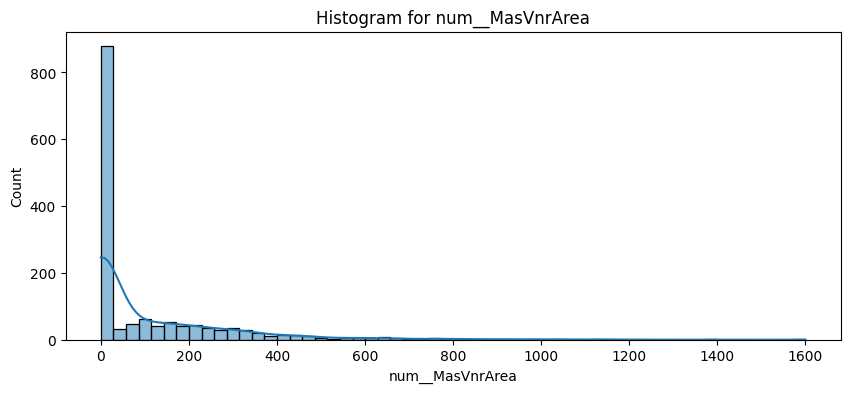

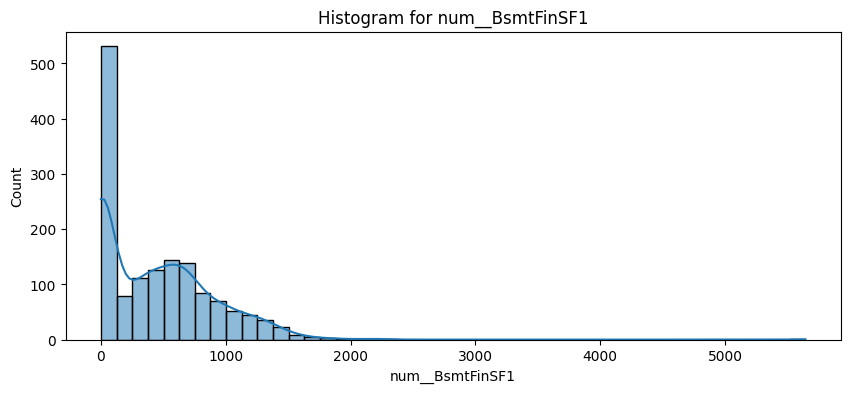

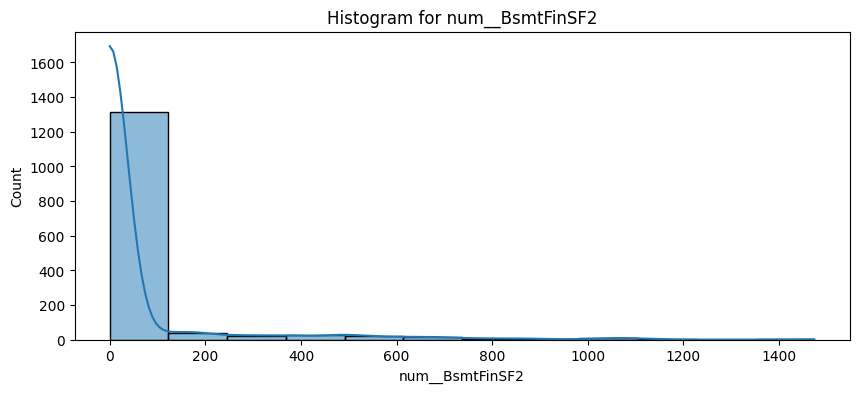

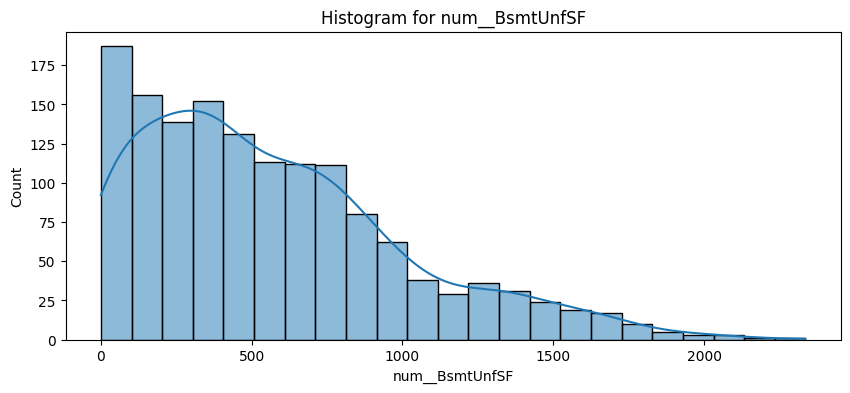

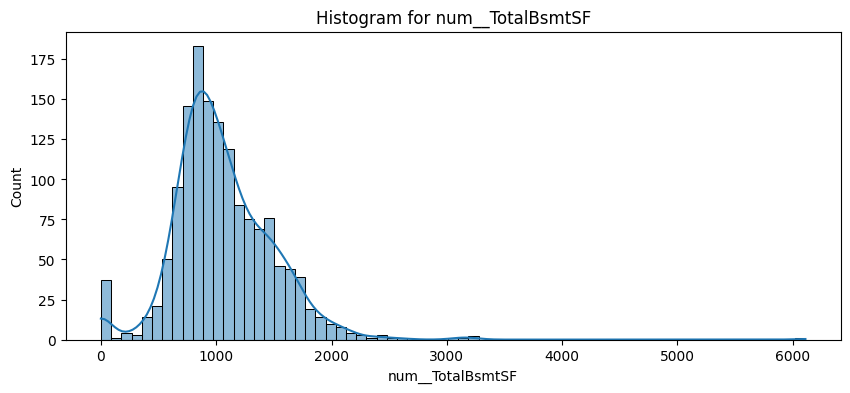

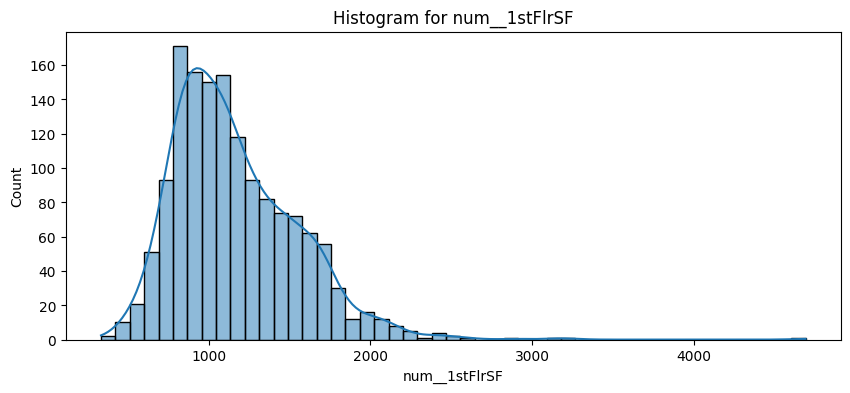

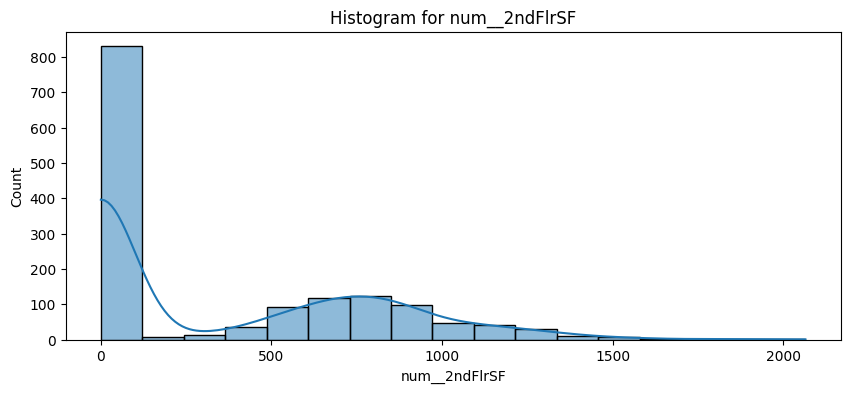

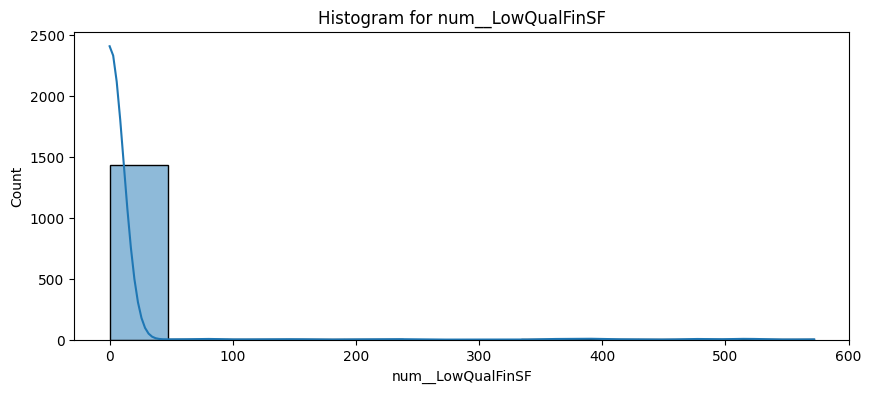

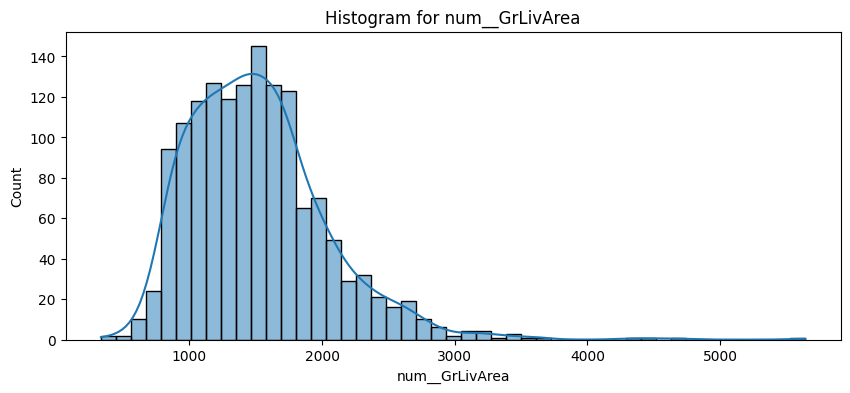

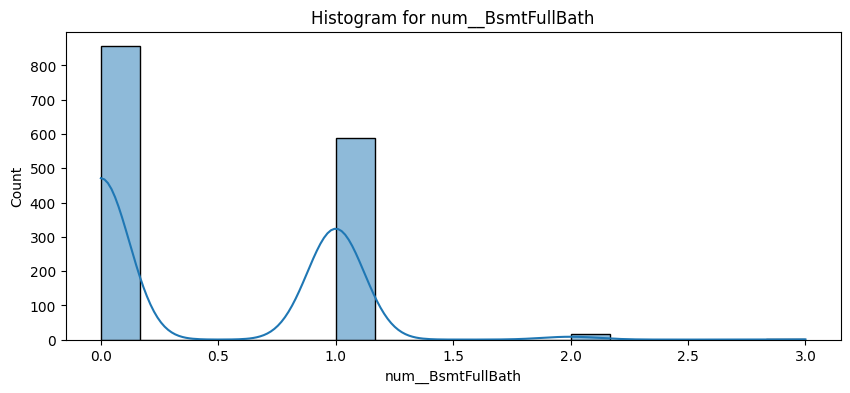

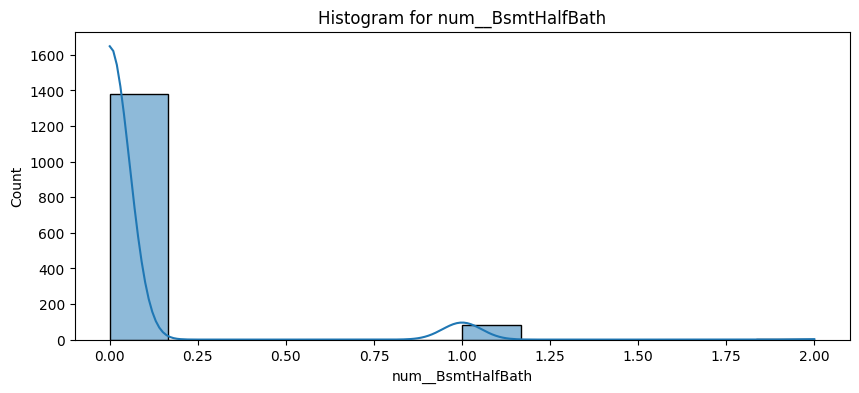

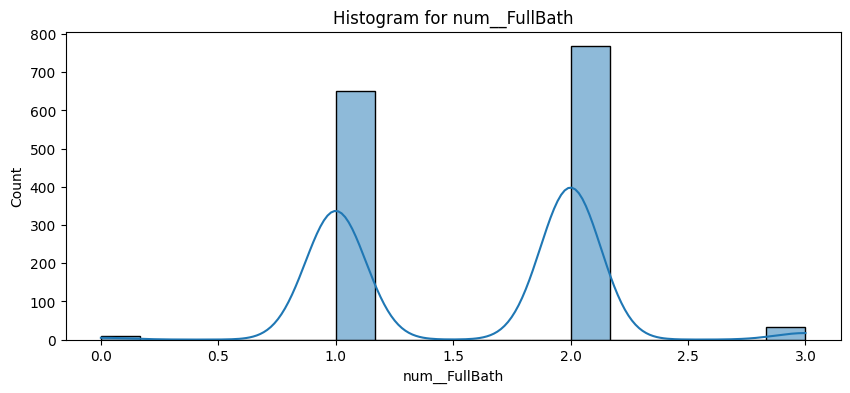

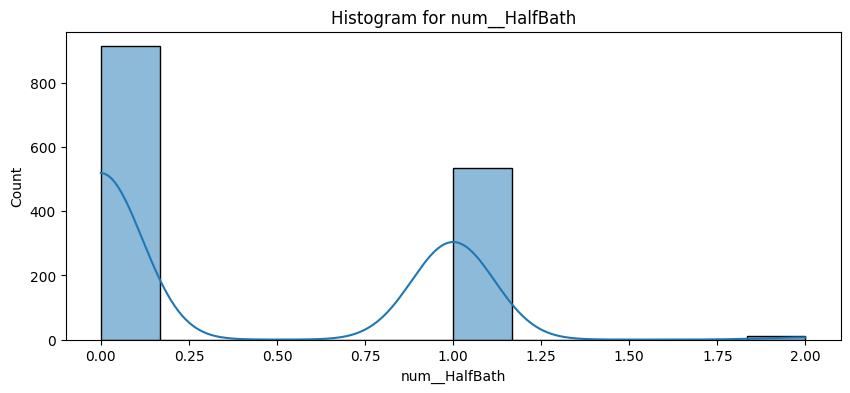

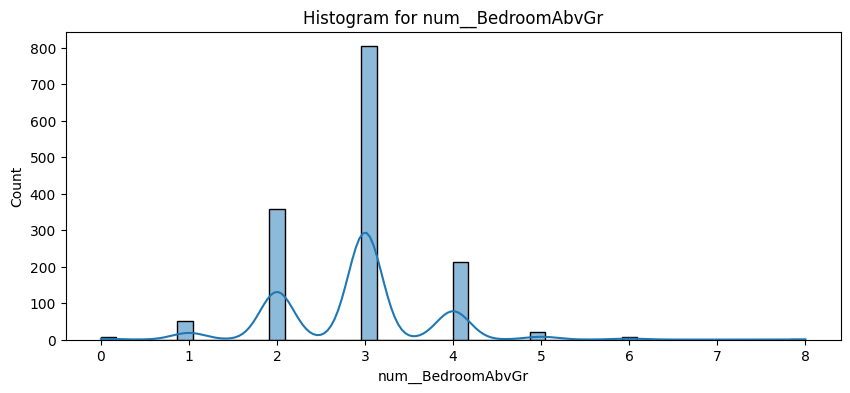

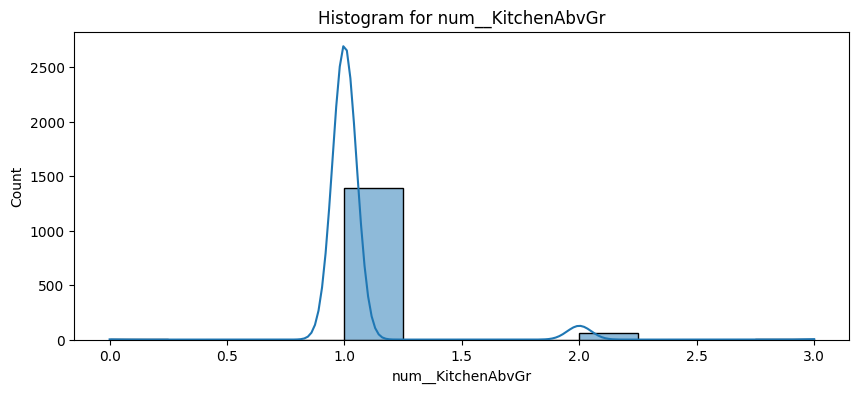

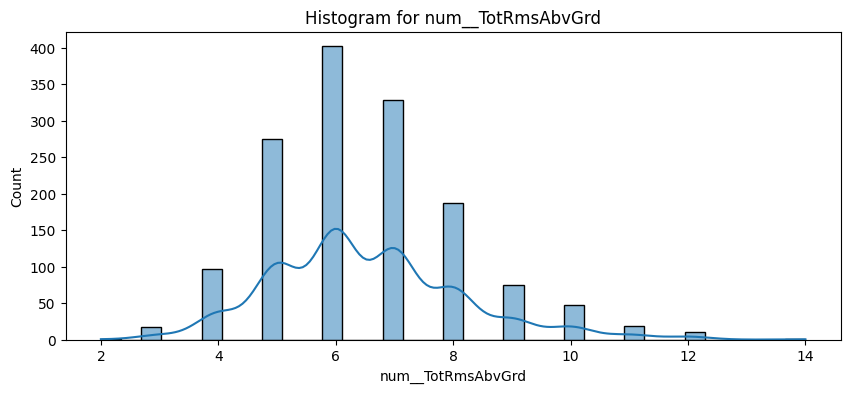

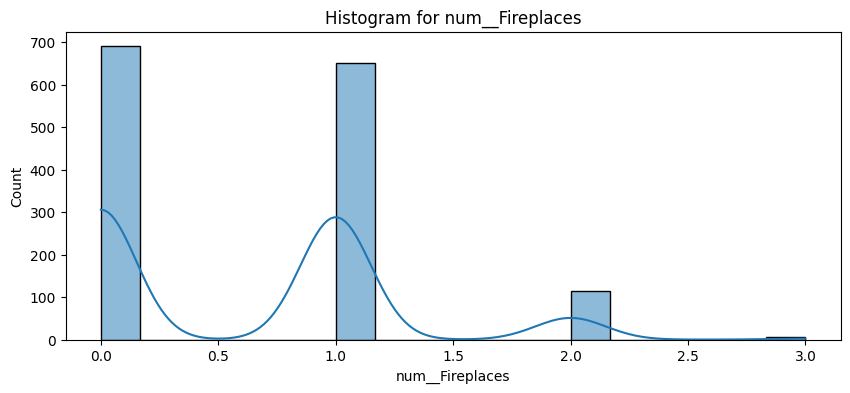

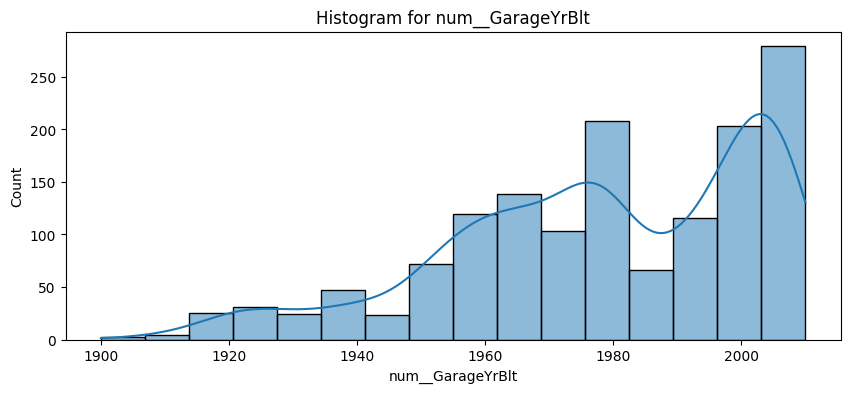

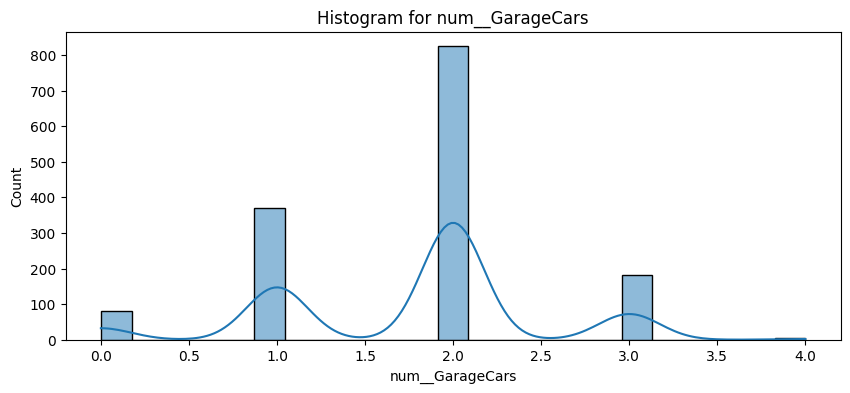

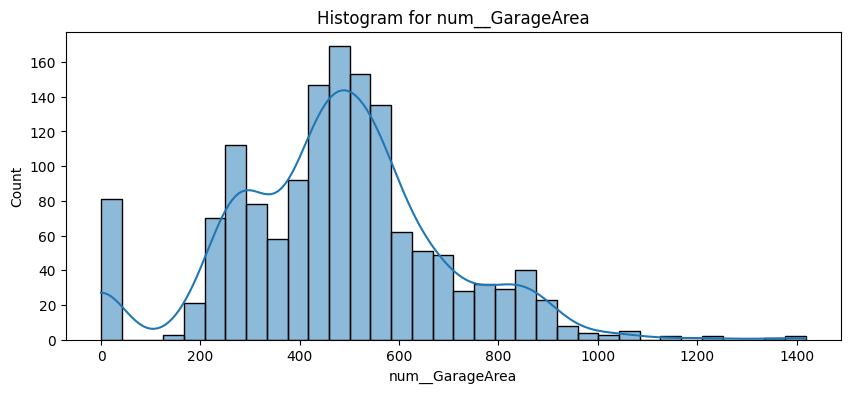

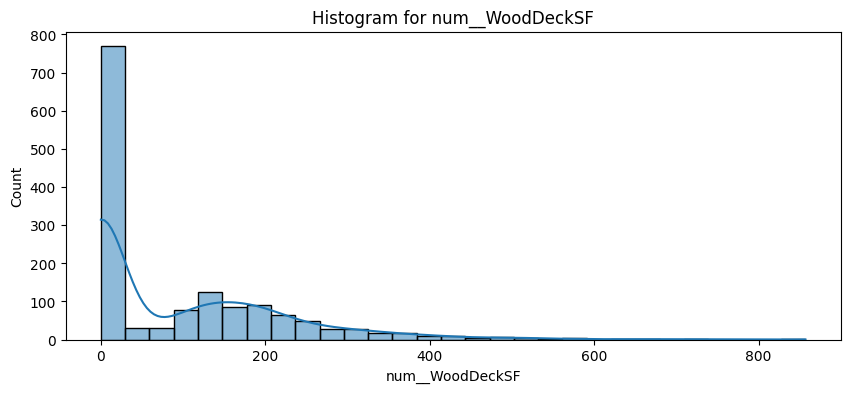

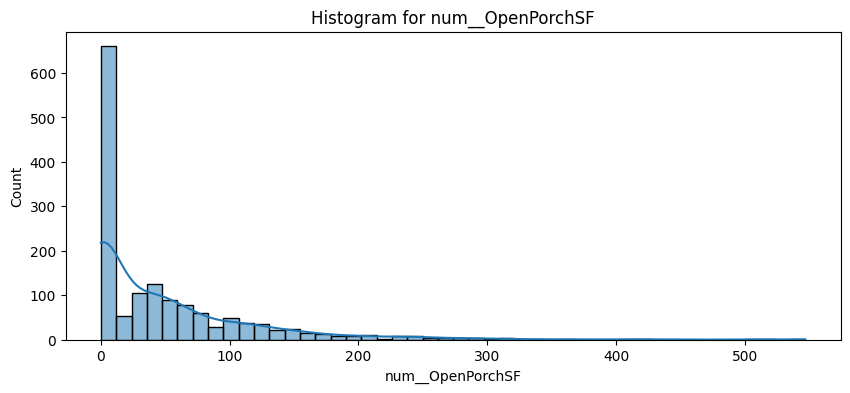

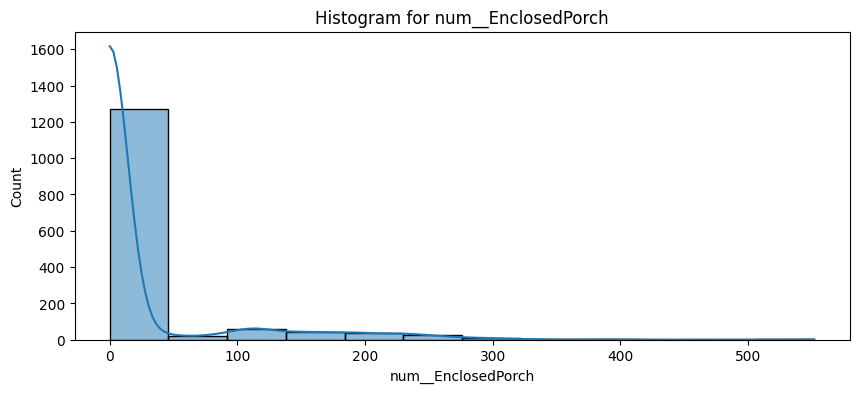

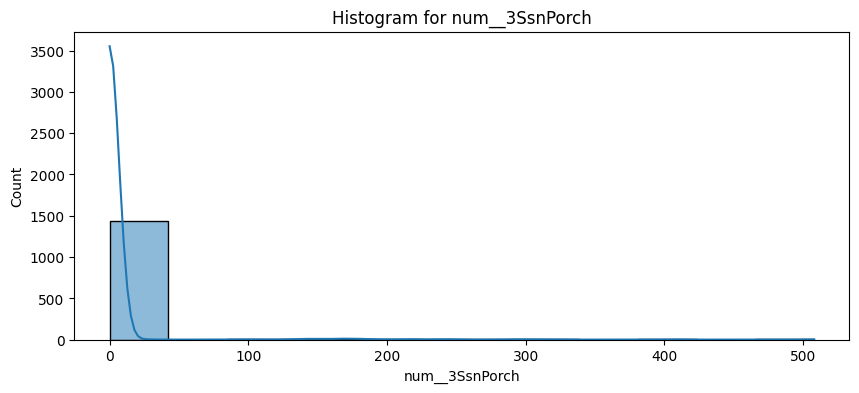

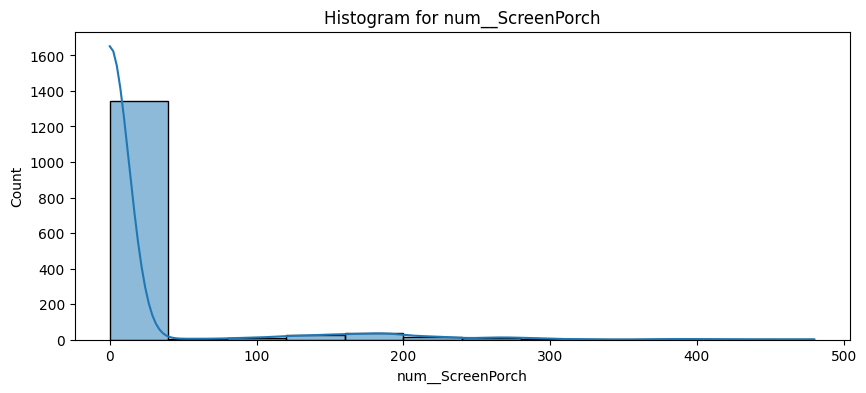

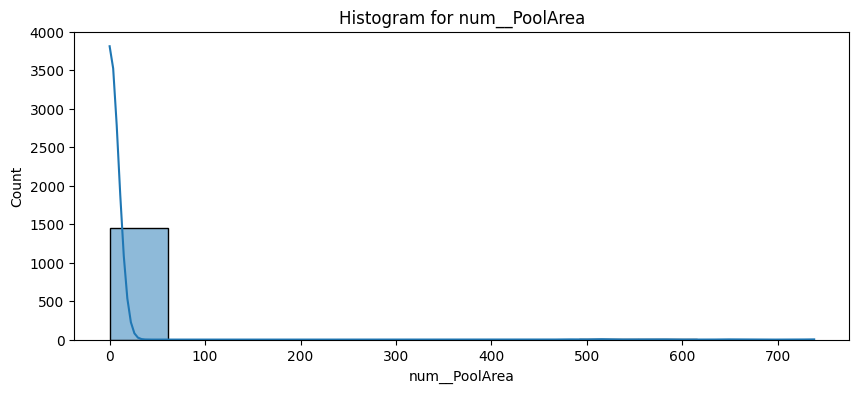

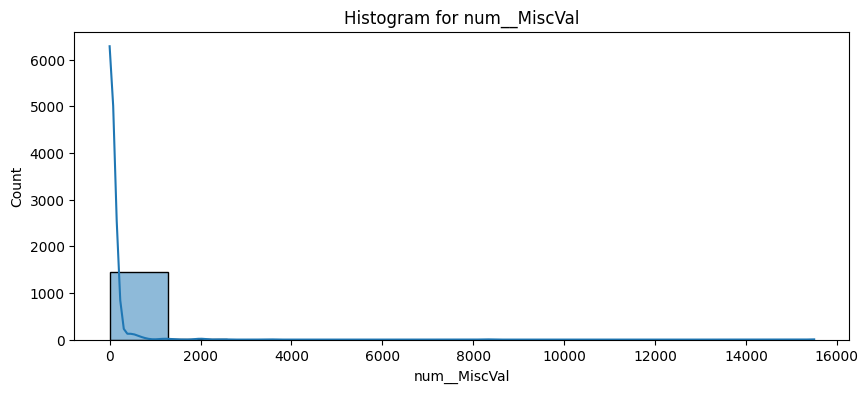

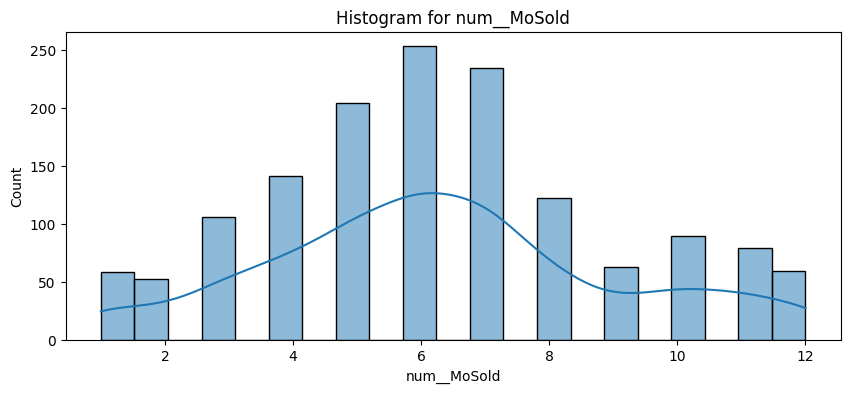

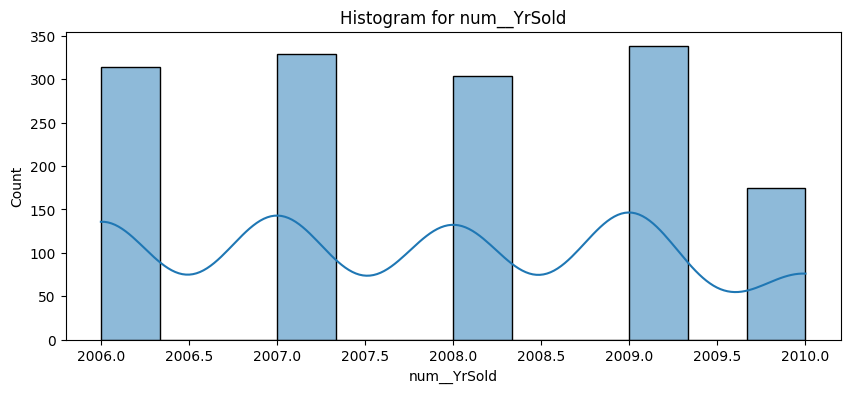

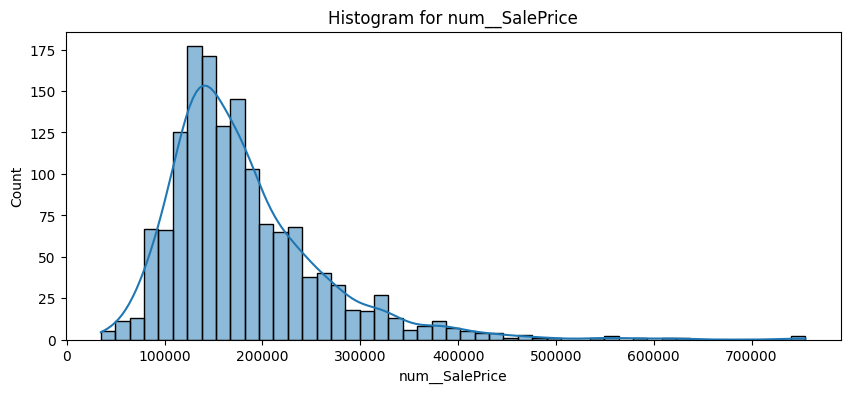

In [43]:
for i in con_clean:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=df_clean, x=i, kde=True)
    plt.title(f'Histogram for {i}')
    plt.show()

In [44]:
con_clean

['num__MSSubClass',
 'num__LotFrontage',
 'num__LotArea',
 'num__OverallQual',
 'num__OverallCond',
 'num__YearBuilt',
 'num__YearRemodAdd',
 'num__MasVnrArea',
 'num__BsmtFinSF1',
 'num__BsmtFinSF2',
 'num__BsmtUnfSF',
 'num__TotalBsmtSF',
 'num__1stFlrSF',
 'num__2ndFlrSF',
 'num__LowQualFinSF',
 'num__GrLivArea',
 'num__BsmtFullBath',
 'num__BsmtHalfBath',
 'num__FullBath',
 'num__HalfBath',
 'num__BedroomAbvGr',
 'num__KitchenAbvGr',
 'num__TotRmsAbvGrd',
 'num__Fireplaces',
 'num__GarageYrBlt',
 'num__GarageCars',
 'num__GarageArea',
 'num__WoodDeckSF',
 'num__OpenPorchSF',
 'num__EnclosedPorch',
 'num__3SsnPorch',
 'num__ScreenPorch',
 'num__PoolArea',
 'num__MiscVal',
 'num__MoSold',
 'num__YrSold',
 'num__SalePrice']

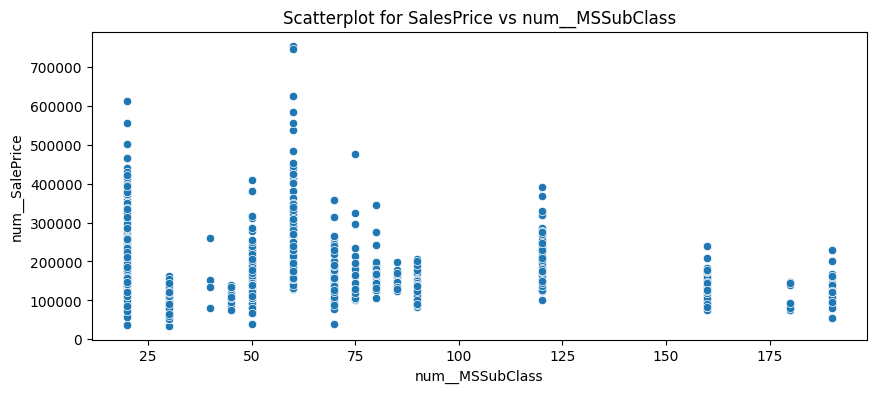

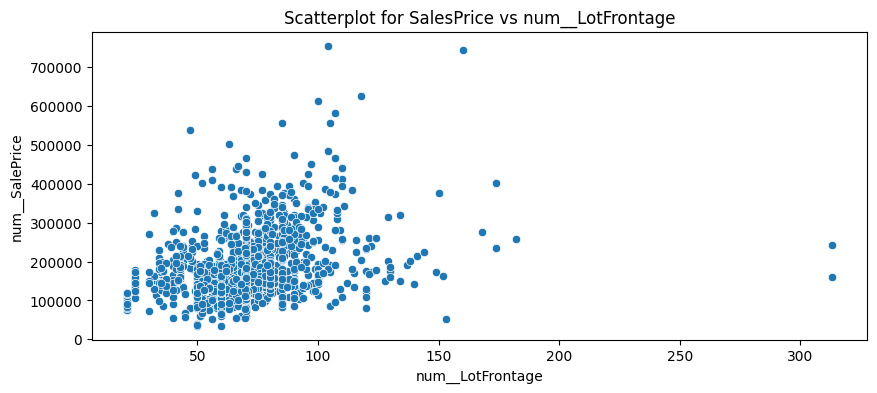

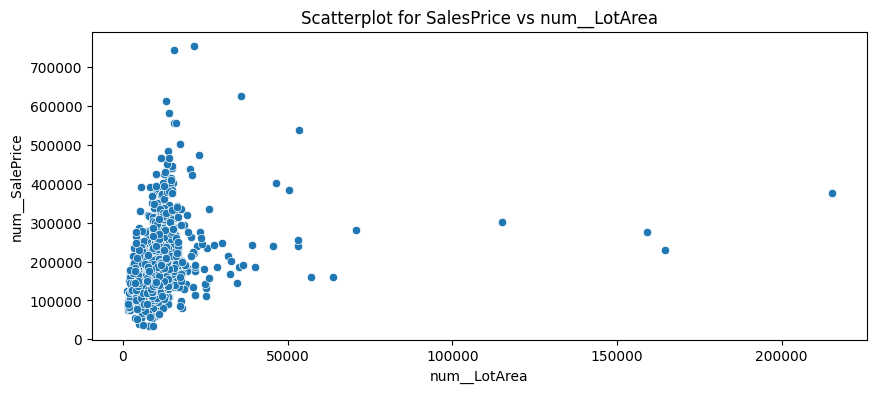

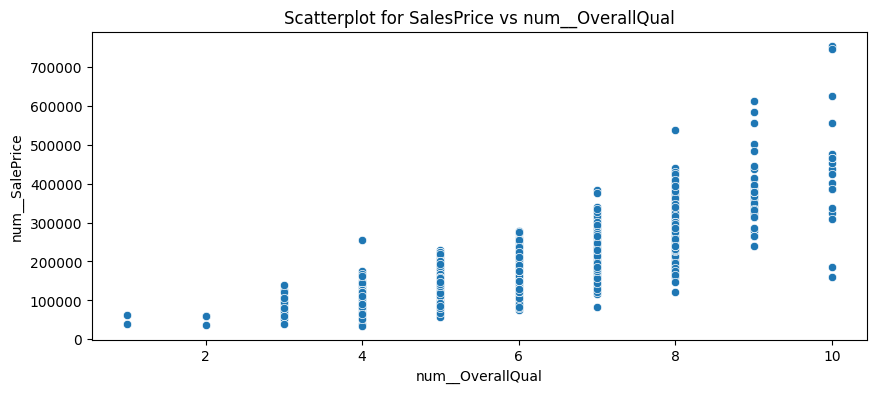

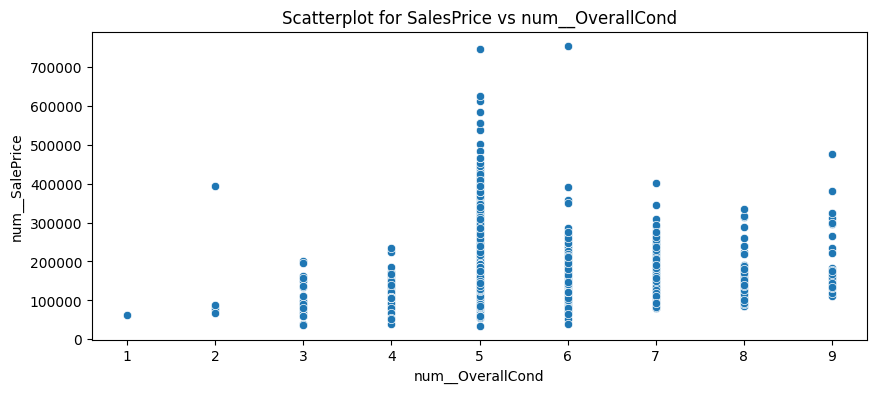

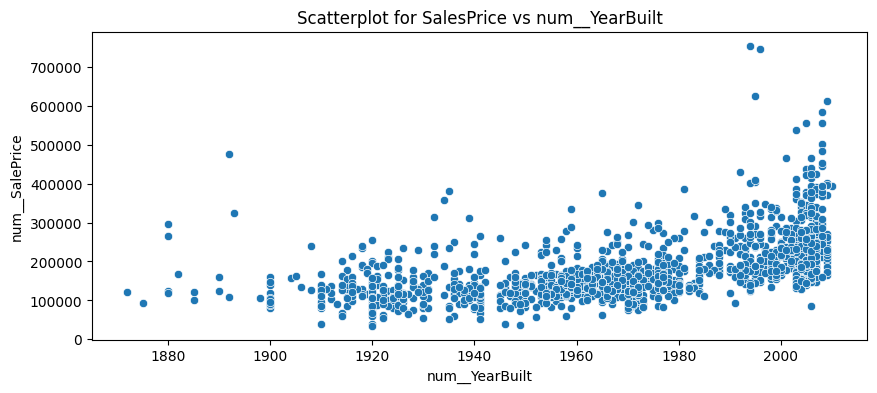

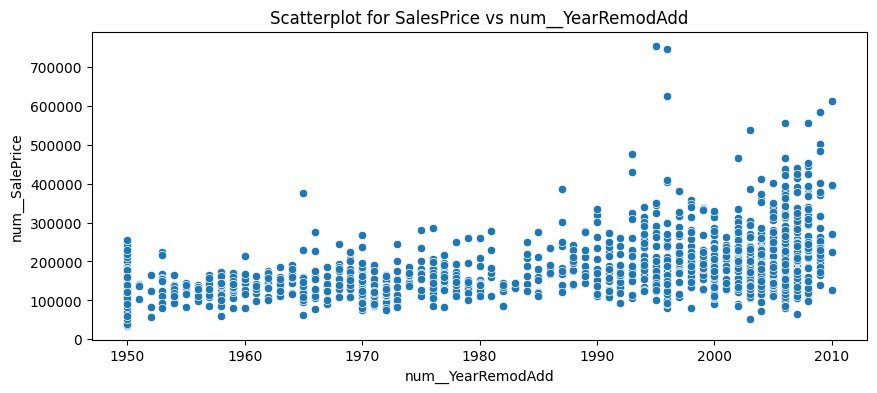

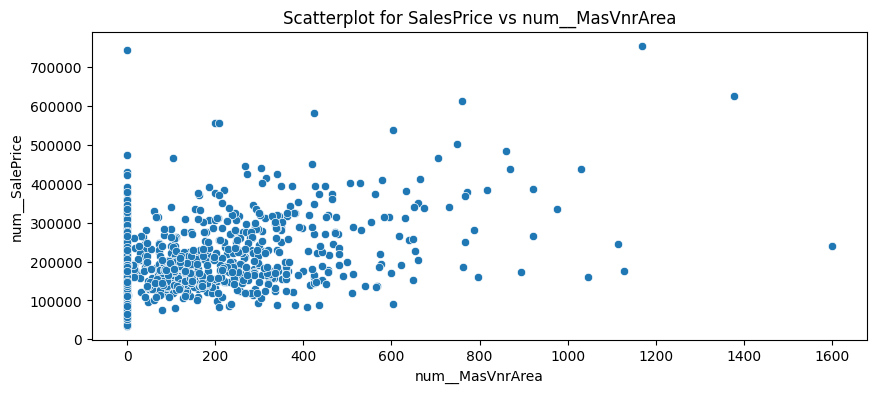

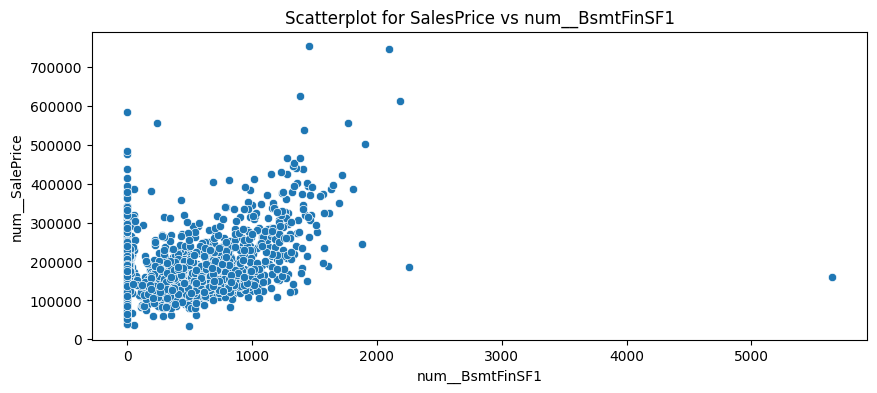

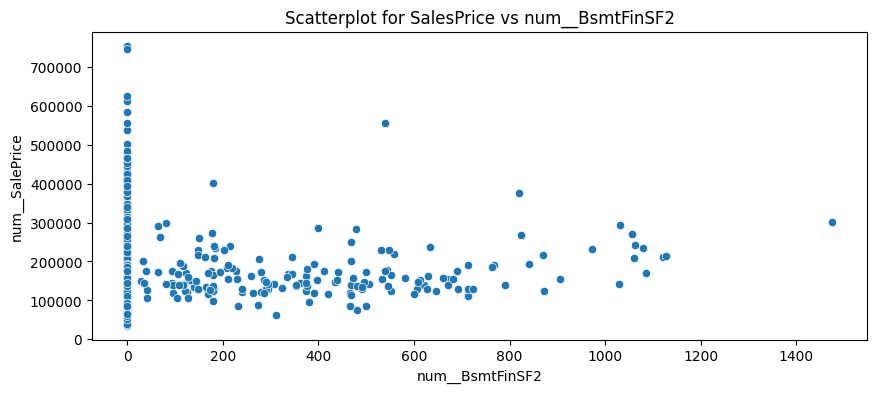

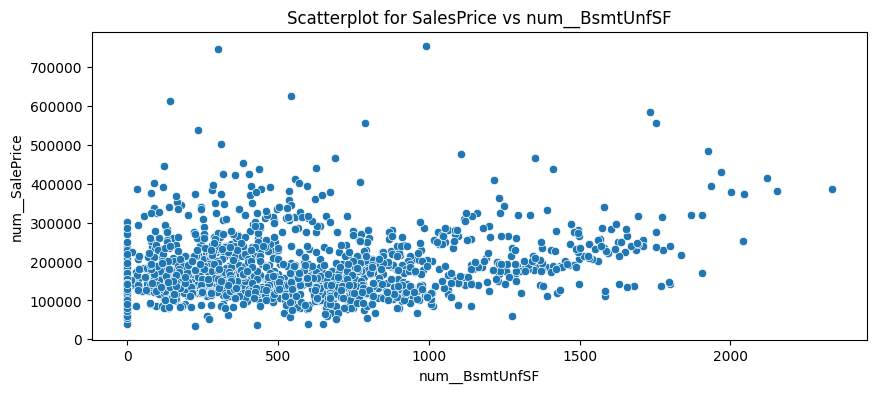

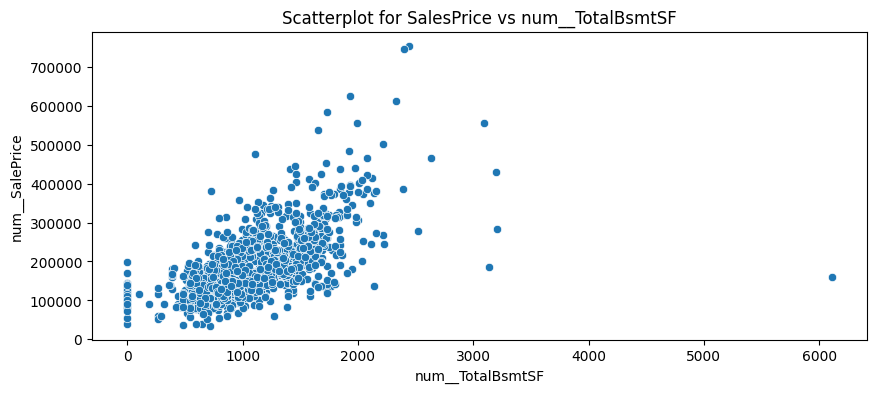

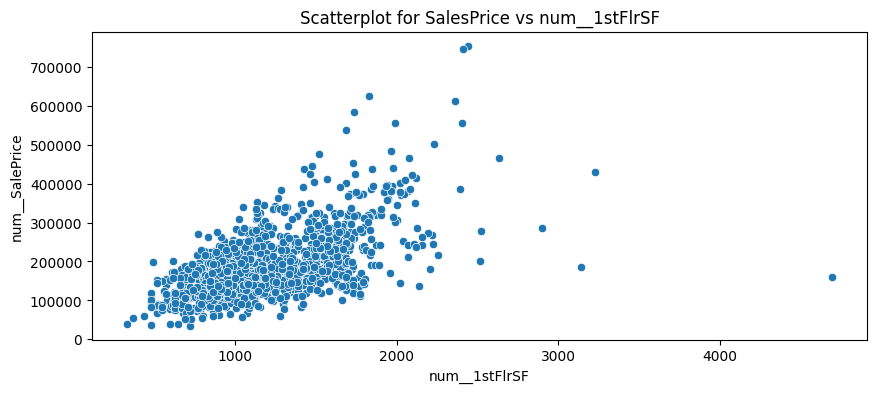

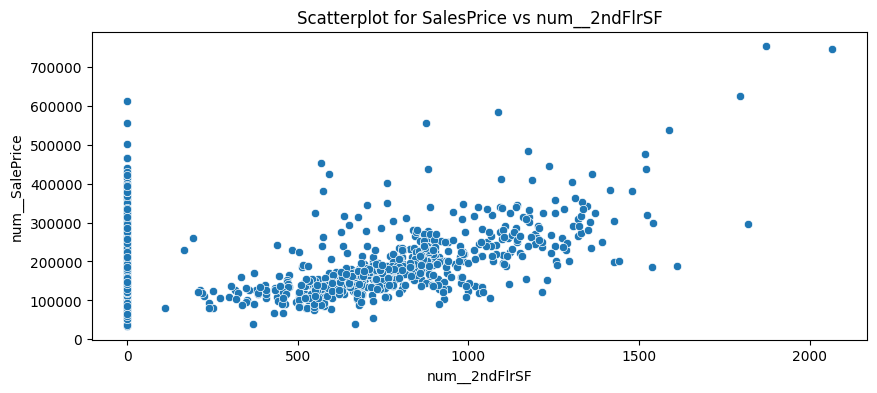

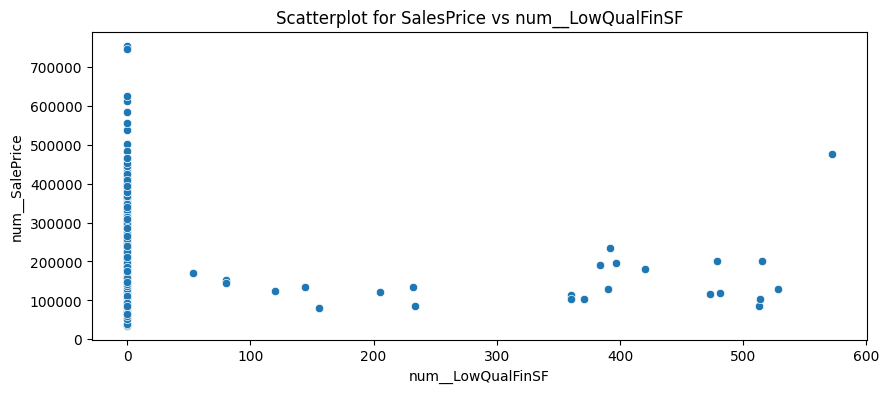

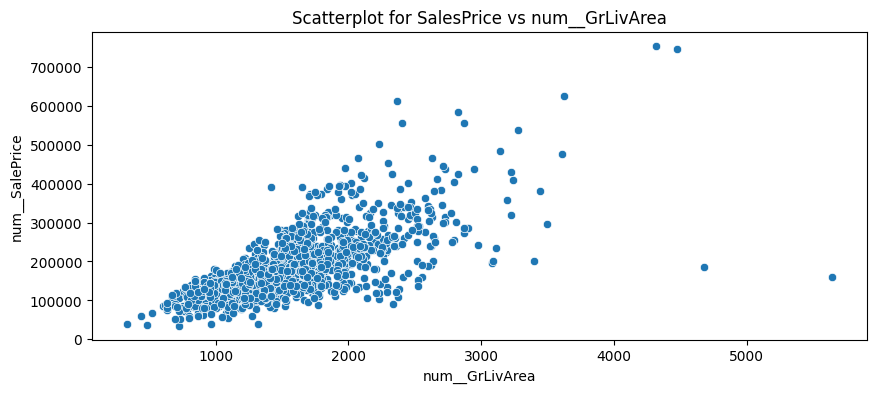

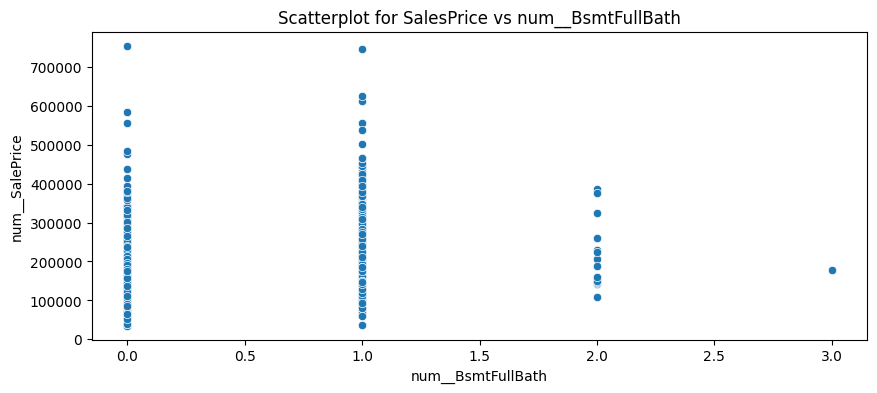

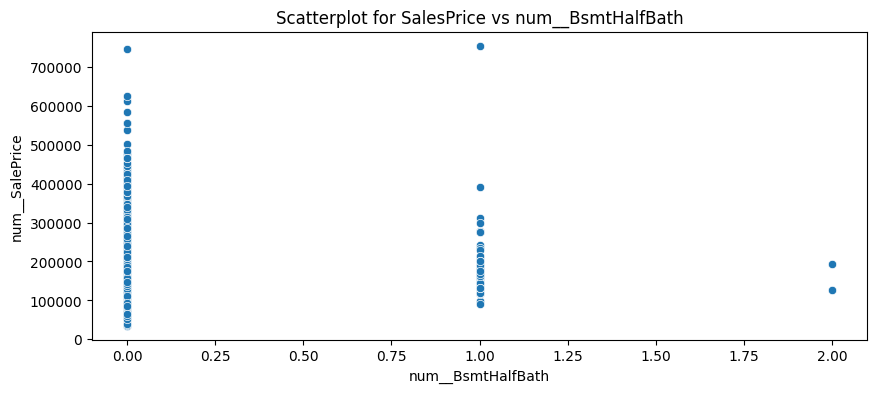

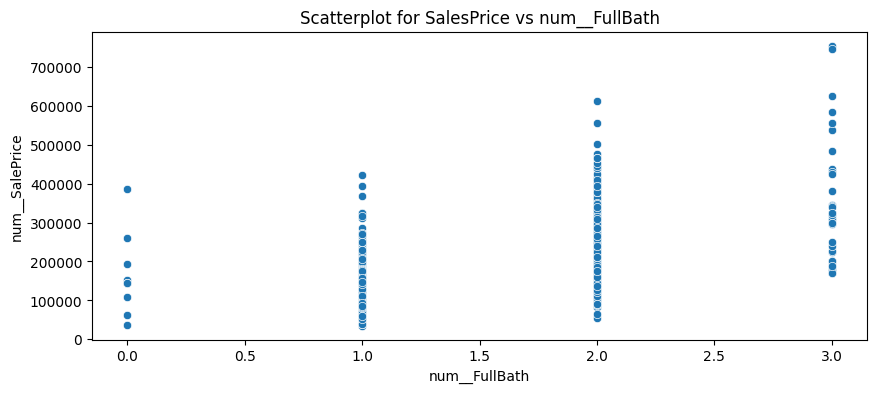

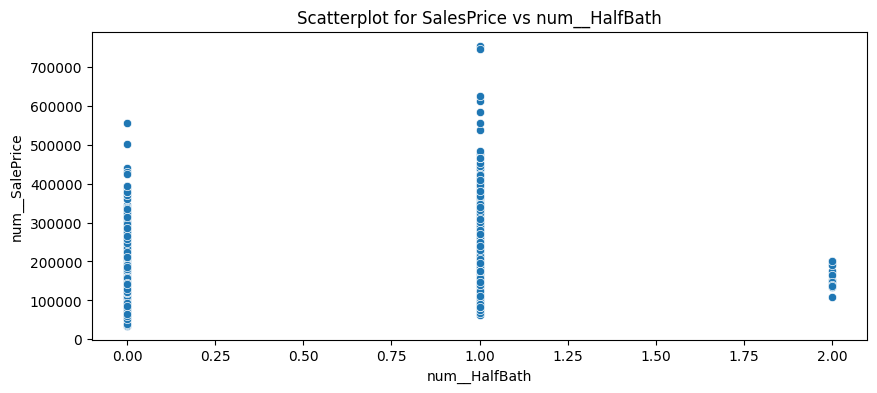

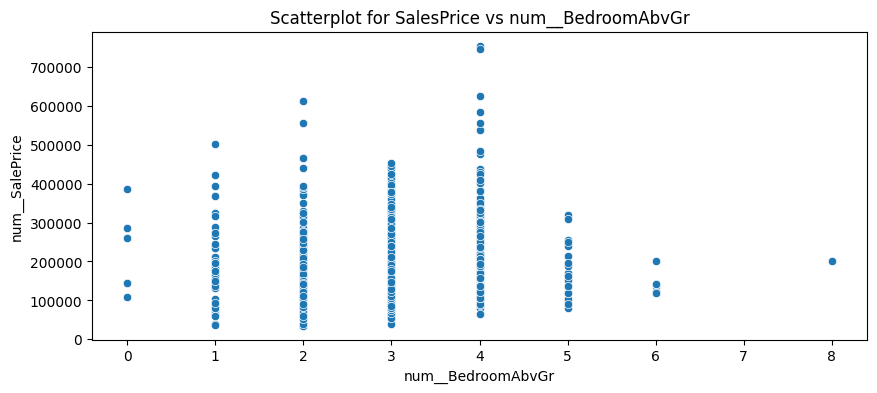

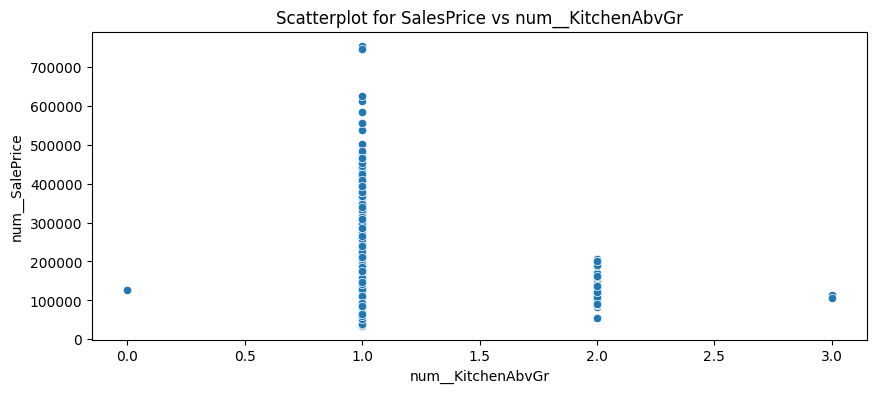

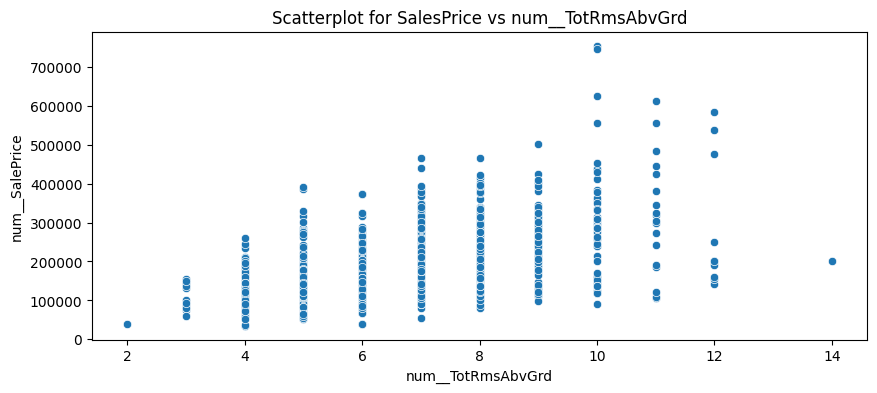

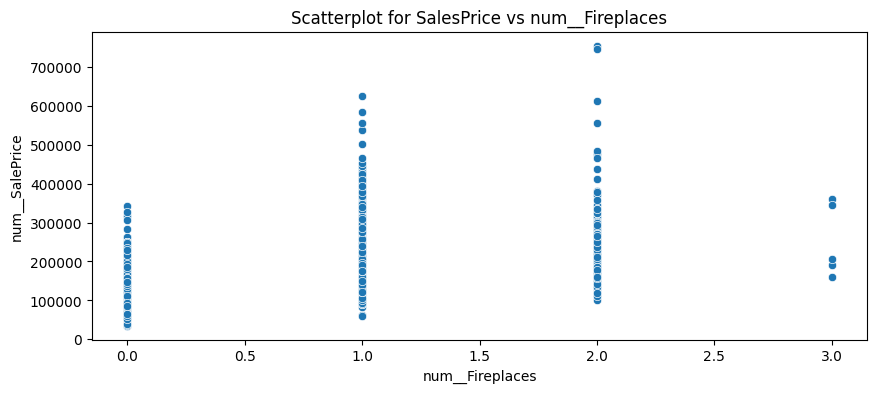

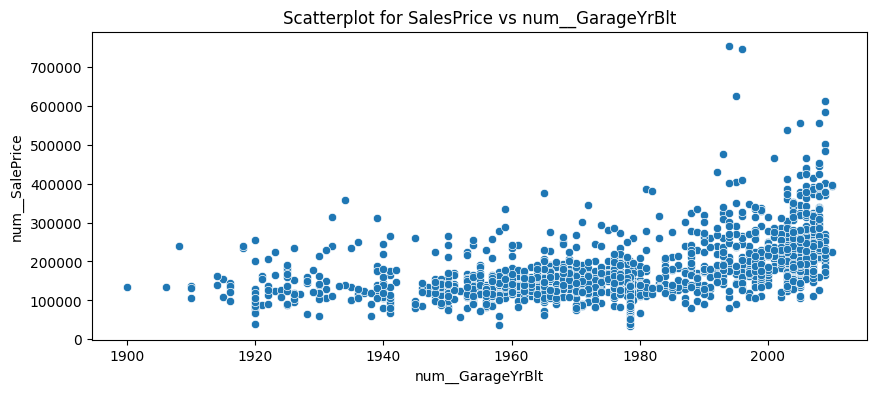

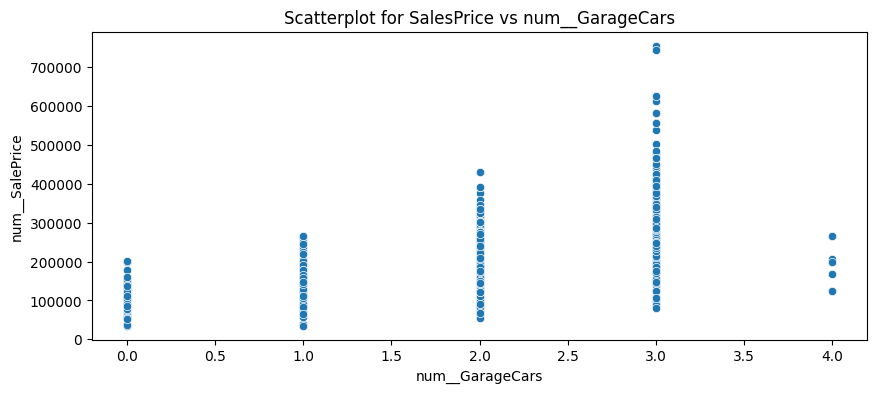

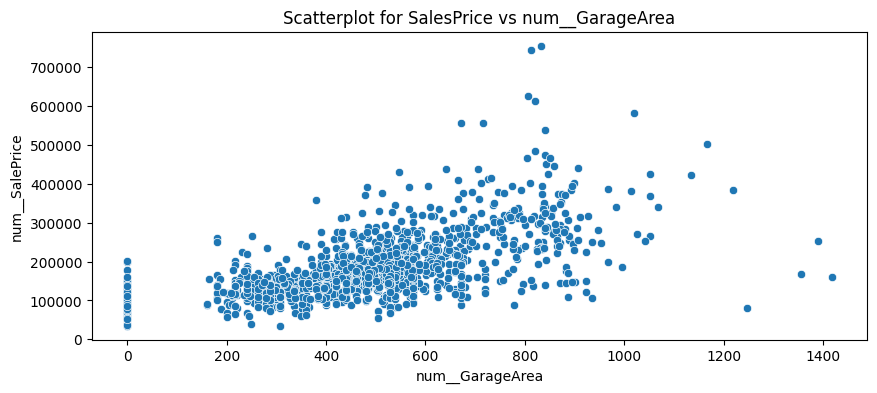

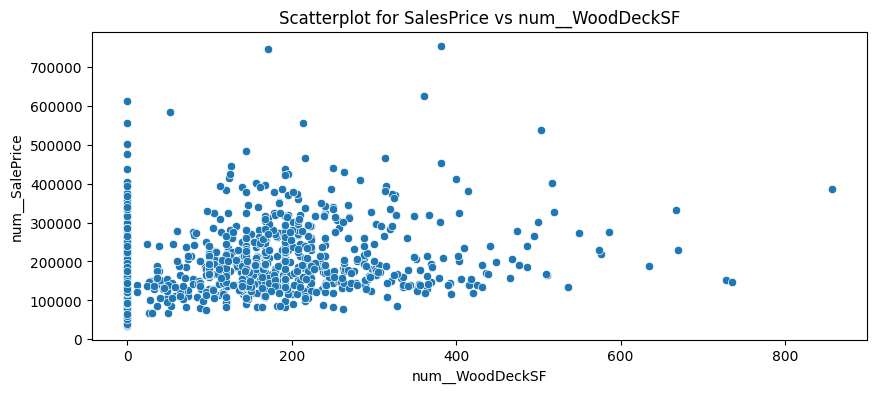

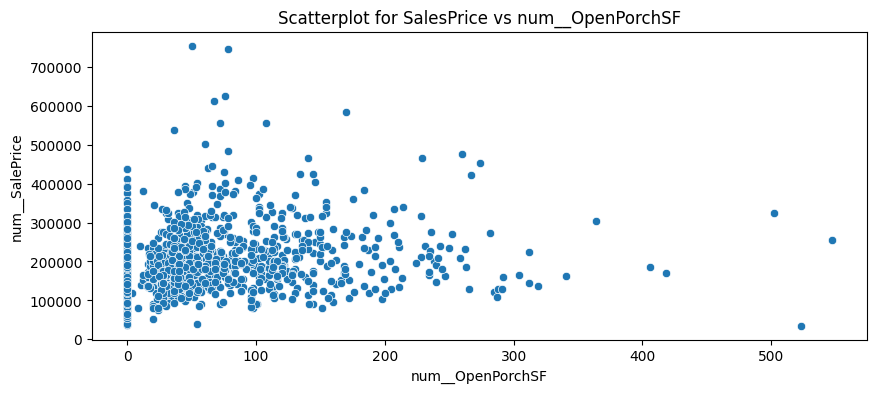

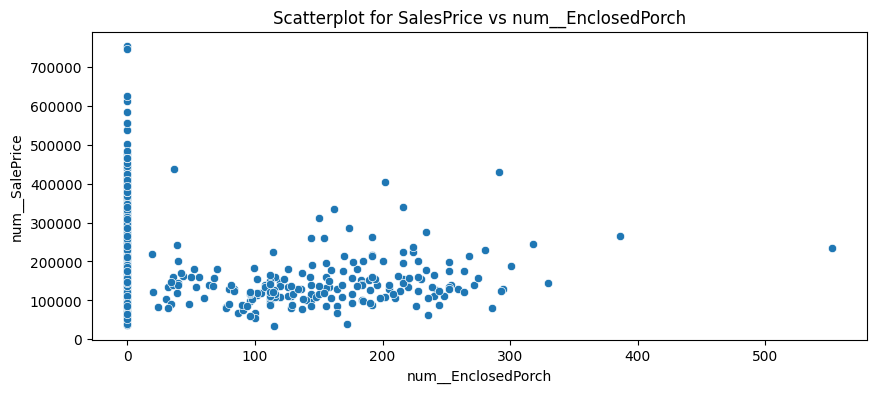

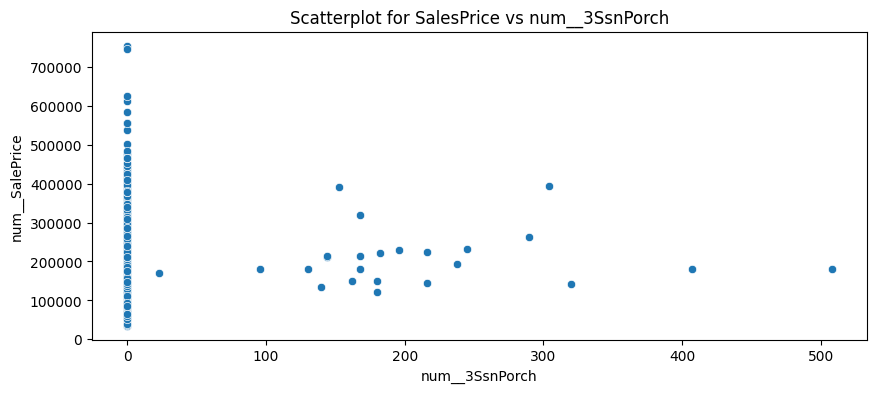

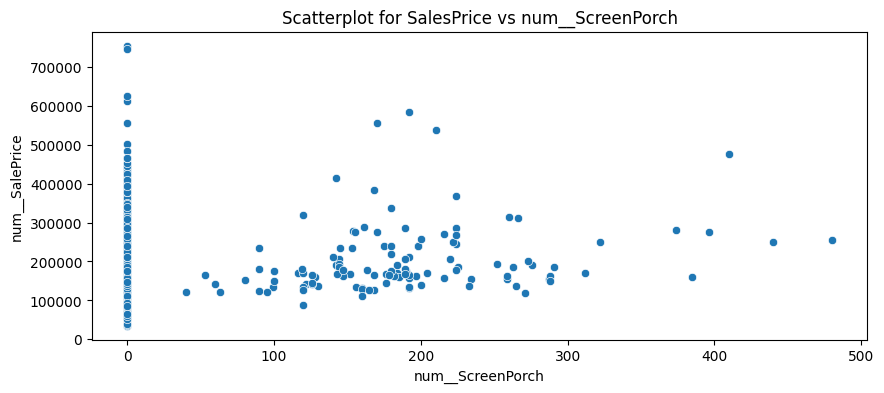

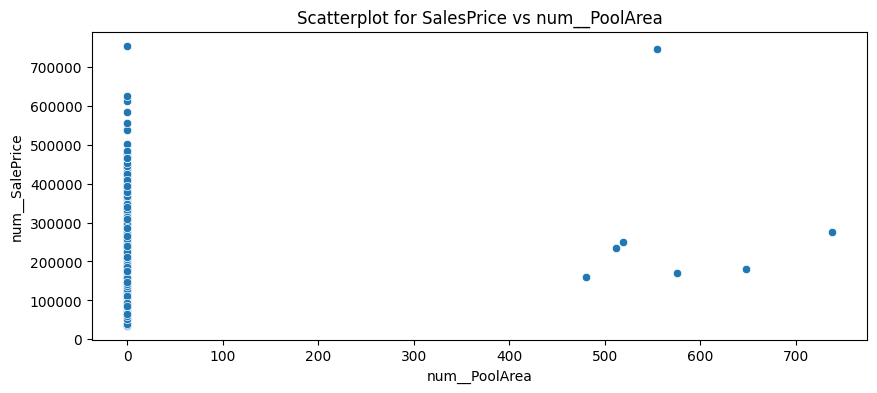

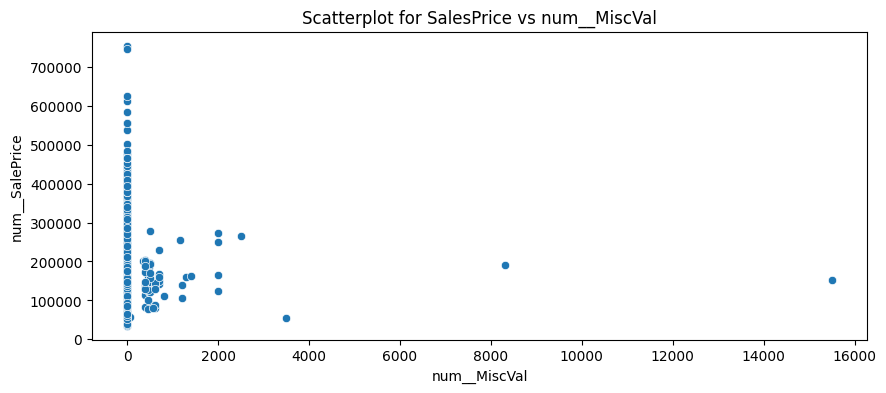

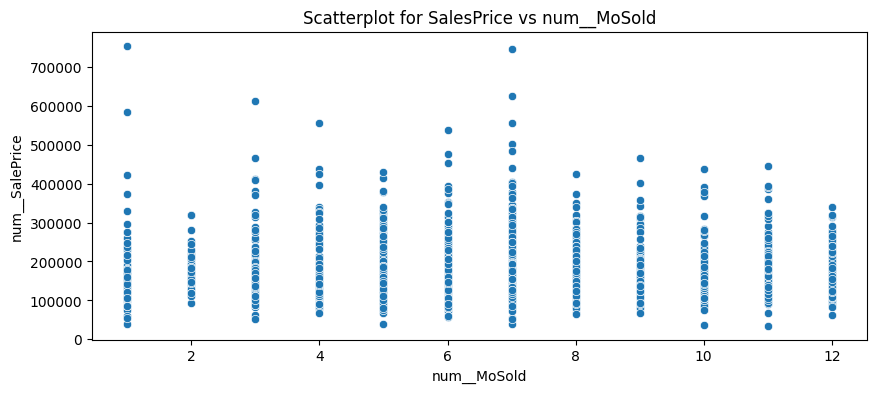

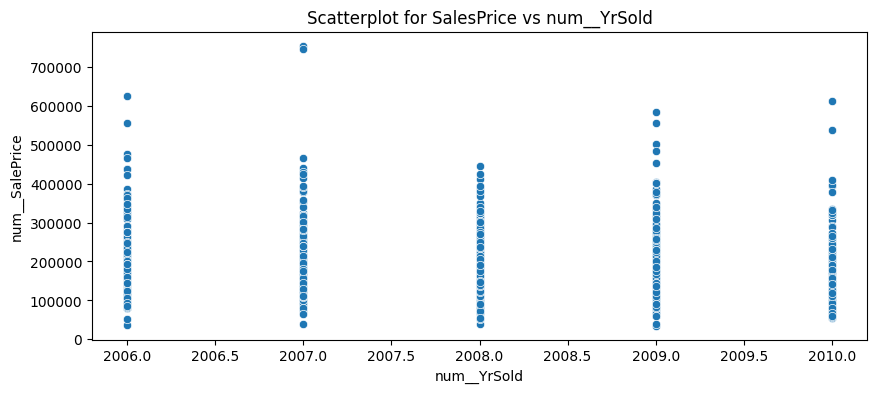

In [46]:
for i in con_clean:
    if i!= 'num__SalePrice':
        plt.figure(figsize=(10, 4.))
        sns.scatterplot(data=df_clean, x=i, y='num__SalePrice')
        plt.title(f'Scatterplot for SalesPrice vs {i}')
        plt.show()

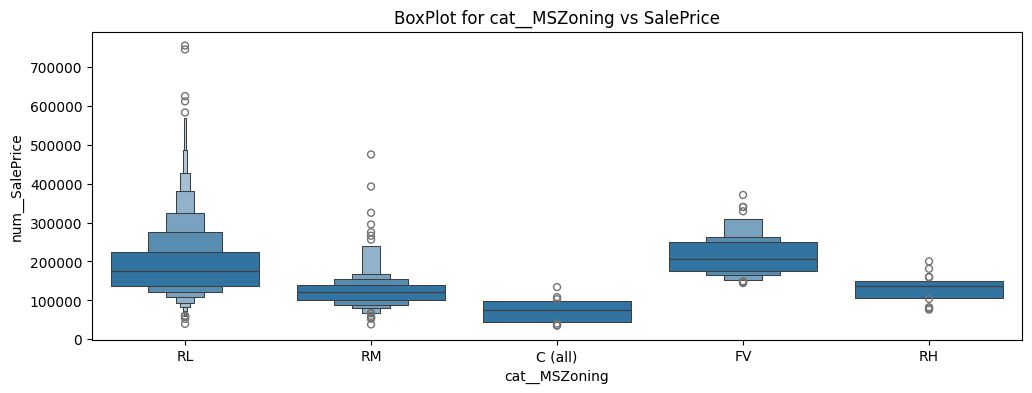

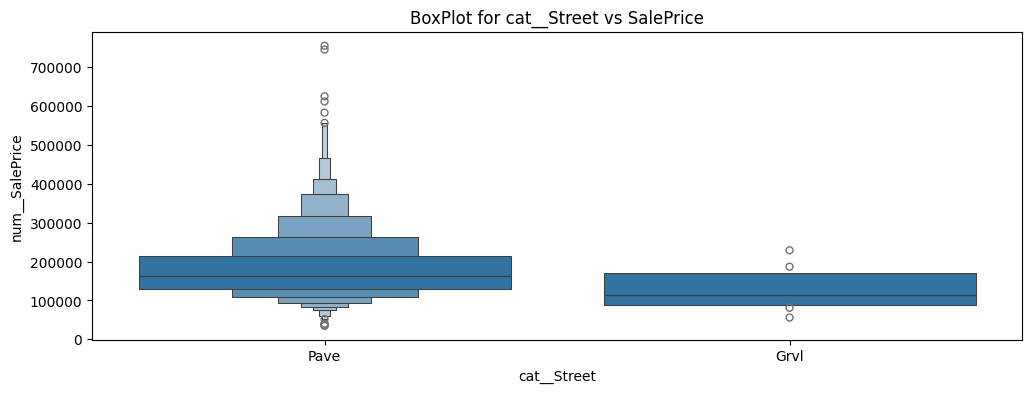

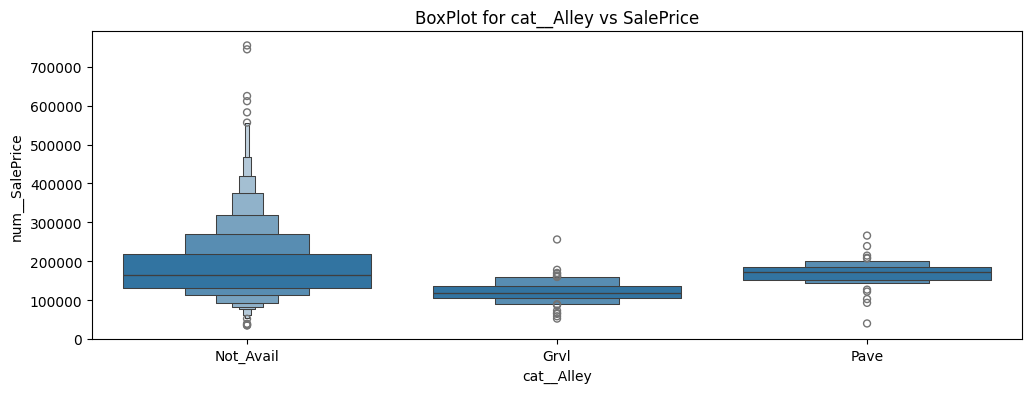

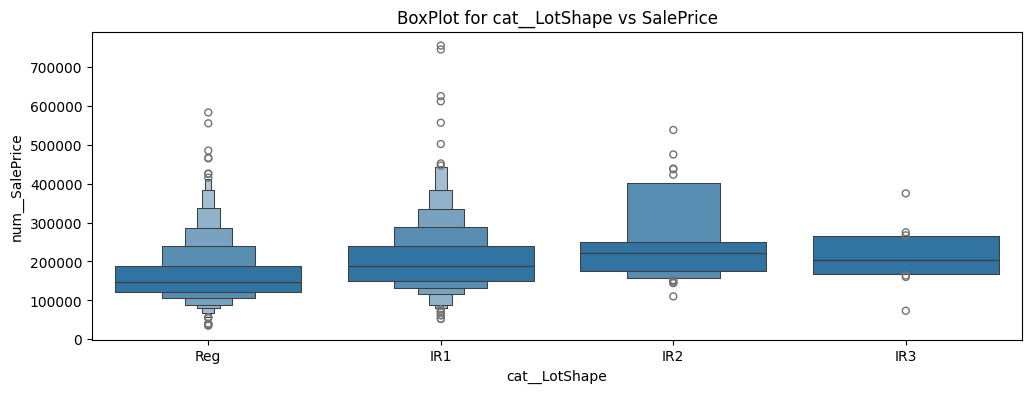

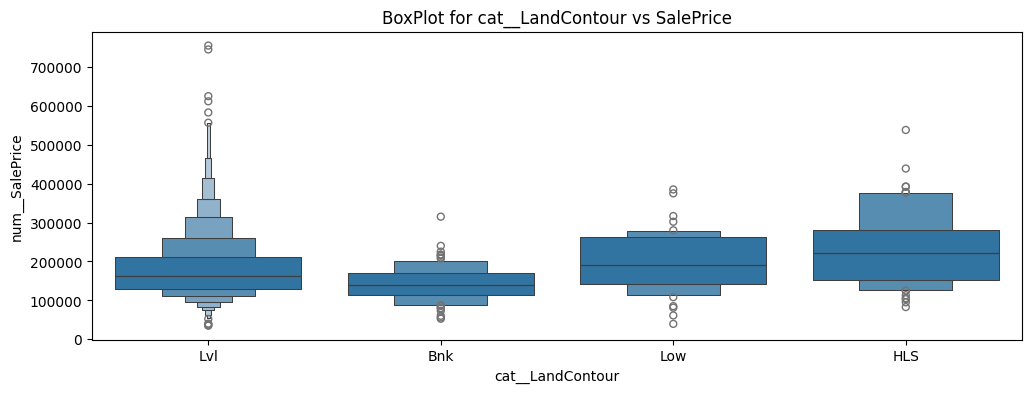

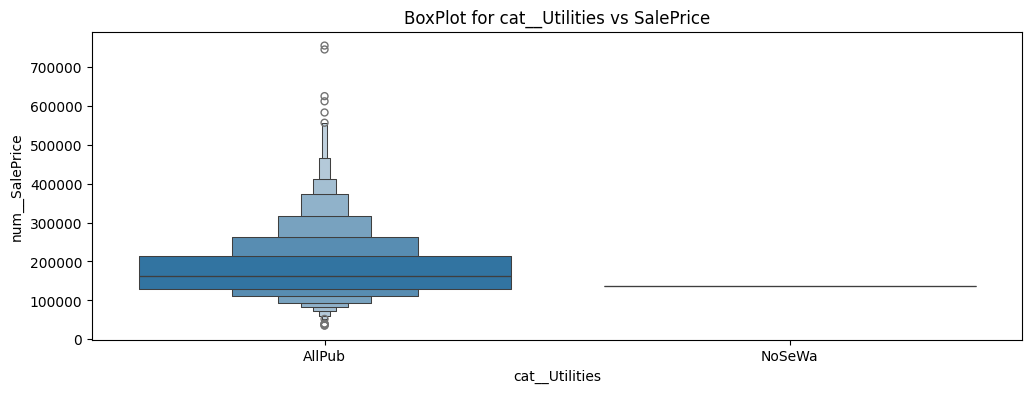

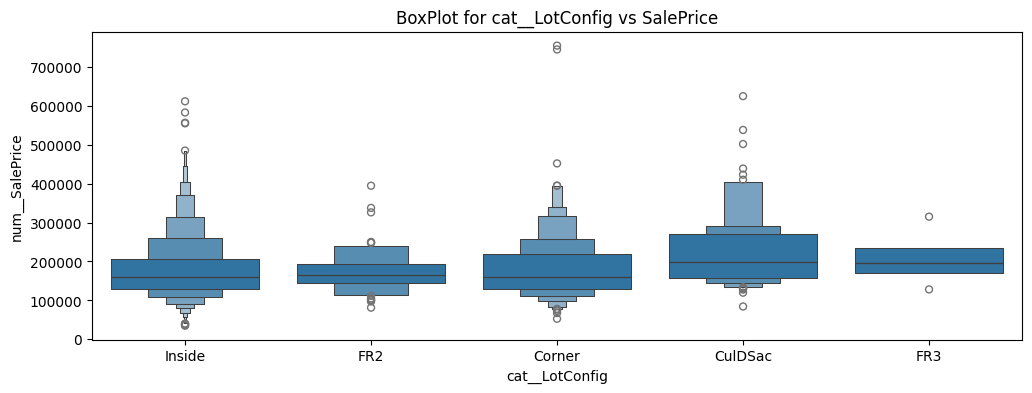

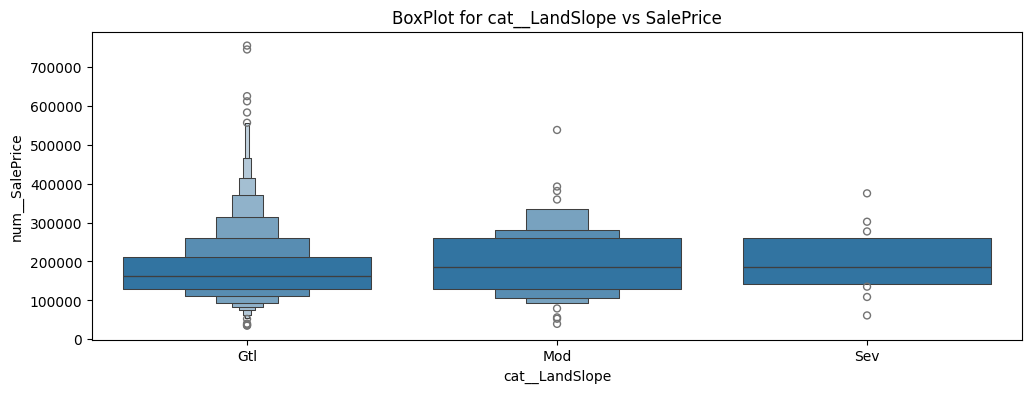

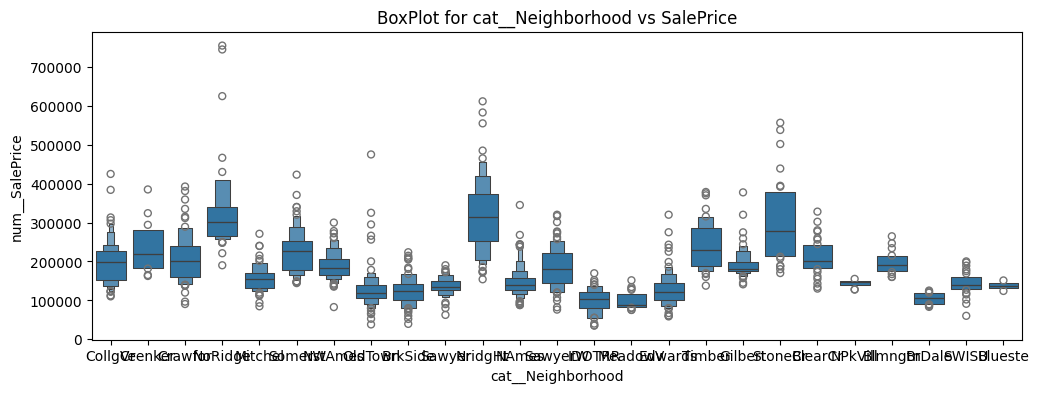

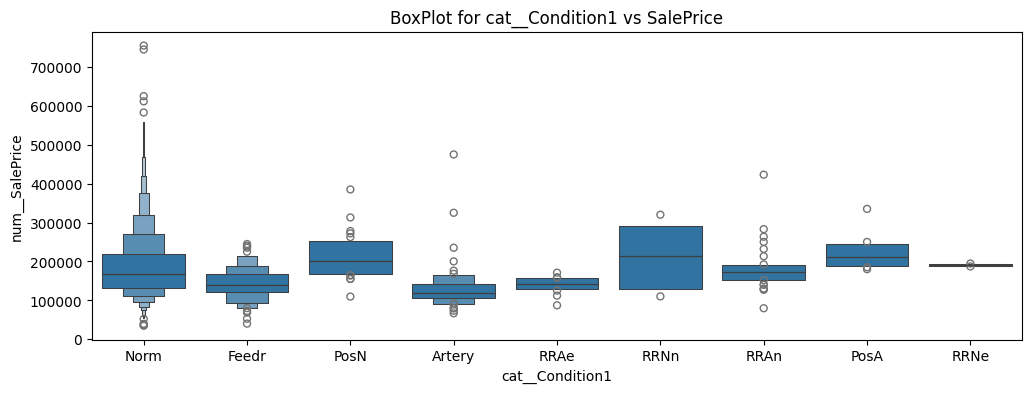

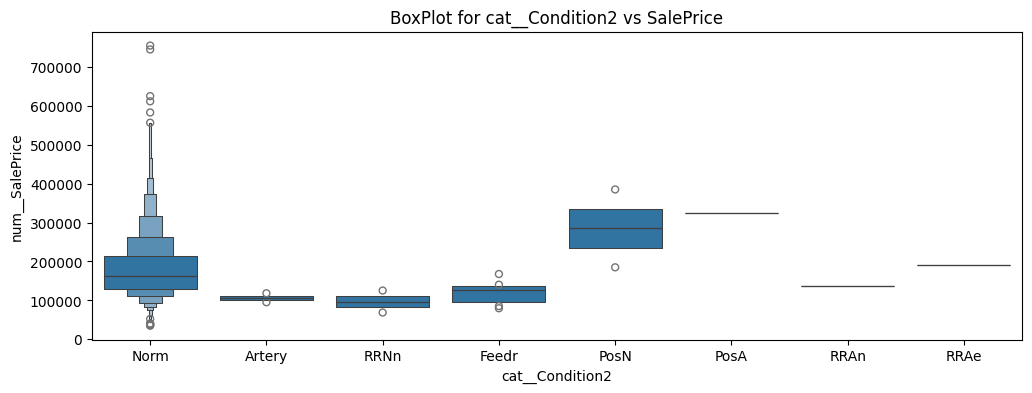

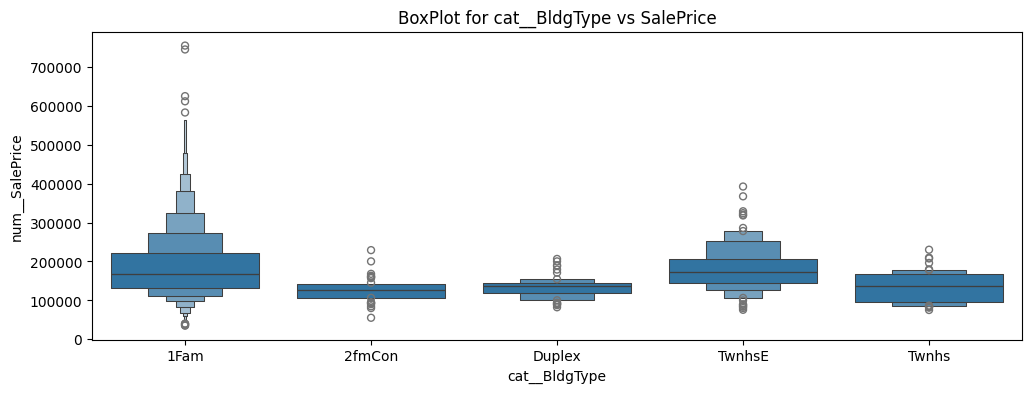

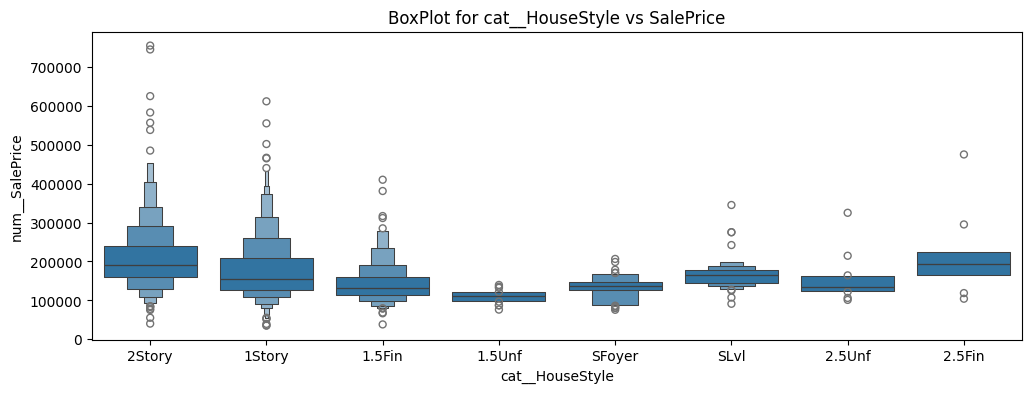

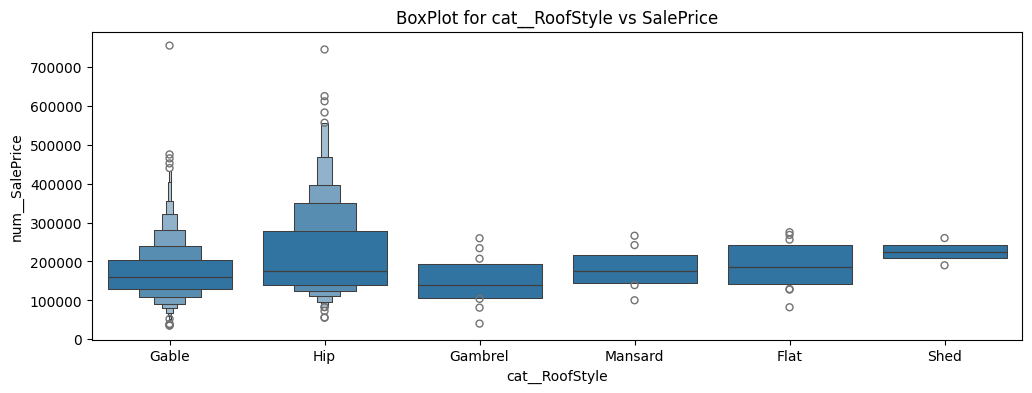

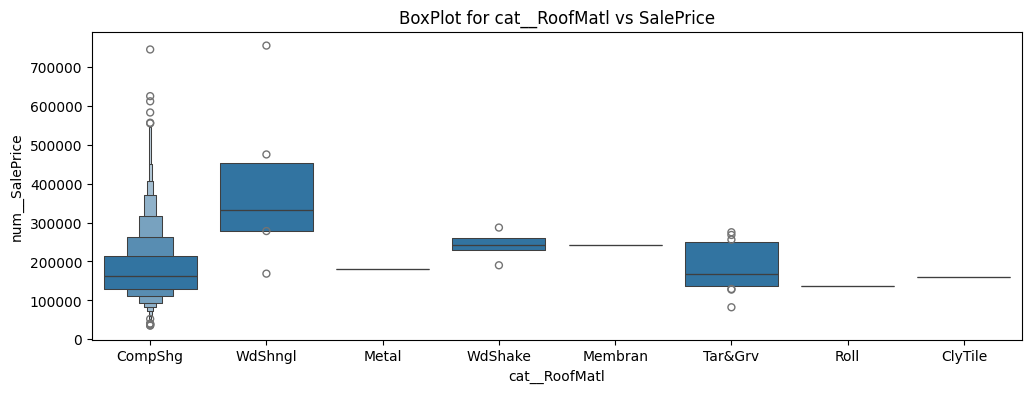

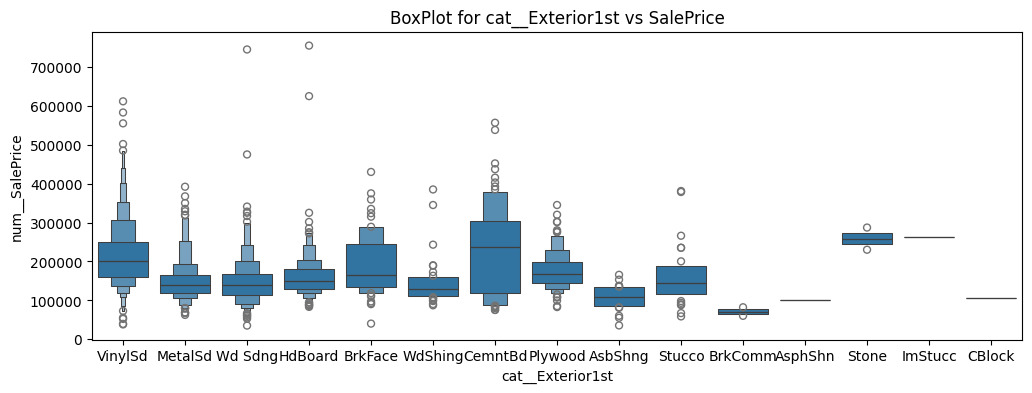

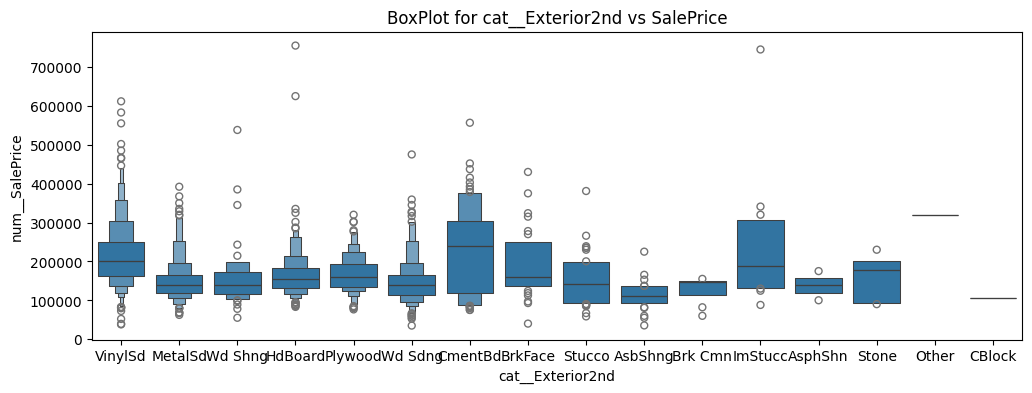

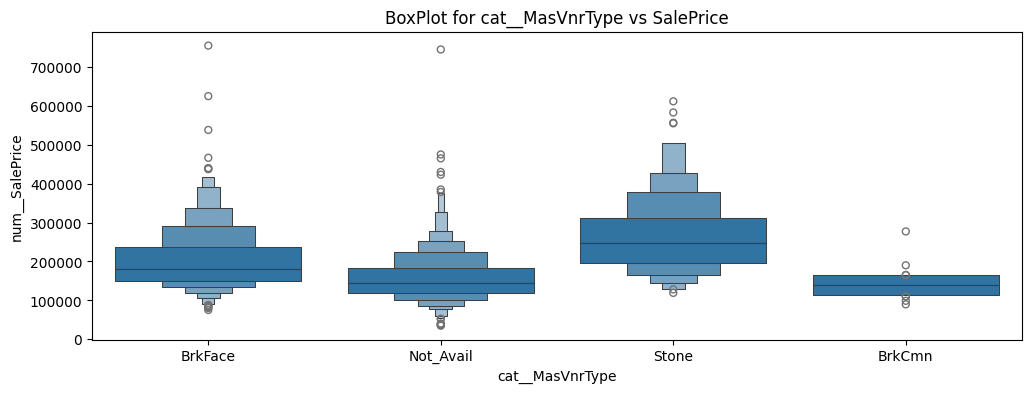

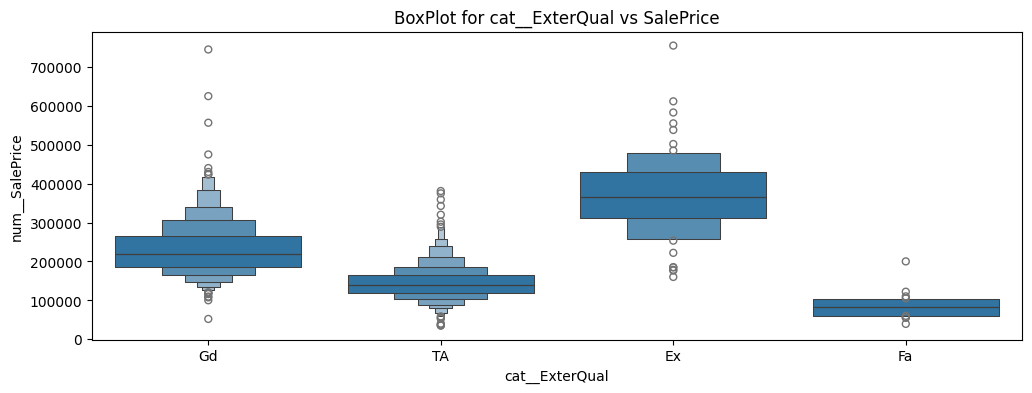

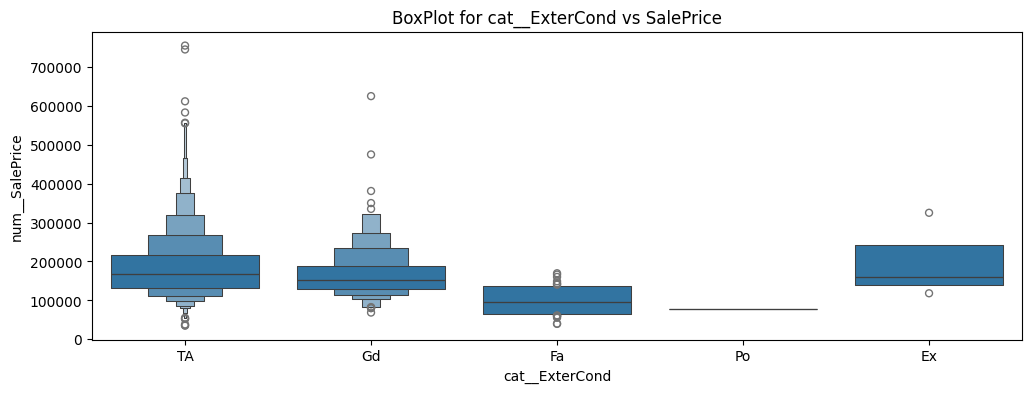

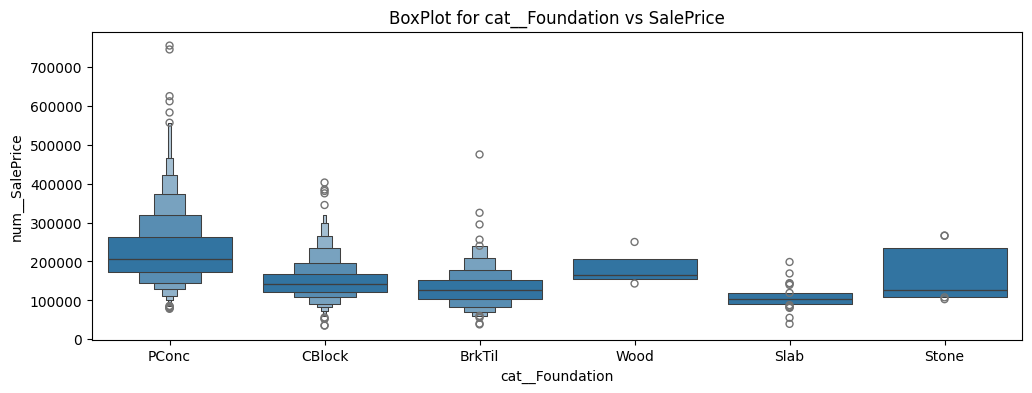

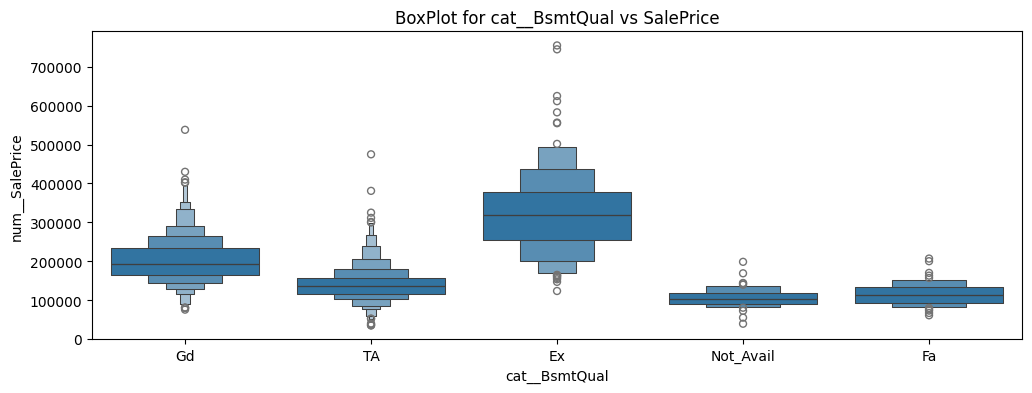

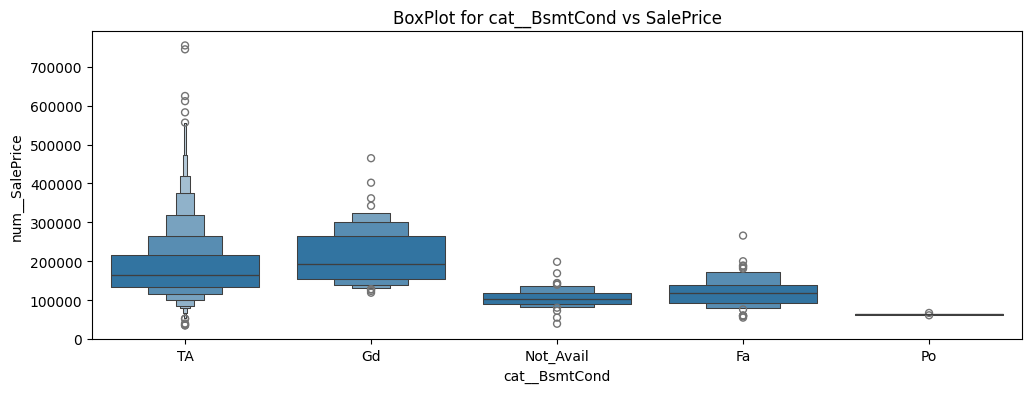

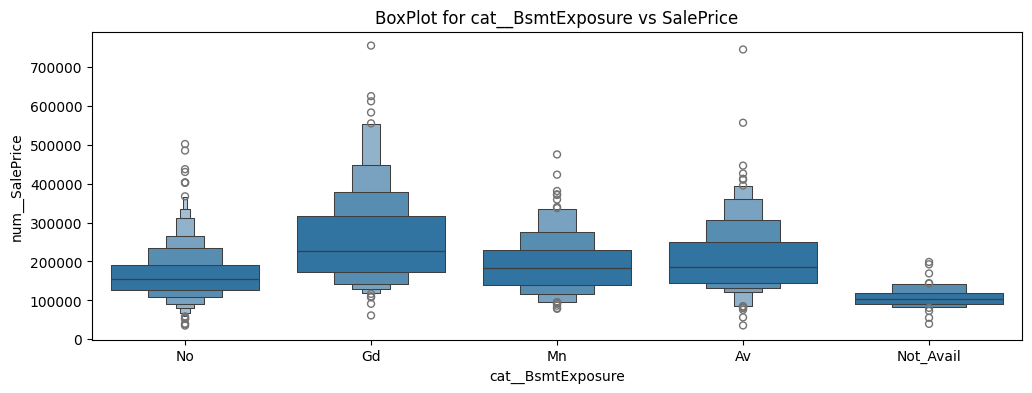

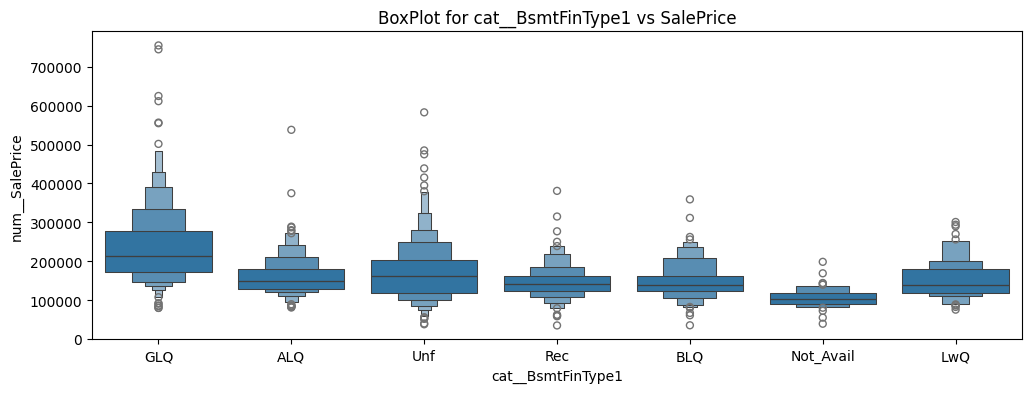

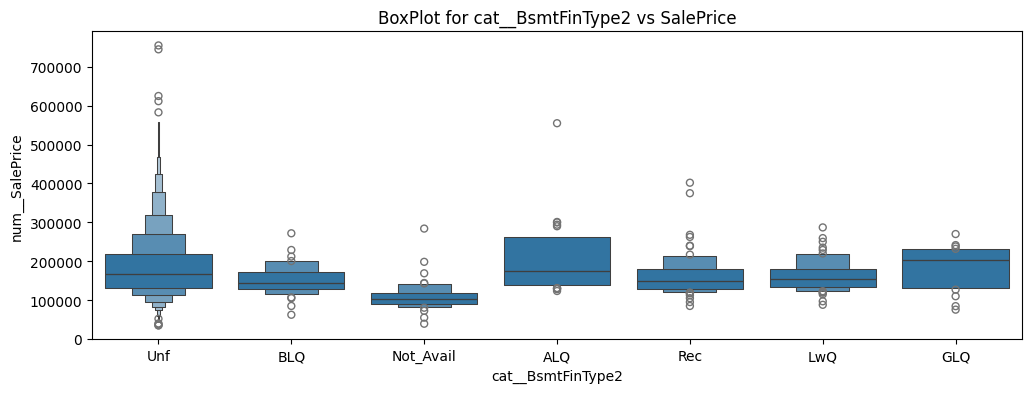

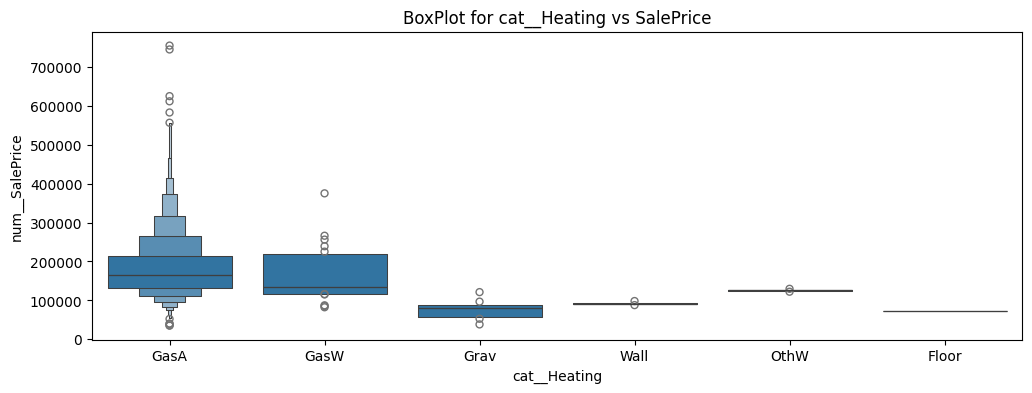

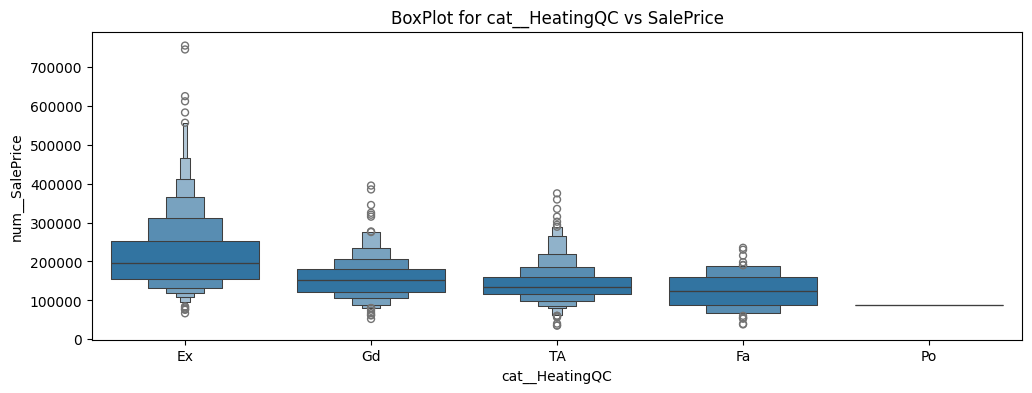

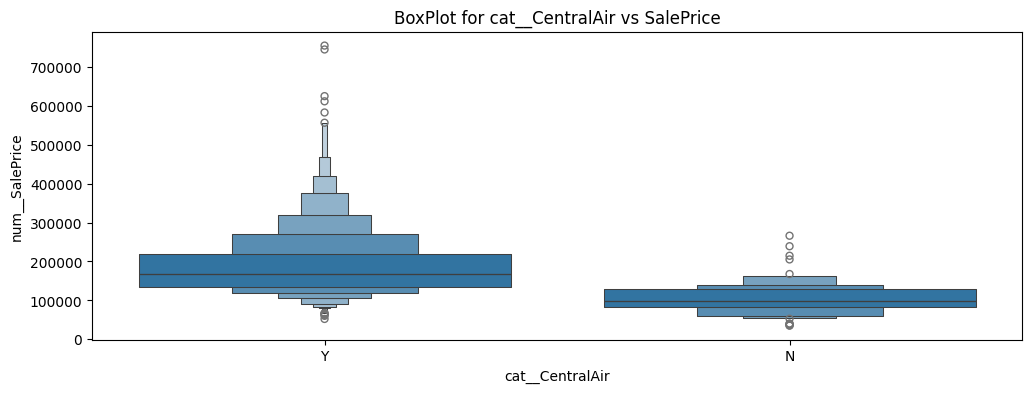

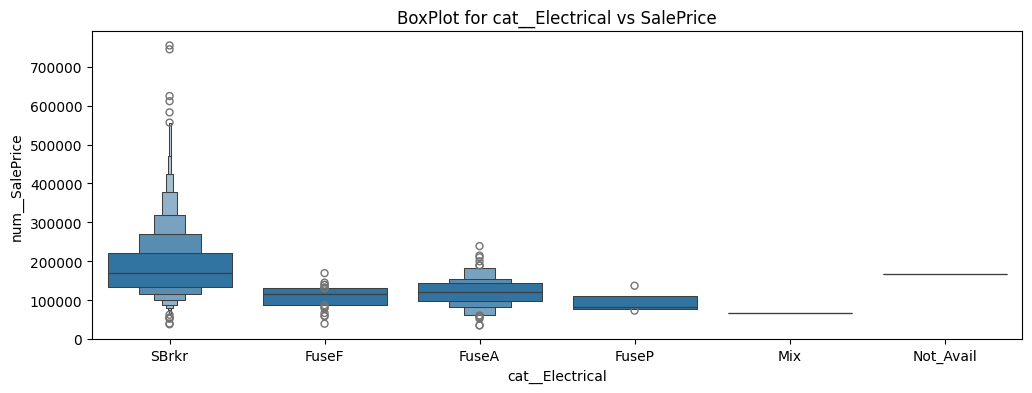

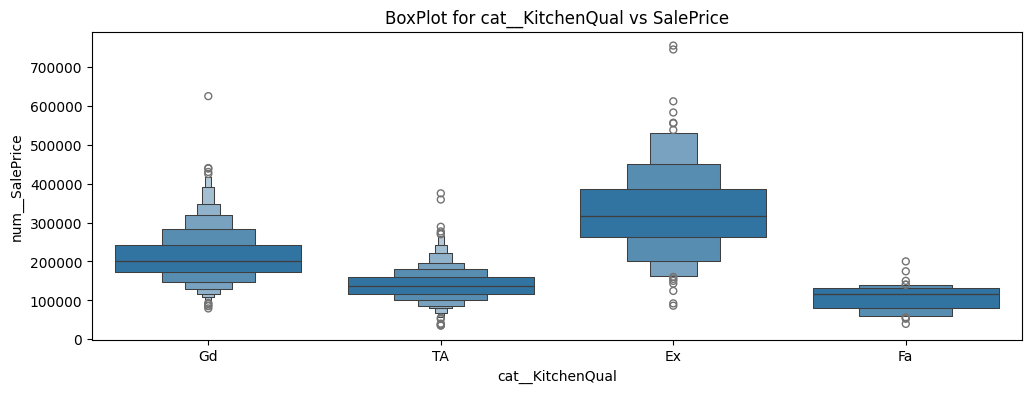

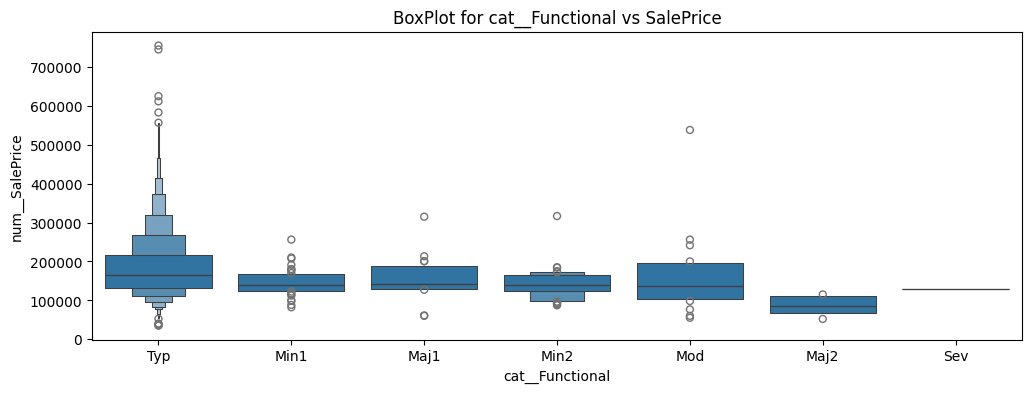

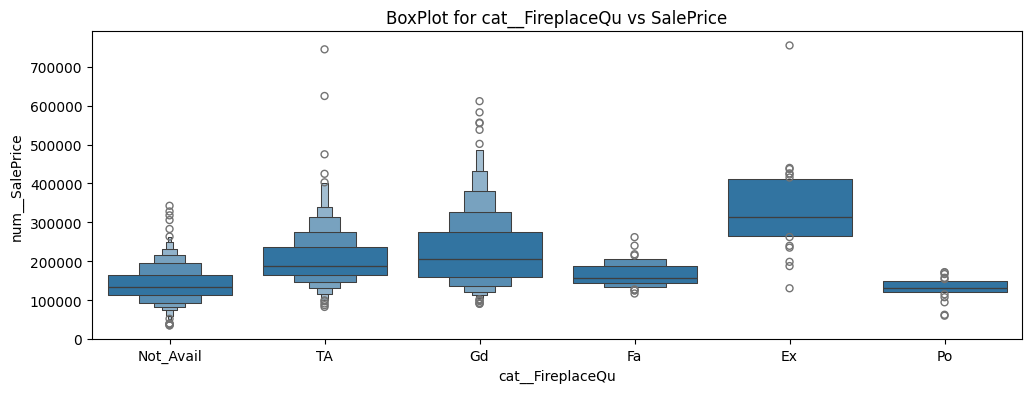

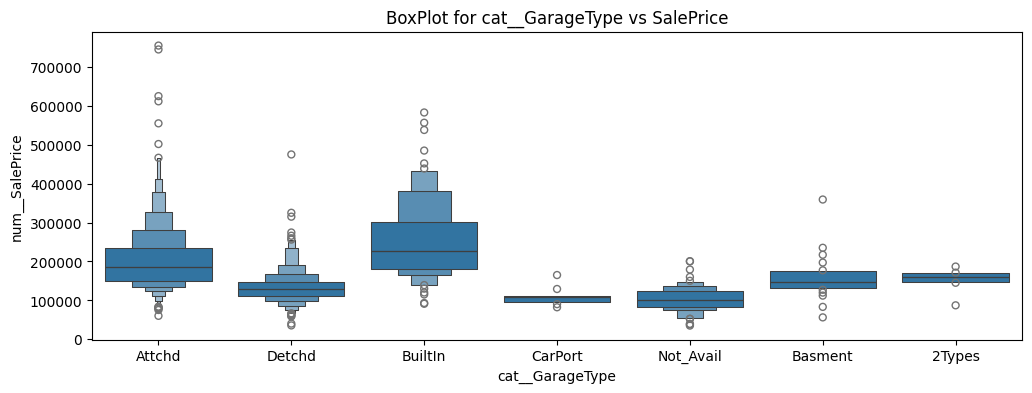

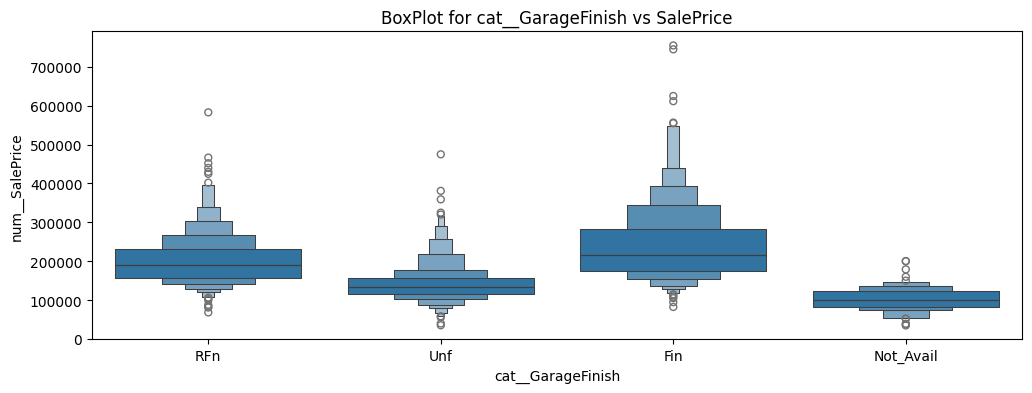

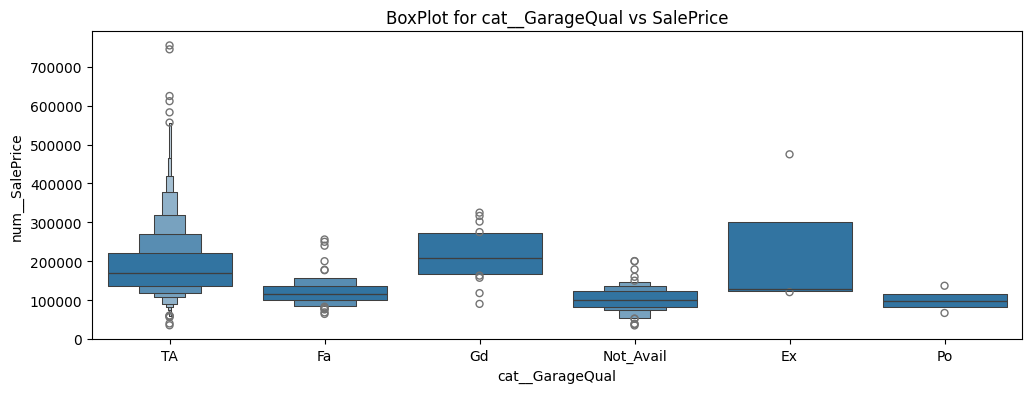

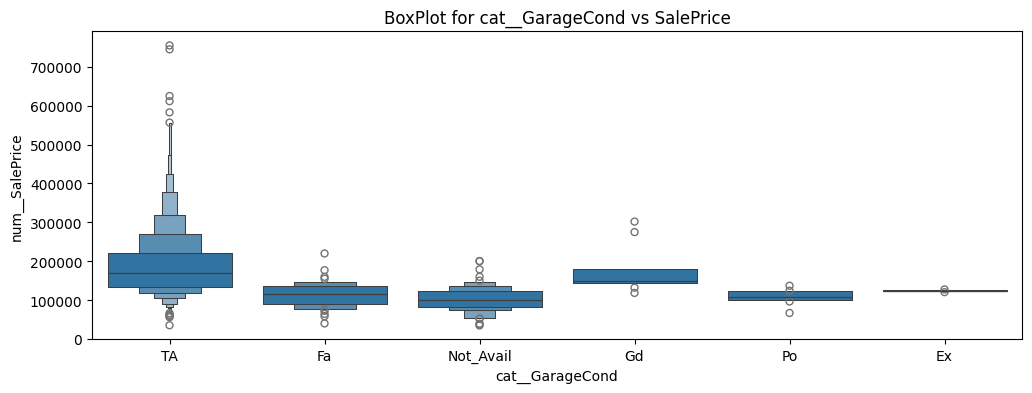

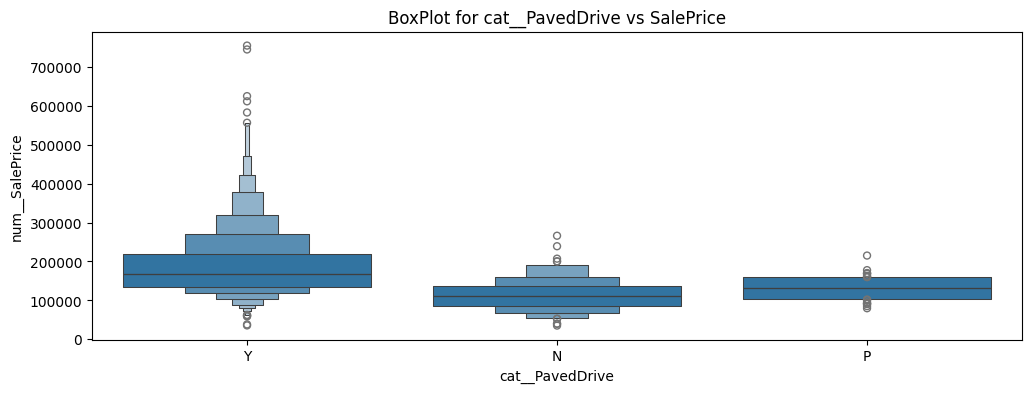

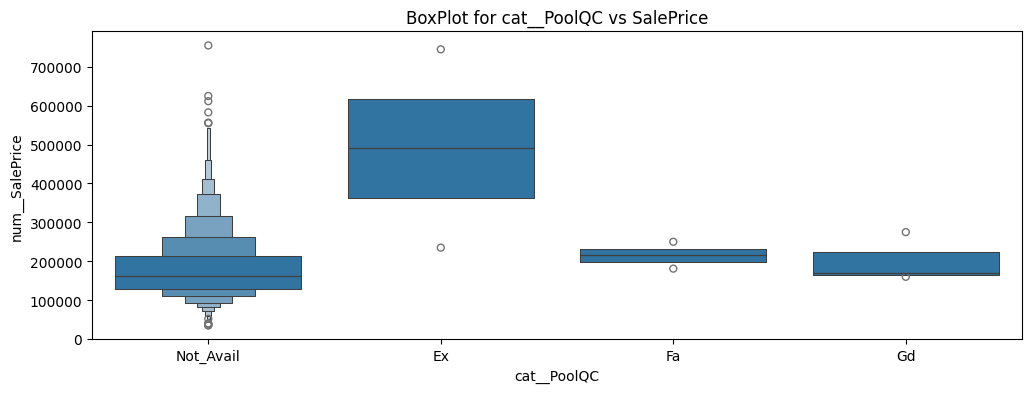

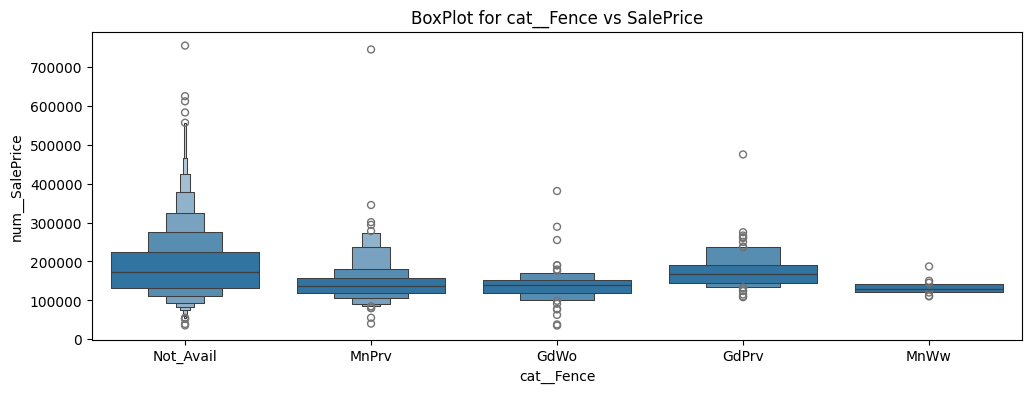

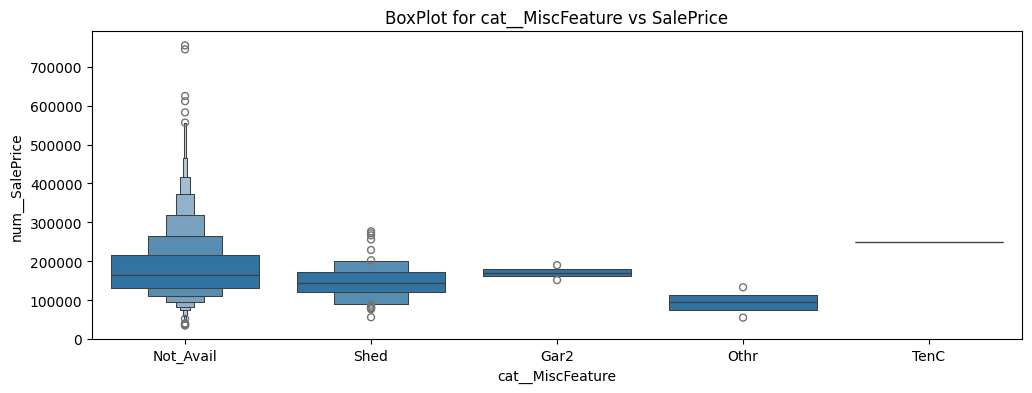

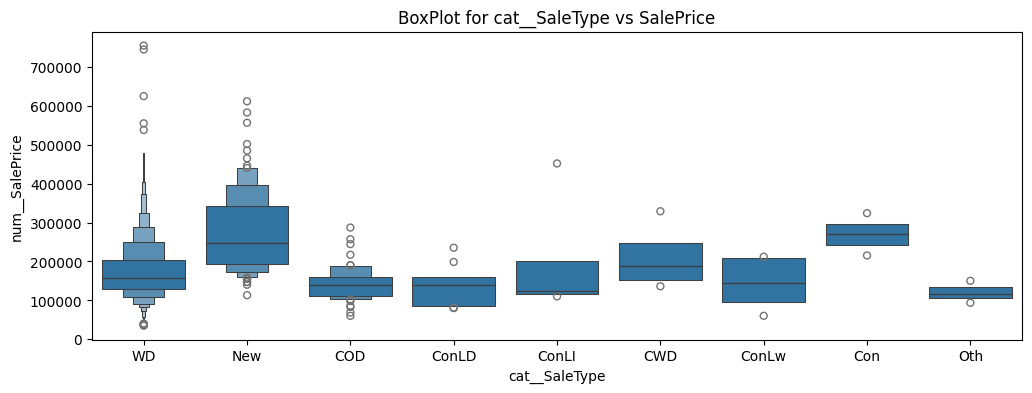

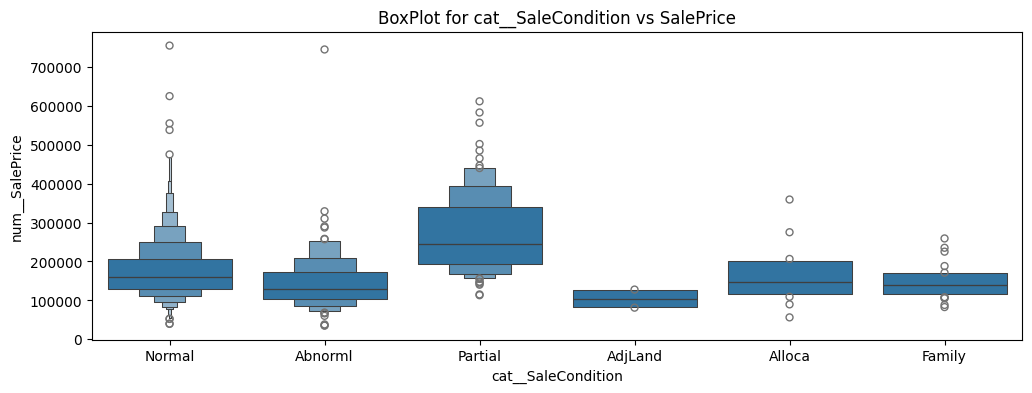

In [47]:
for i in cat_clean:
    plt.figure(figsize=(12, 4))
    sns.boxenplot(data=df_clean, x=i, y='num__SalePrice')
    plt.title(f'BoxPlot for {i} vs SalePrice')
    plt.show()

In [48]:
cat_clean

['cat__MSZoning',
 'cat__Street',
 'cat__Alley',
 'cat__LotShape',
 'cat__LandContour',
 'cat__Utilities',
 'cat__LotConfig',
 'cat__LandSlope',
 'cat__Neighborhood',
 'cat__Condition1',
 'cat__Condition2',
 'cat__BldgType',
 'cat__HouseStyle',
 'cat__RoofStyle',
 'cat__RoofMatl',
 'cat__Exterior1st',
 'cat__Exterior2nd',
 'cat__MasVnrType',
 'cat__ExterQual',
 'cat__ExterCond',
 'cat__Foundation',
 'cat__BsmtQual',
 'cat__BsmtCond',
 'cat__BsmtExposure',
 'cat__BsmtFinType1',
 'cat__BsmtFinType2',
 'cat__Heating',
 'cat__HeatingQC',
 'cat__CentralAir',
 'cat__Electrical',
 'cat__KitchenQual',
 'cat__Functional',
 'cat__FireplaceQu',
 'cat__GarageType',
 'cat__GarageFinish',
 'cat__GarageQual',
 'cat__GarageCond',
 'cat__PavedDrive',
 'cat__PoolQC',
 'cat__Fence',
 'cat__MiscFeature',
 'cat__SaleType',
 'cat__SaleCondition']

In [49]:
ctab1 = pd.crosstab(df_clean['cat__ExterQual'], df_clean['cat__ExterCond'])
ctab1

cat__ExterCond  Ex  Fa   Gd  Po   TA
cat__ExterQual                      
Ex               1   0    3   0   48
Fa               0   6    0   0    8
Gd               0   0   35   0  453
TA               2  22  108   1  773

<Axes: xlabel='cat__ExterCond', ylabel='cat__ExterQual'>

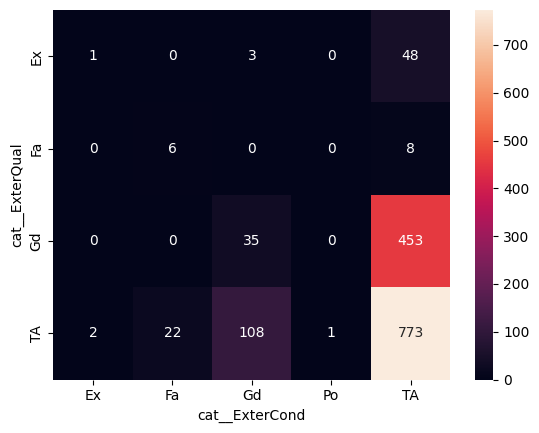

In [50]:
sns.heatmap(data=ctab1, annot=True, fmt='d')

In [51]:
ctab2 = pd.crosstab(df_clean['cat__BldgType'], df_clean['cat__HouseStyle'])
ctab2

cat__HouseStyle  1.5Fin  1.5Unf  1Story  2.5Fin  2.5Unf  2Story  SFoyer  SLvl
cat__BldgType                                                                
1Fam                142      13     607       7       9     362      20    60
2fmCon                8       1       7       1       2      11       0     1
Duplex                4       0      29       0       0       9       9     1
Twnhs                 0       0       5       0       0      33       4     1
TwnhsE                0       0      78       0       0      30       4     2

<Axes: xlabel='cat__HouseStyle', ylabel='cat__BldgType'>

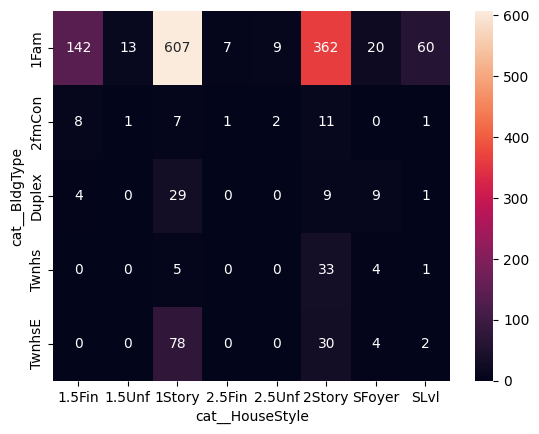

In [52]:
sns.heatmap(data=ctab2, annot=True, fmt='d')

In [53]:
con_clean

['num__MSSubClass',
 'num__LotFrontage',
 'num__LotArea',
 'num__OverallQual',
 'num__OverallCond',
 'num__YearBuilt',
 'num__YearRemodAdd',
 'num__MasVnrArea',
 'num__BsmtFinSF1',
 'num__BsmtFinSF2',
 'num__BsmtUnfSF',
 'num__TotalBsmtSF',
 'num__1stFlrSF',
 'num__2ndFlrSF',
 'num__LowQualFinSF',
 'num__GrLivArea',
 'num__BsmtFullBath',
 'num__BsmtHalfBath',
 'num__FullBath',
 'num__HalfBath',
 'num__BedroomAbvGr',
 'num__KitchenAbvGr',
 'num__TotRmsAbvGrd',
 'num__Fireplaces',
 'num__GarageYrBlt',
 'num__GarageCars',
 'num__GarageArea',
 'num__WoodDeckSF',
 'num__OpenPorchSF',
 'num__EnclosedPorch',
 'num__3SsnPorch',
 'num__ScreenPorch',
 'num__PoolArea',
 'num__MiscVal',
 'num__MoSold',
 'num__YrSold',
 'num__SalePrice']

In [56]:
B = df_clean[['num__SalePrice', 'num__LotFrontage', 'num__LotArea', 'cat__ExterQual']]
B

num__SalePrice  num__LotFrontage  num__LotArea cat__ExterQual
0           208500.0              65.0        8450.0             Gd
1           181500.0              80.0        9600.0             TA
2           223500.0              68.0       11250.0             Gd
3           140000.0              60.0        9550.0             TA
4           250000.0              84.0       14260.0             Gd
...              ...               ...           ...            ...
1455        175000.0              62.0        7917.0             TA
1456        210000.0              85.0       13175.0             TA
1457        266500.0              66.0        9042.0             Ex
1458        142125.0              68.0        9717.0             TA
1459        147500.0              75.0        9937.0             Gd

[1460 rows x 4 columns]

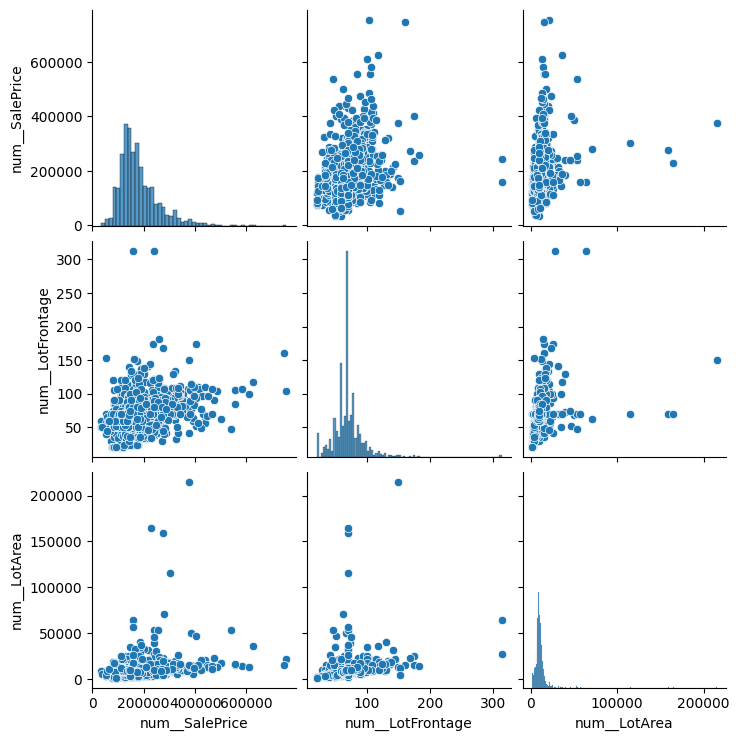

In [57]:
sns.pairplot(B)

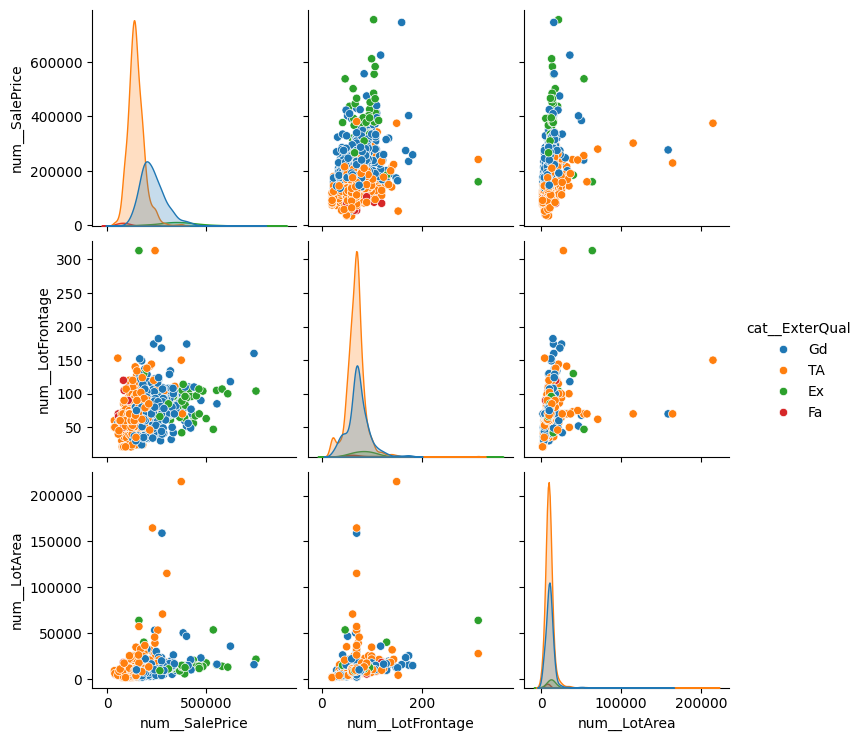

In [58]:
sns.pairplot(data=B, hue='cat__ExterQual')

In [59]:
C = df_clean[con_clean].corr()
C

num__MSSubClass  num__LotFrontage  num__LotArea  \
num__MSSubClass            1.000000         -0.357056     -0.139781   
num__LotFrontage          -0.357056          1.000000      0.306795   
num__LotArea              -0.139781          0.306795      1.000000   
num__OverallQual           0.032628          0.234196      0.105806   
num__OverallCond          -0.059316         -0.052820     -0.005636   
num__YearBuilt             0.027850          0.117598      0.014228   
num__YearRemodAdd          0.040581          0.082746      0.013788   
num__MasVnrArea            0.022895          0.179283      0.103960   
num__BsmtFinSF1           -0.069836          0.215828      0.214103   
num__BsmtFinSF2           -0.065649          0.043340      0.111170   
num__BsmtUnfSF            -0.140759          0.122156     -0.002618   
num__TotalBsmtSF          -0.238518          0.363358      0.260833   
num__1stFlrSF             -0.251758          0.414266      0.299475   
num__2ndFlrSF              0.307886          0.072483      0.050986   
num__LowQualFinSF          0.046474          0.036849      0.004779   
num__GrLivArea             0.074853          0.368392      0.263116   
num__BsmtFullBath          0.003491          0.091481      0.158155   
num__BsmtHalfBath         -0.002333         -0.006419      0.048046   
num__FullBath              0.131608          0.180424      0.126031   
num__HalfBath              0.177354          0.048258      0.014259   
num__BedroomAbvGr         -0.023438          0.237023      0.119690   
num__KitchenAbvGr          0.281721         -0.005805     -0.017784   
num__TotRmsAbvGrd          0.040380          0.320146      0.190015   
num__Fireplaces           -0.045569          0.235755      0.271364   
num__GarageYrBlt           0.080187          0.064324     -0.024812   
num__GarageCars           -0.040110          0.269729      0.154871   
num__GarageArea           -0.098672          0.323663      0.180403   
num__WoodDeckSF           -0.012579          0.077106      0.171698   
num__OpenPorchSF          -0.006100          0.137454      0.084774   
num__EnclosedPorch        -0.012037          0.009790     -0.018340   
num__3SsnPorch            -0.043825          0.062335      0.020423   
num__ScreenPorch          -0.026030          0.037684      0.043160   
num__PoolArea              0.008283          0.180868      0.077672   
num__MiscVal              -0.007683          0.001168      0.038068   
num__MoSold               -0.013585          0.010158      0.001205   
num__YrSold               -0.021407          0.006768     -0.014261   
num__SalePrice            -0.084284          0.334901      0.263843   

                    num__OverallQual  num__OverallCond  num__YearBuilt  \
num__MSSubClass             0.032628         -0.059316        0.027850   
num__LotFrontage            0.234196         -0.052820        0.117598   
num__LotArea                0.105806         -0.005636        0.014228   
num__OverallQual            1.000000         -0.091932        0.572323   
num__OverallCond           -0.091932          1.000000       -0.375983   
num__YearBuilt              0.572323         -0.375983        1.000000   
num__YearRemodAdd           0.550684          0.073741        0.592855   
num__MasVnrArea             0.410238         -0.127788        0.314745   
num__BsmtFinSF1             0.239666         -0.046231        0.249503   
num__BsmtFinSF2            -0.059119          0.040229       -0.049107   
num__BsmtUnfSF              0.308159         -0.136841        0.149040   
num__TotalBsmtSF            0.537808         -0.171098        0.391452   
num__1stFlrSF               0.476224         -0.144203        0.281986   
num__2ndFlrSF               0.295493          0.028942        0.010308   
num__LowQualFinSF          -0.030429          0.025494       -0.183784   
num__GrLivArea              0.593007         -0.079686        0.199010   
num__BsmtFullBath           0.111098         -0.054942        0

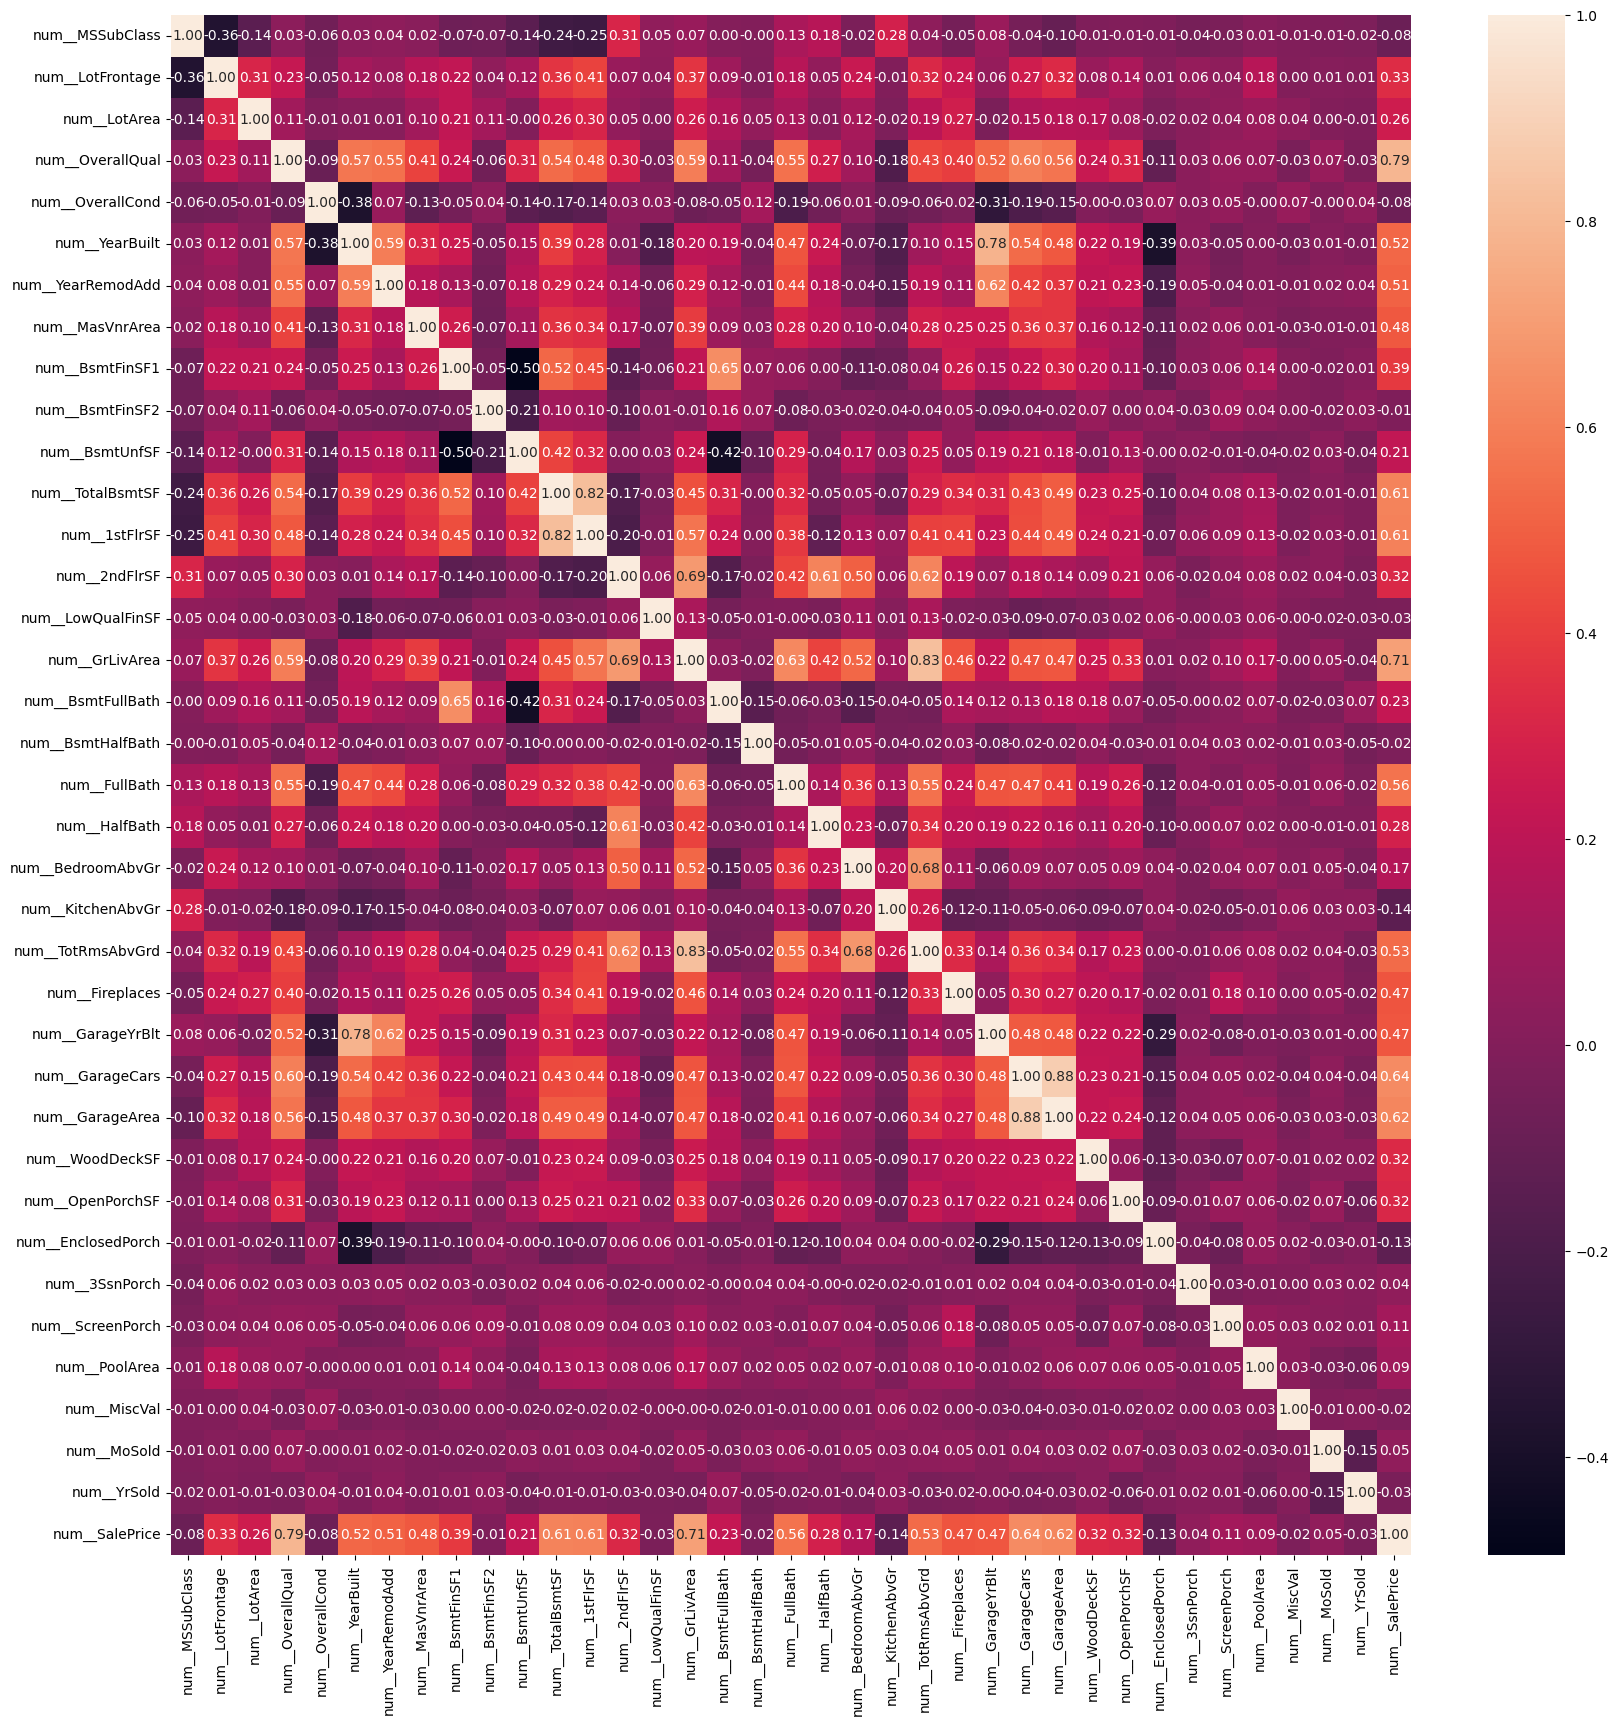

In [60]:
plt.figure(figsize=(20, 20))
sns.heatmap(data=C, annot=True, fmt='.2f')
plt.show()

In [62]:
D = df_clean.groupby(by='cat__ExterQual').agg({'num__SalePrice':'mean'})
D

num__SalePrice
cat__ExterQual                
Ex               367360.961538
Fa                87985.214286
Gd               231633.510246
TA               144341.313466

<Axes: title={'center': 'Average house price by ExterQual'}, xlabel='cat__ExterQual'>

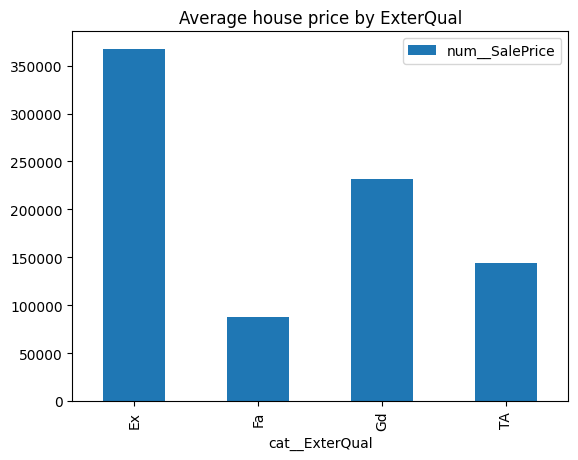

In [64]:
D.plot(kind= 'bar', title='Average house price by ExterQual')

In [65]:
E = pd.pivot_table(data=df_clean,
                   values='num__SalePrice',
                   index='cat__ExterQual',
                   columns='cat__LotShape',
                   aggfunc='median')

In [66]:
E

cat__LotShape        IR1       IR2       IR3       Reg
cat__ExterQual                                        
Ex              345000.0  437154.0  160000.0  370878.0
Fa               85000.0  110000.0       NaN   81500.0
Gd              229500.0  228000.0  259000.0  209750.0
TA              155500.0  181000.0  172250.0  133900.0

In [67]:
pd.crosstab(df_clean['cat__ExterQual'], df_clean['cat__LotShape'])

cat__LotShape   IR1  IR2  IR3  Reg
cat__ExterQual                    
Ex               21    5    1   25
Fa                3    1    0   10
Gd              212   19    5  252
TA              248   16    4  638